# Some maybe usefull stuff:
- Lets keep all the question to Antonio to trello
- The code to mark text: $**<code style="background:yellow;color:blue"> text</code>**$

In [1]:
# pip install -U imbalanced-learn

# 1. Importing dependencies and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
#import streamlit as st
import os
import time
from scipy.stats import randint, uniform

import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline

from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, precision_score, recall_score, roc_curve,\
roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, make_scorer, auc, fbeta_score, classification_report

from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.pipeline import Pipeline as imbalanced_pipeline
from imblearn.over_sampling import SMOTENC

from sklearn.ensemble import RandomForestClassifier #proba #featimp
from imblearn.ensemble import BalancedRandomForestClassifier #proba #featimp
from sklearn.linear_model import LogisticRegression #proba #coef
from sklearn.svm import SVC #kernel #proba #coef 
from sklearn.neighbors import KNeighborsClassifier #proba
from sklearn.naive_bayes import GaussianNB #proba
from sklearn.ensemble import AdaBoostClassifier #proba #featimp
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #proba
from sklearn.neural_network import MLPClassifier #coef #proba
import xgboost as xgb #featimp #coef #proba

In [2]:
#Getting the data

# raw_data = pd.read_csv(r"C:\Users\katar\OneDrive\Dokumenty\Edukacja\Data Science\6_DS_Project\Project\03_Coding\Cards_data\creditcard.csv")

raw_data = pd.read_csv(r"D:\06_projekt_i_data_science\coding ground\raw data\creditcard.csv")

## 1.1 Classes and functions used

# 2. Sanity checking the WHOLE dataset

In [4]:
raw_data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [5]:
raw_data.shape

(284807, 31)

In [6]:
raw_data.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- The dataset has 31 features
- The dataset has 284807 observations in total
- The dataset has no missing values
- The target feature is Class
- Except for Time, Amount and Class features, all other features are unnamed, which is a result of PCA dimension reduction and also serves as a way to anonymize the data
- All the features have numeric data, except Time and Class
- Class is Nominal Categoric data
- Time could be Ordinal Categoric data

# 2.1. Class feature

In [7]:
raw_data.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [8]:
raw_data.Class.value_counts(normalize=False)

0    284315
1       492
Name: Class, dtype: int64

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- The overwhelming amount of transactions 99.8%, are not fraudulent
- This higly unbalanced representation of the tagret feature makes the accuracy metric unusable. We will need to use other classification metrics such as: __Precision, Recall, F1 score, ROC AUC score__
- Why? Only by predicting all transactions as non fraud -> the accuracy will be over 0,99!

# 2.2 Removing duplicates

In [3]:
len(raw_data)

284807

In [3]:
raw_data.drop_duplicates(inplace=True)

In [4]:
len(raw_data)

283726

# 3. Spliting the data into training, validation and test set

In [5]:
# spliting the data into train and test set
raw_train, raw_valid_test = train_test_split(raw_data, test_size=0.4, random_state = 42, shuffle=True, stratify=raw_data["Class"])
# spliting the test set into validation and test set
raw_val, raw_test = train_test_split(raw_valid_test, test_size=0.5, random_state = 42, shuffle=True, stratify=raw_valid_test["Class"])

In [6]:
print("Training set dimensions: ", raw_train.shape)#, 'amd training lagels:', y_train.shape,)
print("Test set dimensions: ", raw_test.shape)#, 'and test labels:', y_test.shape)
print("Validation dataset dimensions: ", raw_val.shape)#, 'and validation labels:', y_val.shape)

Training set dimensions:  (170235, 31)
Test set dimensions:  (56746, 31)
Validation dataset dimensions:  (56745, 31)


# --------------- 4. EDA -----------------------

In [11]:
raw_train.head()

Time        V1        V2        V3        V4        V5        V6  \
109011   71174.0 -2.108259  1.173406  1.614294  0.482867  0.067209 -0.191013   
280683  169683.0  2.313997 -1.311064 -1.421228 -1.724356 -1.003480 -0.912621   
158318  111127.0  2.104946  0.155284 -1.402870  0.311489  0.504248 -0.690870   
243733  152052.0  2.072408 -0.015687 -1.310880  0.373435 -0.063476 -1.380722   
177016  123008.0  2.046409  0.156335 -2.006987  0.384525  0.604029 -0.756561   

              V7        V8        V9  ...       V21       V22       V23  \
109011  0.191246 -1.705859 -0.177615  ...  1.520624 -0.388595  0.260114   
280683 -0.898765 -0.221952 -1.658076  ...  0.089446  0.664605  0.029245   
158318  0.138943 -0.417801  1.894584  ...  0.107745  0.759527 -0.022144   
243733  0.243699 -0.394350  0.631048  ...  0.243262  0.858393  0.003403   
177016  0.232367 -0.230789  0.072474  ...  0.326565  1.165945 -0.109465   

             V24       V25       V26       V27       V28  Amount  Class  
109011  0.340667  0.400474 -0.413089 -0.348291  0.215298   19.99      0  
280683 -0.347503  0.069152  0.074159 -0.024483 -0.076422   15.00      0  
158318  0.465282  0.402861 -0.478955 -0.016524 -0.053868    1.00      0  
243733  0.077370  0.259102 -0.110464 -0.021166 -0.058972    1.99      0  
177016  0.793698  0.377195  0.837559 -0.075171 -0.053246    1.57      0  

[5 rows x 31 columns]

In [87]:
raw_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### 4.1. Checking for alternate missing values → values that are 0

In [88]:
# Checking if there is any zero values in the training dataset (there is no Nan, but maybe they had 0 as missing value...)
# Excluding Class in this check as >99% of the data has Class = 0
raw_train[raw_train.iloc[:,0:30] == 0].dropna(how='all')

Time  V1  V2  V3  V4  V5  V6  V7  V8  V9  ...  V21  V22  V23  V24  \
215250   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
143435   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
199399   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
65356    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
79512    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
...      ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...   
183106   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
256028   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
176142   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
161304   NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   
95146    NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...  NaN  NaN  NaN  NaN   

        V25  V26  V27  V28  Amount  Class  
215250  NaN  NaN  NaN  NaN     0.0    NaN  
143435  NaN  NaN  NaN  NaN     0.0    NaN  
199399  NaN  NaN  NaN  NaN     0.0    NaN  
65356   NaN  NaN  NaN  NaN     0.0    NaN  
79512   NaN  NaN  NaN  NaN     0.0    NaN  
...     ...  ...  ...  ...     ...    ...  
183106  NaN  NaN  NaN  NaN     0.0    NaN  
256028  NaN  NaN  NaN  NaN     0.0    NaN  
176142  NaN  NaN  NaN  NaN     0.0    NaN  
161304  NaN  NaN  NaN  NaN     0.0    NaN  
95146   NaN  NaN  NaN  NaN     0.0    NaN  

[1070 rows x 31 columns]

In [89]:
# All the amounts are zero or positive
print(f'Is any amount 0? --> {any(raw_train.Amount== 0)}')
print(f'Are all amounts bigger than or equal to 0? --> {all(raw_train.Amount>= 0)}')

Is any amount 0? --> True
Are all amounts bigger than or equal to 0? --> True


### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- There seems to be no missing values in the dataset
- There are 1070 observations where Amount = 0
- There are 2 observations where Time = 0 (we know this from Chapter 2. Sanity checking the WHOLE dataset, but these observations are not present in the training set)
- We assume that the transactions where Amount = 0 are valid tranactions. These could be transactions where a person needs to "pay a deposit" in order to register to a page, but real money is drawn after the trial period is over.
- There are no transactions with a negative Amount

### 4.2. Analysis of numeric data

In [90]:
raw_train.describe().apply(lambda s: s.apply('{0:.5f}'.format))

Time            V1            V2            V3            V4  \
count  170884.00000  170884.00000  170884.00000  170884.00000  170884.00000   
mean    94939.37288       0.00197      -0.00445      -0.00249       0.00011   
std     47506.71221       1.95921       1.65161       1.51925       1.41495   
min         0.00000     -46.85505     -63.34470     -48.32559      -5.68317   
25%     54277.75000      -0.91788      -0.60133      -0.89262      -0.84617   
50%     84907.50000       0.02251       0.06266       0.17883      -0.02059   
75%    139422.25000       1.31587       0.80114       1.02332       0.74360   
max    172792.00000       2.45189      22.05773       9.38256      16.87534   

                 V5            V6            V7            V8            V9  \
count  170884.00000  170884.00000  170884.00000  170884.00000  170884.00000   
mean        0.00041      -0.00079      -0.00178      -0.00014       0.00331   
std         1.38177       1.33247       1.24667       1.19175       1.09781   
min      -113.74331     -21.92931     -43.55724     -73.21672     -13.43407   
25%        -0.69185      -0.76804      -0.55509      -0.20791      -0.63949   
50%        -0.05647      -0.27367       0.03973       0.02256      -0.04798   
75%         0.61078       0.39721       0.57156       0.32606       0.60140   
max        32.91146      73.30163     120.58949      20.00721      15.59499   

       ...           V21           V22           V23           V24  \
count  ...  170884.00000  170884.00000  170884.00000  170884.00000   
mean   ...       0.00140       0.00034       0.00064       0.00026   
std    ...       0.73926       0.72656       0.62725       0.60509   
min    ...     -34.83038     -10.93314     -44.80774      -2.83663   
25%    ...      -0.22780      -0.54198      -0.16219      -0.35470   
50%    ...      -0.02868       0.00674      -0.01065       0.04137   
75%    ...       0.18644       0.52834       0.14776       0.43952   
max    ...      27.20284      10.50309      22.08354       4.58455   

                V25           V26           V27           V28        Amount  \
count  170884.00000  170884.00000  170884.00000  170884.00000  170884.00000   
mean       -0.00090       0.00025      -0.00050       0.00012      88.42941   
std         0.52206       0.48256       0.40685       0.31471     255.43632   
min       -10.29540      -2.60455     -22.56568     -15.43008       0.00000   
25%        -0.31706      -0.32719      -0.07069      -0.05296       5.74000   
50%         0.01640      -0.05211       0.00122       0.01116      22.05000   
75%         0.34958       0.24210       0.09084       0.07782      77.50000   
max         6.07085       3.51735      31.61220      15.87047   25691.16000   

              Class  
count  170884.00000  
mean        0.00173  
std         0.04151  
min         0.00000  
25%         0.00000  
50%         0.00000  
75%         0.00000  
max         1.00000  

[8 rows x 31 columns]

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- Time: time is represented in seconds. 0 is when the observations started, and 172792 is the second count for the last observation. This equals roughly a 48 day period.
- Amount: the smallest transfer amount was 0 (possible explanation in previous observation), and the biggest transaction amount was 25691. The average transaction amount is ~88.5, but we can see that 50% of the transactions were under 22.05, which means that the distribution of the Amount is strongly skewed and has a right tail.
- Class: we can see that only 0.173% of the transactions were fraud.
- As we don't have names for the majority of the features, it is unlikely that we can get out meaningful observations 

### 4.2.1. Distribution of the feature values

In [16]:
fig, axes = plt.subplots(len(raw_train.columns)//3, 3, figsize=(40,150), layout='constrained')
axes = axes.ravel()

for k, ax in enumerate(axes):
    p = sns.histplot(data=raw_train, x=raw_train.columns[k], ax=ax)
#     p.axes.set_title(raw_train.columns[k],fontsize=50)
    p.set_xlabel(raw_train.columns[k],fontsize=30)
    p.set_ylabel("Count",fontsize=30)
    p.tick_params(labelsize=25)
    p

### **<code style="background:lightgreen;color:black"> Observations:</code>** 

- The features (except Time, Amount and Class) seem to be standardised, as their location is around 0.
- Most of the featres distribution vaguely resemble normal distribution, but with very high curtos

### 4.3.2. Distribution of Amount

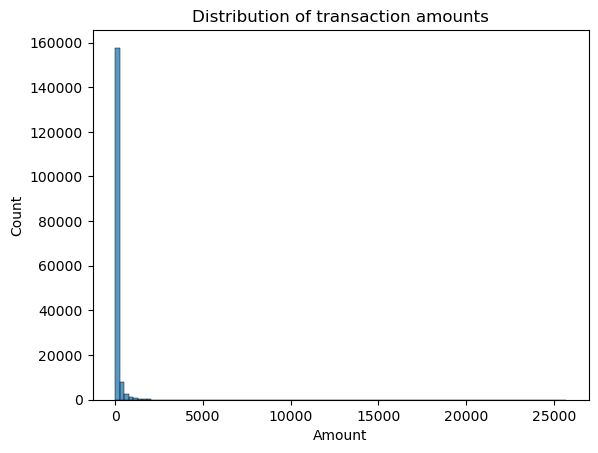

In [91]:
sns.histplot(data=raw_train, x='Amount', bins=100)
plt.title('Distribution of transaction amounts')
plt.show()

### **<code style="background:lightgreen;color:black"> Observations:</code>** 

- We can see that the $Amount$ variable is strongly skewed to the right. 

## $Amount$ as $log$

In [92]:
raw_train_log = raw_train.copy()
raw_train_log['Amount_log'] = np.log1p(raw_train_log['Amount'])

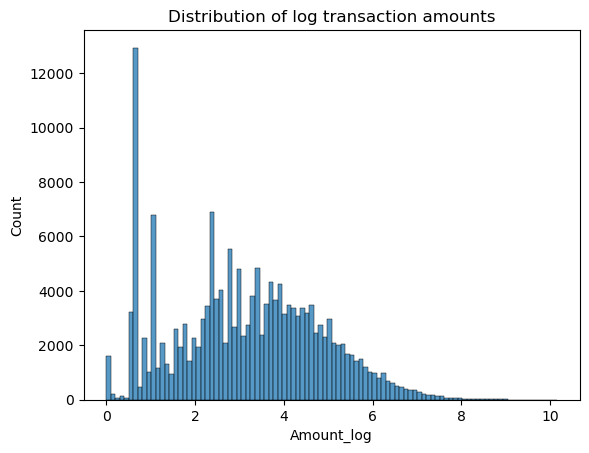

In [93]:
sns.histplot(data=raw_train_log, x='Amount_log', bins=100)
plt.title('Distribution of log transaction amounts')
plt.show()

### **<code style="background:lightgreen;color:black"> Observations:</code>** 

- It can be worth checking how models deal with logaritmicaly transformed $Amount$. 

# ↓↓↓↓↓↓↓↓↓ THIS MIGHT NOT BE NEEDED ↓↓↓↓↓↓↓↓↓ 

But the fraud Class values mean and distribution is much more visible than in the histograms

In [94]:
raw_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

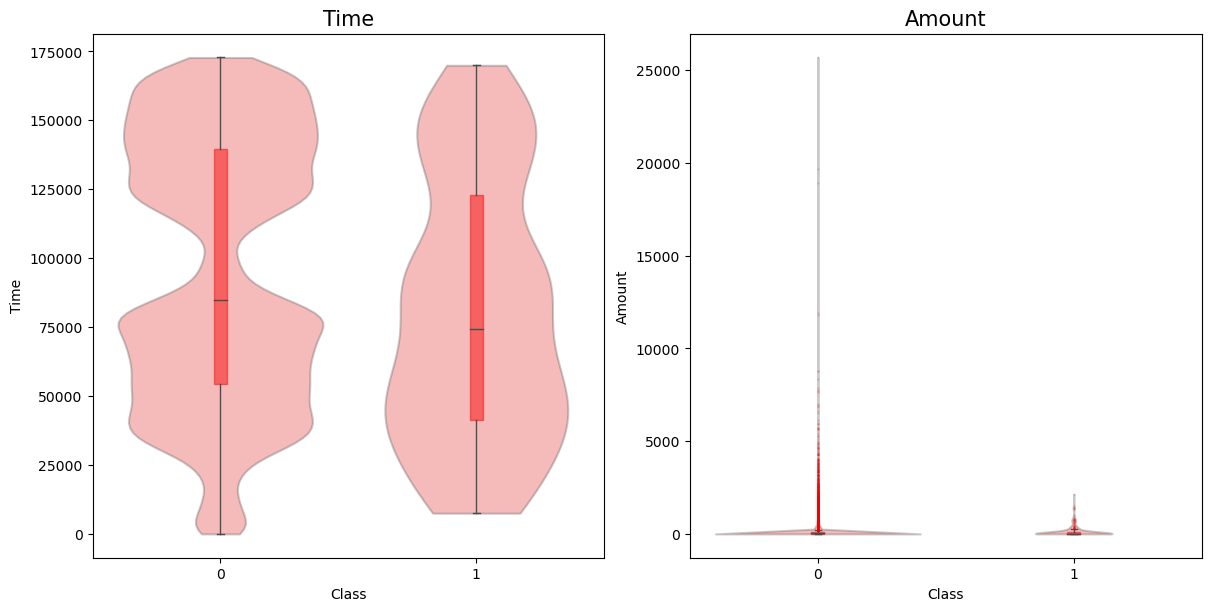

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(12,6), layout='constrained')
axes = axes.ravel()
cols = [0, -2]

for k, ax in enumerate(axes):
    p = sns.violinplot(data=raw_train, y=raw_train.columns[cols[k]], x='Class', ax=ax, color='red', cut=0, inner=None)
    boxprops = dict(color='r', alpha=0.5)
    flierprops = dict(marker='o', markeredgecolor='r', markersize=0.5, alpha=0.2)
    sns.boxplot(data = raw_train, y=raw_train.columns[cols[k]], x='Class', ax=ax, color='red', width=0.05, fliersize=0.5, linewidth=1, whis=1.5, boxprops=boxprops, flierprops=flierprops)

    p.axes.set_title(raw_train.columns[cols[k]],fontsize=15)
    p.tick_params(labelsize=10)
    plt.setp(ax.collections, alpha=.3)
    p

In [96]:
# Ratio of transactions under 100
len(raw_train[raw_train.Amount<100])/len(raw_train)

0.7978336181269166

In [97]:
# Maximum fraud amount
raw_train[raw_train.Class==1]['Amount'].max()

2125.87

# 4.4 Outliers

In [98]:
def detect_outliers(data):
    outlier_info = {}
    for column in data.columns:
        if data[column].dtype != object:
            q1 = np.quantile(data[column], 0.25)
            q3 = np.quantile(data[column], 0.75)
            iqr = q3 - q1
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_info[column] = {"Outlier_percentage": outlier_percentage, "Total_count_of_outliers": len(outliers)}
                         
            outlier_dataframe = pd.DataFrame(outlier_info).T
                                                
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False)

detect_outliers(raw_train)

Outlier_percentage  Total_count_of_outliers
V27              13.792982                  23570.0
Amount           11.170736                  19089.0
V28              10.767538                  18400.0
V20               9.829475                  16797.0
V8                8.406287                  14365.0
V6                8.042883                  13744.0
V23               6.509679                  11124.0
V12               5.348658                   9140.0
V21               5.077128                   8676.0
V14               5.006320                   8555.0
V2                4.755858                   8127.0
V5                4.306430                   7359.0
V4                3.910840                   6683.0
V19               3.634629                   6211.0
V10               3.316285                   5667.0
V7                3.105030                   5306.0
V9                2.901969                   4959.0
V16               2.848716                   4868.0
V18               2.691299                   4599.0
V17               2.543246                   4346.0
V1                2.490578                   4256.0
V25               1.917090                   3276.0
V26               1.912994                   3269.0
V24               1.630346                   2786.0
V3                1.182674                   2021.0
V13               1.149903                   1965.0
V15               1.008286                   1723.0
V22               0.474591                    811.0
V11               0.260996                    446.0
Class             0.172632                    295.0
Time              0.000000                      0.0

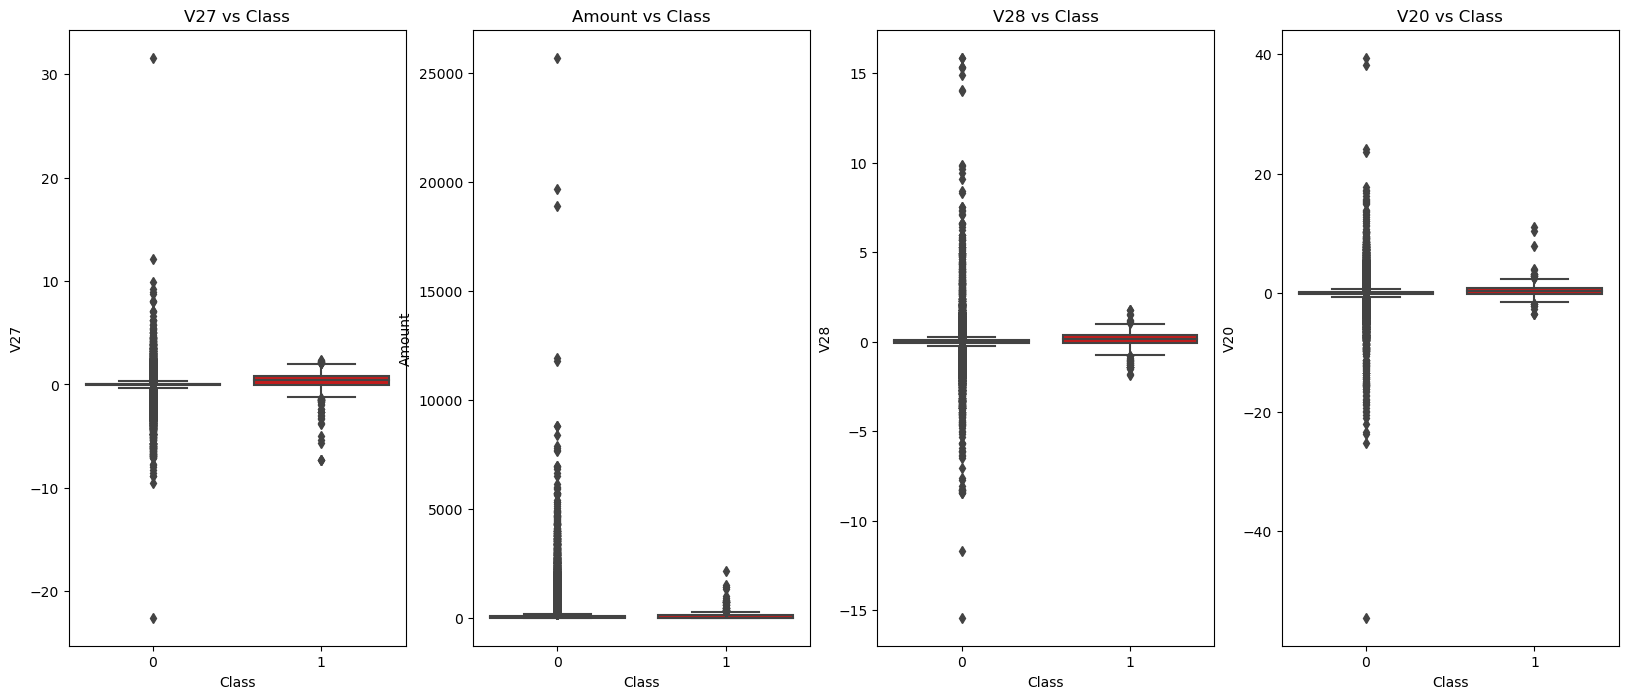

In [99]:
f, axes = plt.subplots(ncols=4, figsize=(20,8))
colors = ["#0101DF", "#DF0101"]

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V27", data=raw_train, palette=colors, ax=axes[0])
axes[0].set_title('V27 vs Class')

sns.boxplot(x="Class", y="Amount", data=raw_train, palette=colors, ax=axes[1])
axes[1].set_title('Amount vs Class')


sns.boxplot(x="Class", y="V28", data=raw_train, palette=colors, ax=axes[2])
axes[2].set_title('V28 vs Class')


sns.boxplot(x="Class", y="V20", data=raw_train, palette=colors, ax=axes[3])
axes[3].set_title('V20 vs Class')

plt.show()

## 4.4.1 Scenario: remove 10% of outliers

In [100]:
def detect_outliers_limit(data, limit, cols):
    outlier_percents = {}
    rows_to_remove = []
    for column in cols:
        if data[column].dtype != object:
            # quantiles
            q1 = np.quantile(data[column], 0.25)
            q3 = np.quantile(data[column], 0.75)
            # inter quantile range
            iqr = q3 - q1

            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            # all the outliers
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            # select top limit%
            abs_sorted_outliers = abs(outliers).sort_values()
            threshold = abs_sorted_outliers.quantile(1-limit)
            top_percent = abs_sorted_outliers[abs_sorted_outliers >= threshold]
            top_percent_index = top_percent.index
            [rows_to_remove.append(n) for n in top_percent_index]
            
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_percents[column] = outlier_percentage
            outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])

    return outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False), set(rows_to_remove)


indexes_to_remove = detect_outliers_limit(raw_train, 0.1, ['V17', 'V14', 'V12', 'V10'])[1]
#detect_outliers_limit(raw_train, 0.1, raw_train.columns)[0]

In [101]:
# indexes_to_remove
print(f'raw_train original length: {len(raw_train)}')
print(f'indexes_to_remove original length: {len(indexes_to_remove)}')
print(f'difference of original-remove: {len(raw_train)-len(indexes_to_remove)}')
print(f'length of dataset after removal: {len(raw_train.drop(index=indexes_to_remove))}')
raw_train_minus_outliers = raw_train.drop(index=indexes_to_remove)
print(f'length of dataset with removed outliers: {len(raw_train_minus_outliers)}')

raw_train original length: 170884
indexes_to_remove original length: 1990
difference of original-remove: 168894
length of dataset after removal: 168894
length of dataset with removed outliers: 168894


In [102]:
raw_train_minus_outliers.Class.value_counts(normalize=False)

0    168851
1        43
Name: Class, dtype: int64

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- Almost 80% of all transactions are under 100
- The maximum fraud amount is 2125.87
- 11.71% of the Amount are outliers
- The features (except Time, Amount and Class) seem to be standardised, as their location is around 0.
- Most of the featres distribution vaguely resemble normal distribution, but with very high curtosis



# 4.5. Spearman correlation between features

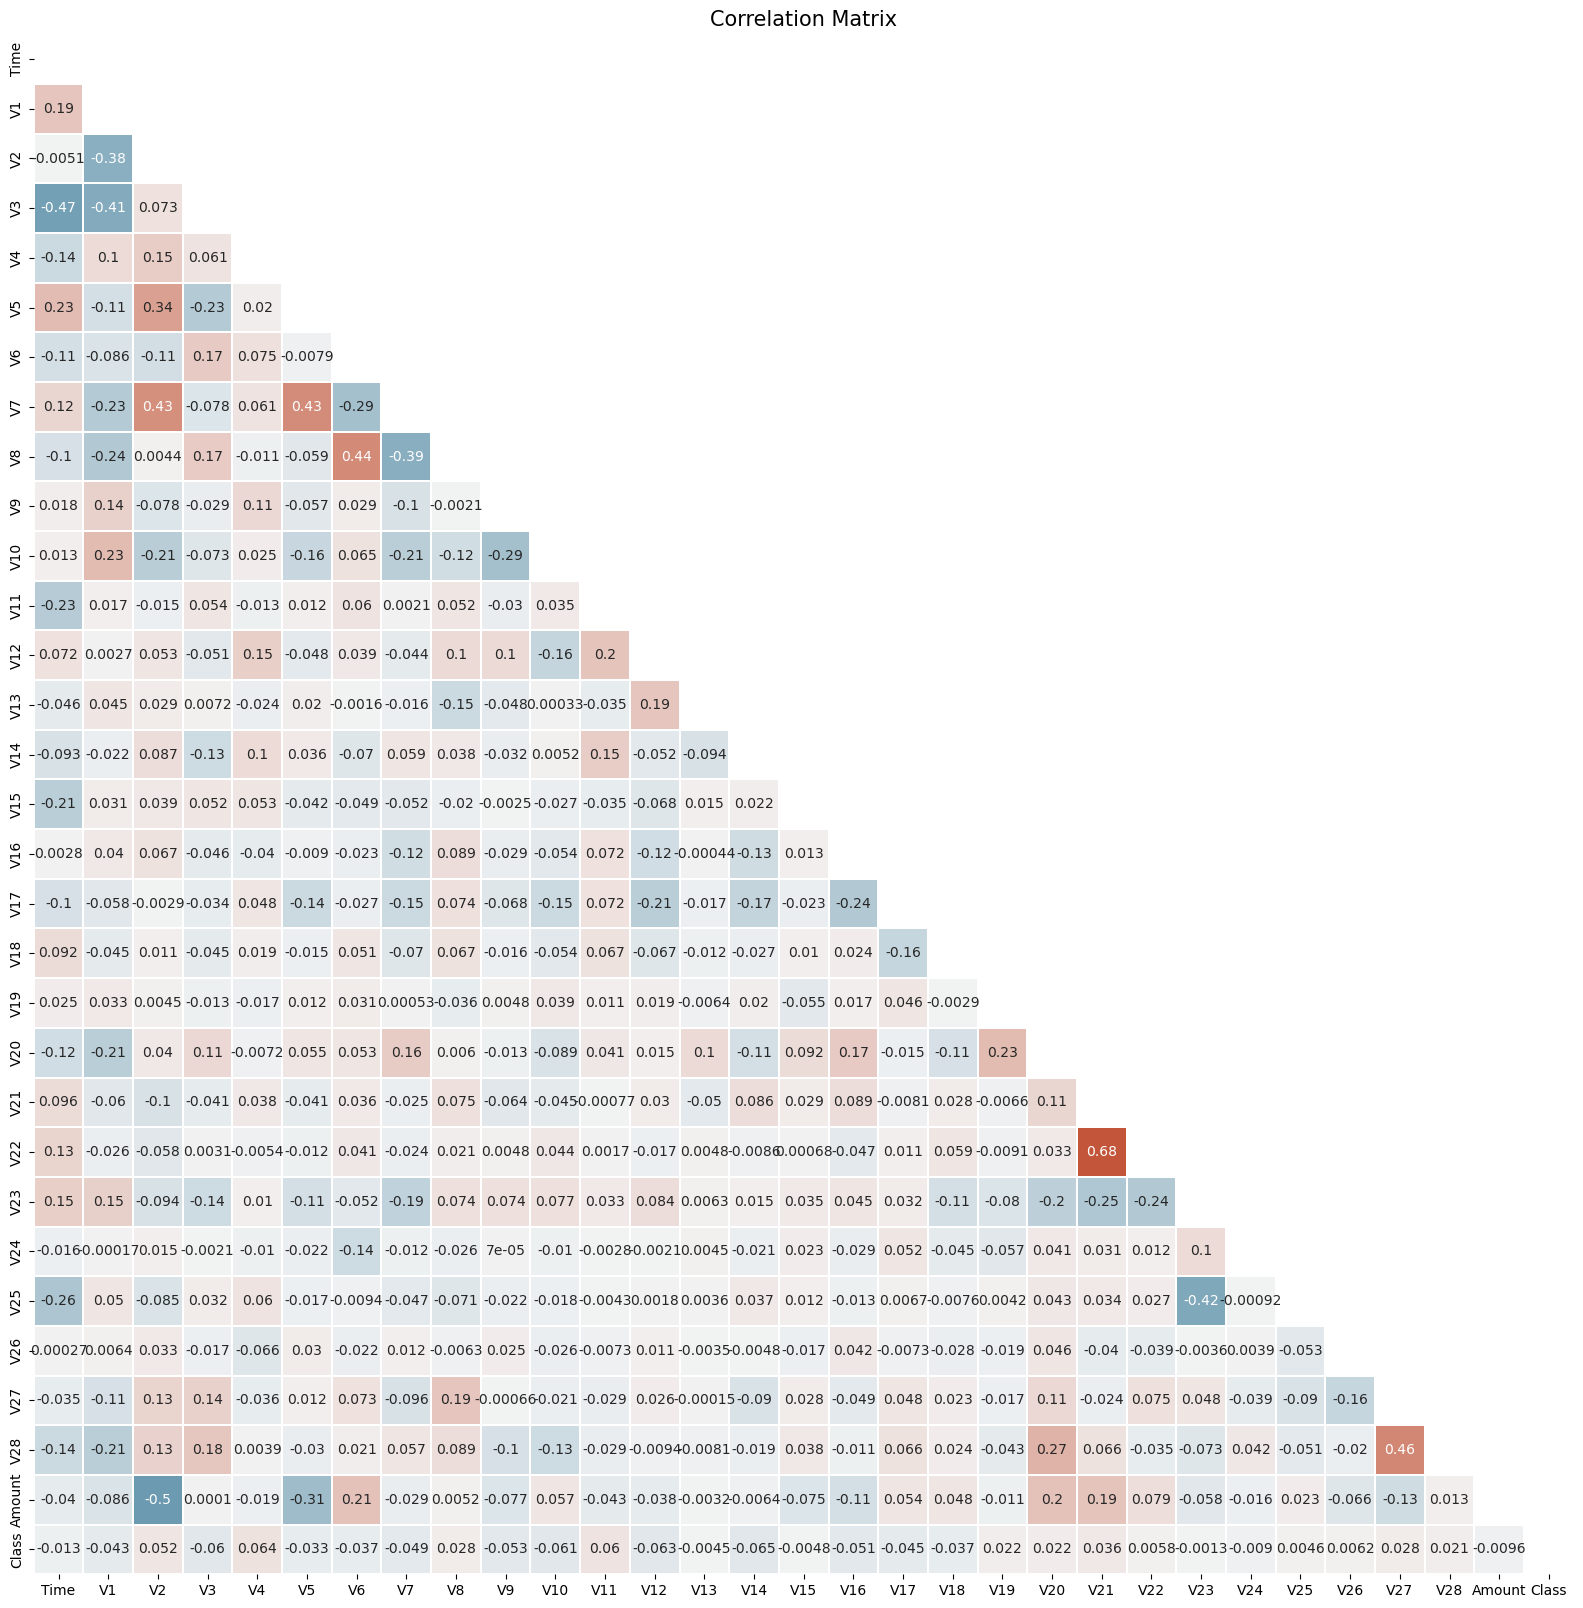

In [104]:
features = [
    'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
    'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
    'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
    'Class'
]

correlation_matrix = raw_train[features].corr(method="spearman") # pearson / spearman

#from matplotlib.colors import SymLogNorm

f, ax = plt.subplots(figsize=(20, 20))
_ = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=False,
    ax=ax,
    annot=True,
)
_ = ax.set_title("Correlation Matrix", fontsize=15)

Note:
The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other.

### Highlighting the correlations below -0.1 and above 0.1

<AxesSubplot: >

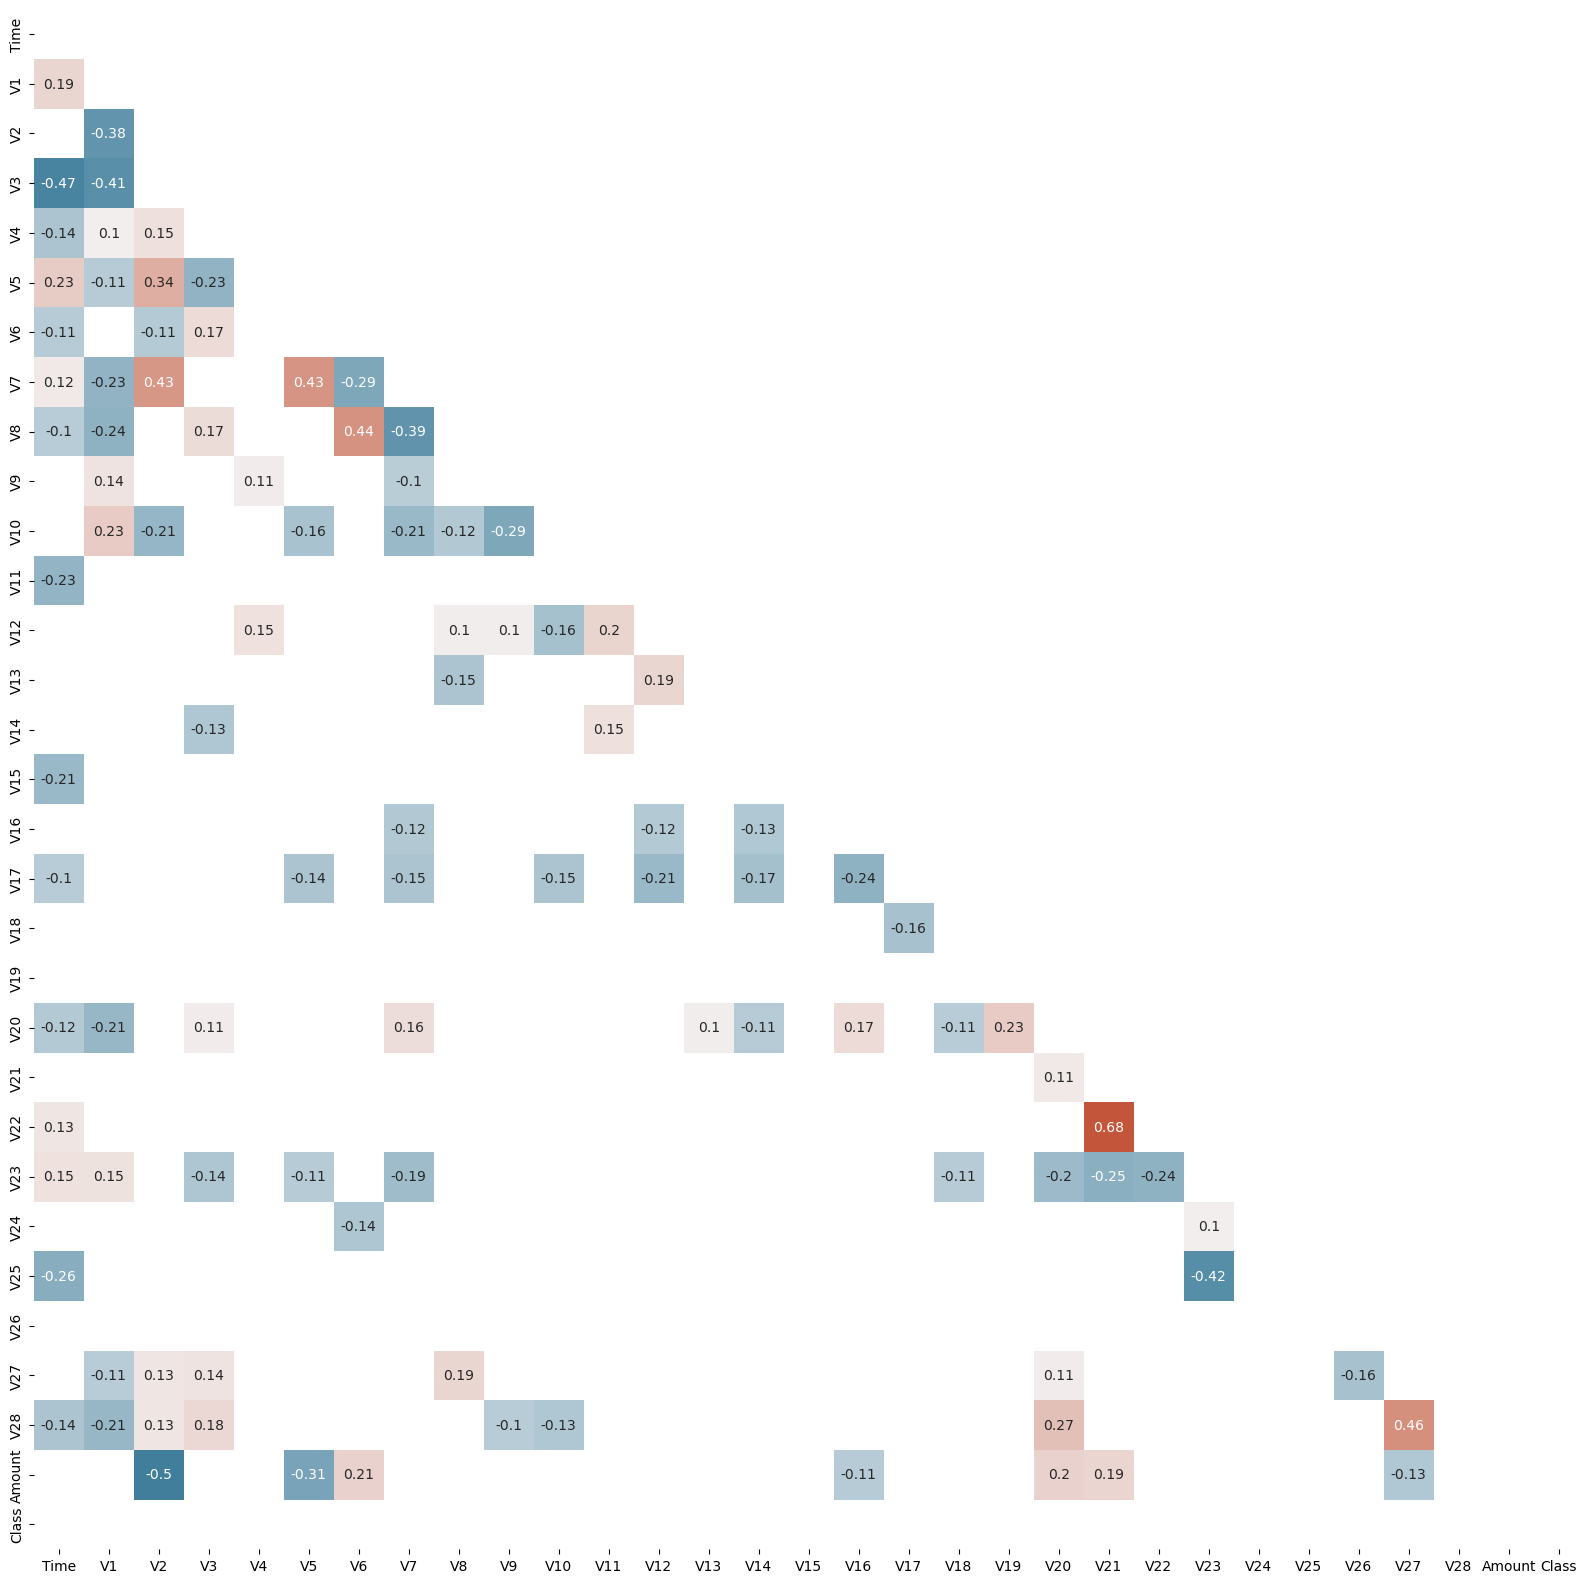

In [105]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(
    correlation_matrix[(correlation_matrix<-0.1)|(correlation_matrix>0.1)], 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool, )), 
    annot=True,
    cbar=False,
    cmap=sns.diverging_palette(230, 20, as_cmap=True)
)

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- 

# 4.5.1 Balanced dataset analysis

In [6]:
from sklearn.base import BaseEstimator, TransformerMixin

#######################################################################################################################
#####   Class used to pre-process the raw dataset 
#######################################################################################################################

class DataCleaner(BaseEstimator, TransformerMixin):
    '''The DataCleaner class is a custom transformer that can be used to clean and preprocess data in a machine learning pipeline.

    The class has several parameters:
        - hour: a boolean parameter that indicates whether to convert the Time feature to hours and one-hot-encode the resulting hour feature (default True)
        - feature_to_drop: a list of feature names to drop from the DataFrame (default [])
        - labels: a boolean parameter that indicates whether to split the Class feature (if it exists) from the other features and store it separately (default True)
        - imputer: an imputer object from scikit-learn to use for imputing missing values in the DataFrame (default None)
        - scaler: a scaler object from scikit-learn to use for scaling the numerical features in the DataFrame (default None)

    
    The class implements two methods, fit and transform. The functions takes data argument which must be a DataFrame'''

    def __init__(self, hour:bool =True, feature_to_drop:list =[], labels:bool =True, imputer:str = None, \
                 amount_scaler:str = None, time_scaler:str = None, amount_log:bool = False):
        self.hour = hour
        self.feature_to_drop = feature_to_drop
        self.labels = labels
        self.imputer = imputer
        self.amount_scaler = amount_scaler
        self.time_scaler = time_scaler
        self.labels_data = None
        self.time = ['Time']
        self.amount = ['Amount']
        self.amount_log = amount_log
#         self.data_num = ['Amount'] # other columns have been already scaled.
        
        
    def fit(self, data, y=None):
        if self.imputer:
            self.imputer.fit(data)
        
        if self.amount_scaler:
            self.amount_scaler.fit(data.loc[:,self.amount])
            
        if self.time_scaler:
            self.time_scaler.fit(data.loc[:,self.time])
           
        
        return self 
    
    
    def transform(self, data, y=None):
        # make a copy of the input data
        data = data.copy()
        
        # Dropping all the rows where "Class" is missing
        if 'Class' in data.columns:
            data = data.dropna(axis=0, subset = 'Class')
        
       
        #Imputing missing_values 
        if data.isnull().values.any() or data.isna().values.any():
            data = pd.DataFrame(self.imputer.transform(data), columns=data.columns)
       
         # log transform amount
        if self.amount_log == True:
            data['Amount'] = np.log1p(data['Amount'])
            
       
        # Spliting labels from other features (if the data includes column 'Class'):
        if self.labels:
            if 'Class' in data.columns:
                self.labels_data = data['Class']
                data = data.drop('Class', axis=1)
                
            else:
                raise ValueError("No target variable 'Class' found in the dataset")
        labels_data = self.labels_data

        if self.amount_scaler:
            data_amount_scaled = self.amount_scaler.transform(data.loc[:,self.amount])
            data.loc[:,self.amount] = data_amount_scaled
            
        if self.time_scaler:
            data_time_scaled = self.time_scaler.transform(data.loc[:,self.time])
            data.loc[:,self.time] = data_time_scaled


        # Converting 'Time' to 'hours':
        if self.hour:
            if 'Time' in data.columns:
                data['hour'] = ((((data['Time']) // (60 * 60)) % 24) + 1)
                data['hour'] = data['hour'].astype(int)
                data = data.drop('Time', axis=1)
            
                # one-hot-encoded dataset
                data = pd.get_dummies(data, columns=['hour'], prefix='hour')
            else:
                print("No 'Time' variable in the dataset")

        # Dropping not needed features based on the feature_to_drop list
        if self.feature_to_drop:
            data = data.drop(self.feature_to_drop, axis=1)
        
        
        return data, labels_data

## RandomOverSampler

The most naive strategy. $RandomOverSampler()$ generates new samples by randomly sampling with replacement the current available samples.

(If repeating samples is an issue, the parameter shrinkage allows to create a smoothed bootstrap. However, the original data needs to be numerical.) 

In [107]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)


# WE need to split labels form the rest of the features before we can continue with the sampler
clean_data = DataCleaner(hour=False, labels=True)
X_train_raw, y_train_raw = clean_data.fit_transform(raw_train)

# Now we can fit the sampler
X_ros_train, y_ros_train = ros.fit_resample(X_train_raw, y_train_raw)
from collections import Counter
print(sorted(Counter(y_ros_train).items()))

[(0, 170589), (1, 170589)]


In [108]:
X_ros_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [109]:
labels = pd.DataFrame({'Class': y_ros_train})

ros_train = pd.concat([X_ros_train, labels], axis=1)
ros_train.head()

Time        V1        V2        V3        V4        V5        V6  \
0   71174.0 -2.108259  1.173406  1.614294  0.482867  0.067209 -0.191013   
1  169683.0  2.313997 -1.311064 -1.421228 -1.724356 -1.003480 -0.912621   
2  111127.0  2.104946  0.155284 -1.402870  0.311489  0.504248 -0.690870   
3  152052.0  2.072408 -0.015687 -1.310880  0.373435 -0.063476 -1.380722   
4  123008.0  2.046409  0.156335 -2.006987  0.384525  0.604029 -0.756561   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.191246 -1.705859 -0.177615  ...  1.520624 -0.388595  0.260114  0.340667   
1 -0.898765 -0.221952 -1.658076  ...  0.089446  0.664605  0.029245 -0.347503   
2  0.138943 -0.417801  1.894584  ...  0.107745  0.759527 -0.022144  0.465282   
3  0.243699 -0.394350  0.631048  ...  0.243262  0.858393  0.003403  0.077370   
4  0.232367 -0.230789  0.072474  ...  0.326565  1.165945 -0.109465  0.793698   

        V25       V26       V27       V28  Amount  Class  
0  0.400474 -0.413089 -0.348291  0.215298   19.99      0  
1  0.069152  0.074159 -0.024483 -0.076422   15.00      0  
2  0.402861 -0.478955 -0.016524 -0.053868    1.00      0  
3  0.259102 -0.110464 -0.021166 -0.058972    1.99      0  
4  0.377195  0.837559 -0.075171 -0.053246    1.57      0  

[5 rows x 31 columns]

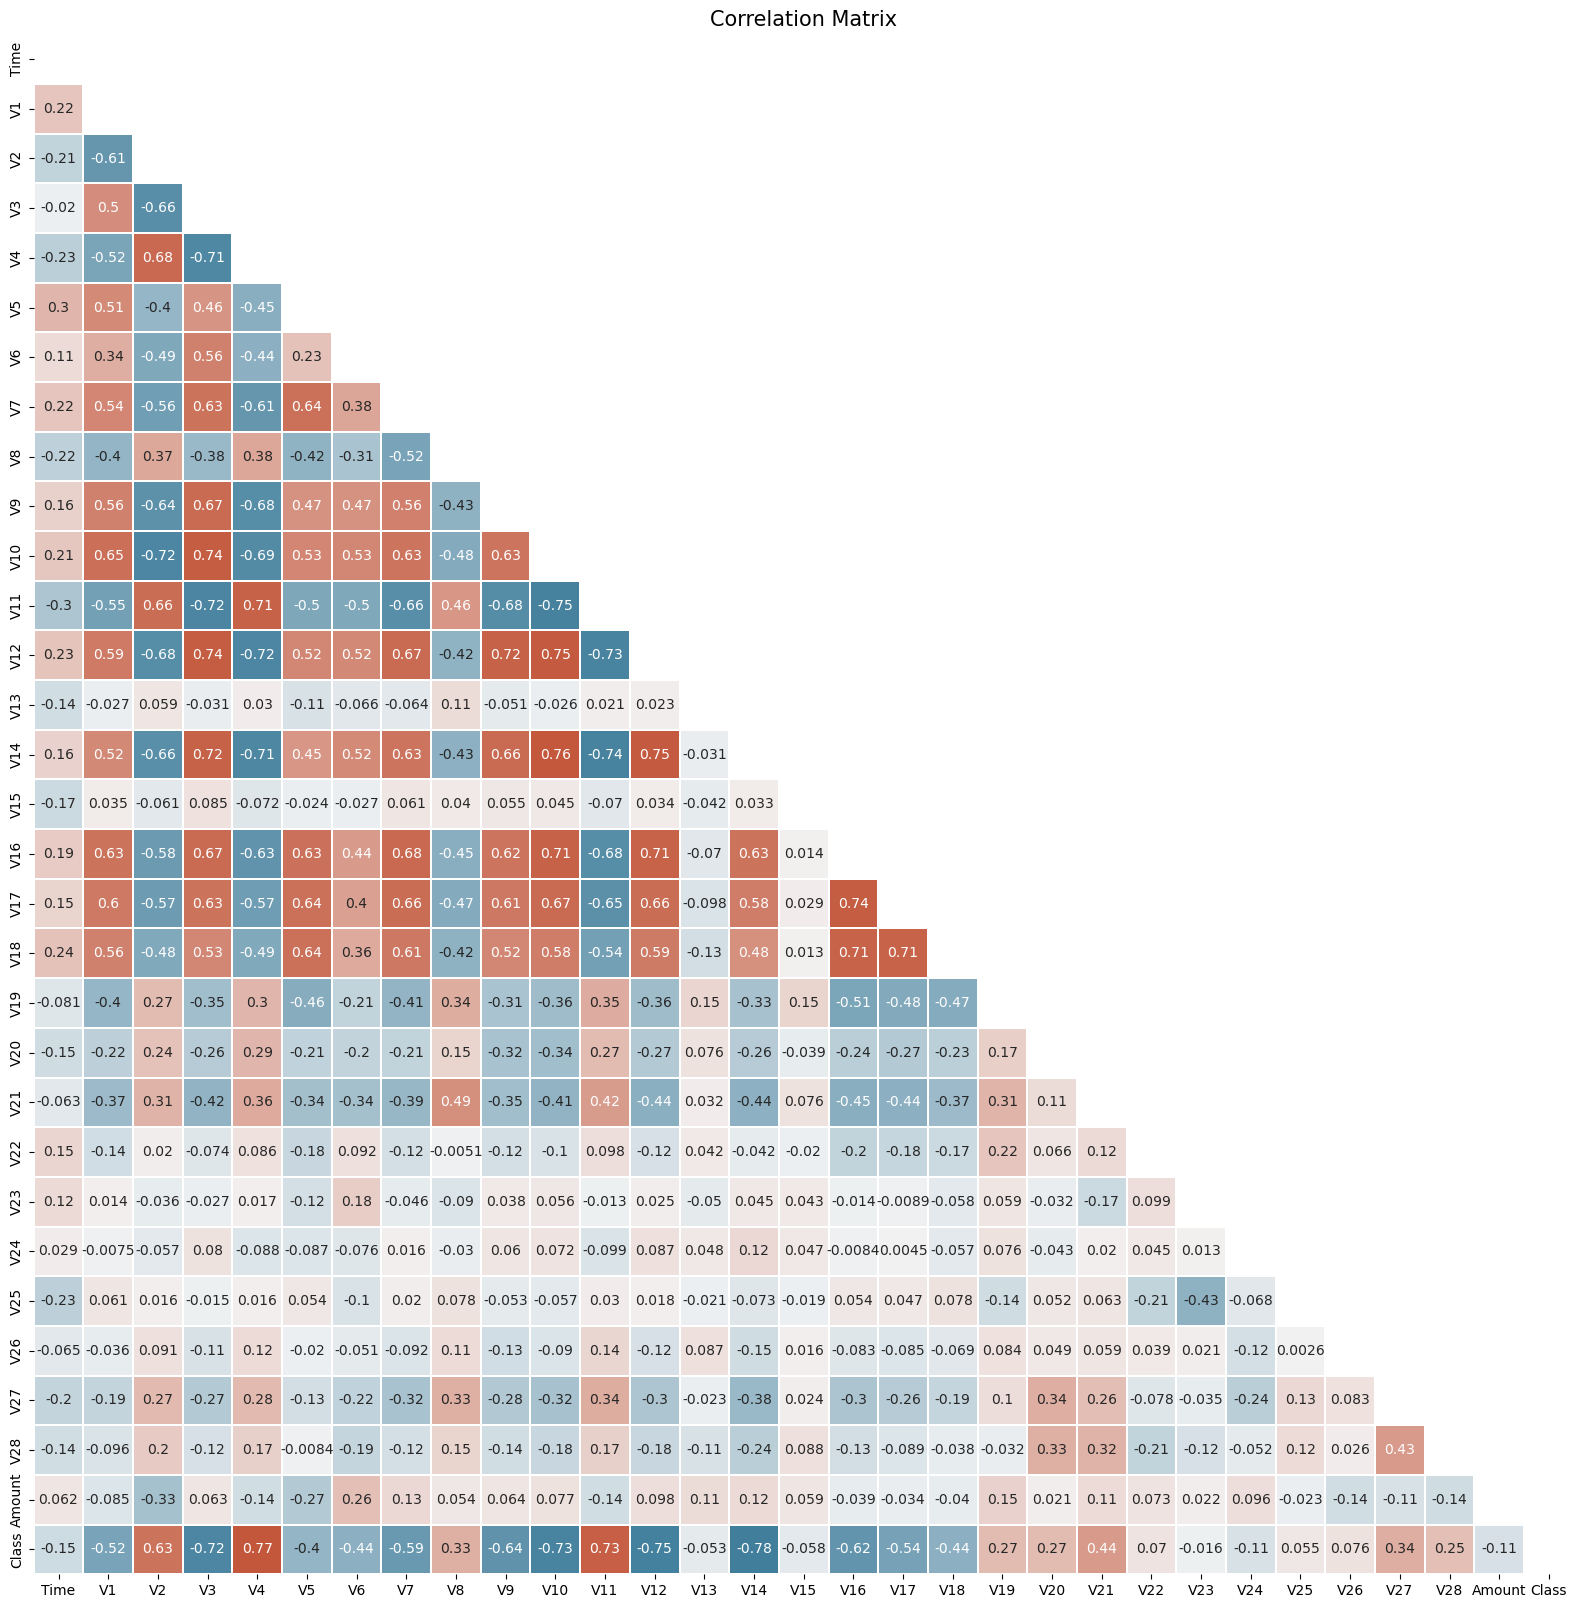

In [110]:
features = [
    'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
    'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
    'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
    'Class'
]

correlation_matrix = ros_train[features].corr(method="spearman") # pearson / spearman

#from matplotlib.colors import SymLogNorm

f, ax = plt.subplots(figsize=(20, 20))
_ = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=False,
    ax=ax,
    annot=True,
)
_ = ax.set_title("Correlation Matrix", fontsize=15)

In [111]:
raw_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [112]:
correlations = ros_train.corr(method='spearman')['Class']
sorted_correlations = correlations.sort_values(ascending=False)

print(sorted_correlations)

Class     1.000000
V4        0.772766
V11       0.725224
V2        0.630801
V21       0.437270
V27       0.341658
V8        0.333951
V19       0.270010
V20       0.269936
V28       0.253638
V26       0.075920
V22       0.069887
V25       0.055229
V23      -0.016392
V13      -0.052780
V15      -0.057594
V24      -0.108230
Amount   -0.114636
Time     -0.153987
V5       -0.400562
V6       -0.440513
V18      -0.440963
V1       -0.522025
V17      -0.538106
V7       -0.591674
V16      -0.618265
V9       -0.635810
V3       -0.716880
V10      -0.734480
V12      -0.754112
V14      -0.781630
Name: Class, dtype: float64


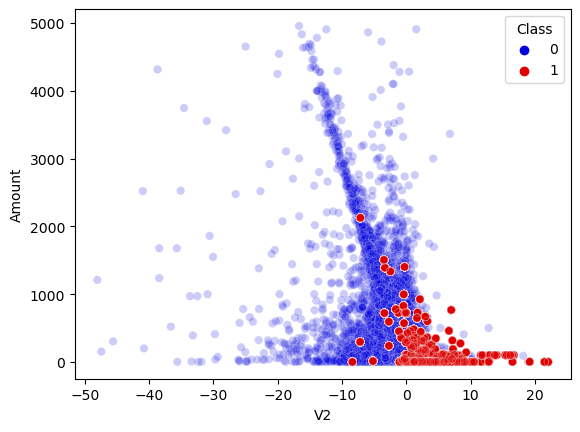

In [113]:
# To show the results of the sampler the plot showes transactions with value below 5 000 
ros_train_small = ros_train[ros_train['Amount'] <= 5000]
sns.scatterplot(x=ros_train_small['V2'], y=ros_train_small['Amount'], hue=ros_train_small['Class'], palette=colors, alpha = 0.2)

# show the plot
plt.show()

## Observations:
- after balancing training dataset with RandomOverSampler() we've got much stronger correlations between 'Class' and other features,
- on the scatterplot we can see that RandomOverSamler() copied instances of fraud transactions. 

## SMOTE

OBS: I go with standard one (all variables are presented as numbers). In case we decide that $Time$ variable is categorical we should choose $SMOTENC$.

In [114]:
from imblearn.over_sampling import SMOTE
X_smote_train, y_smote_train = SMOTE().fit_resample(X_train_raw, y_train_raw)
print(sorted(Counter(y_smote_train).items()))

[(0, 170589), (1, 170589)]


In [115]:
labels = pd.DataFrame({'Class': y_smote_train})

smote_train = pd.concat([X_smote_train, labels], axis=1)
smote_train.shape

(341178, 31)

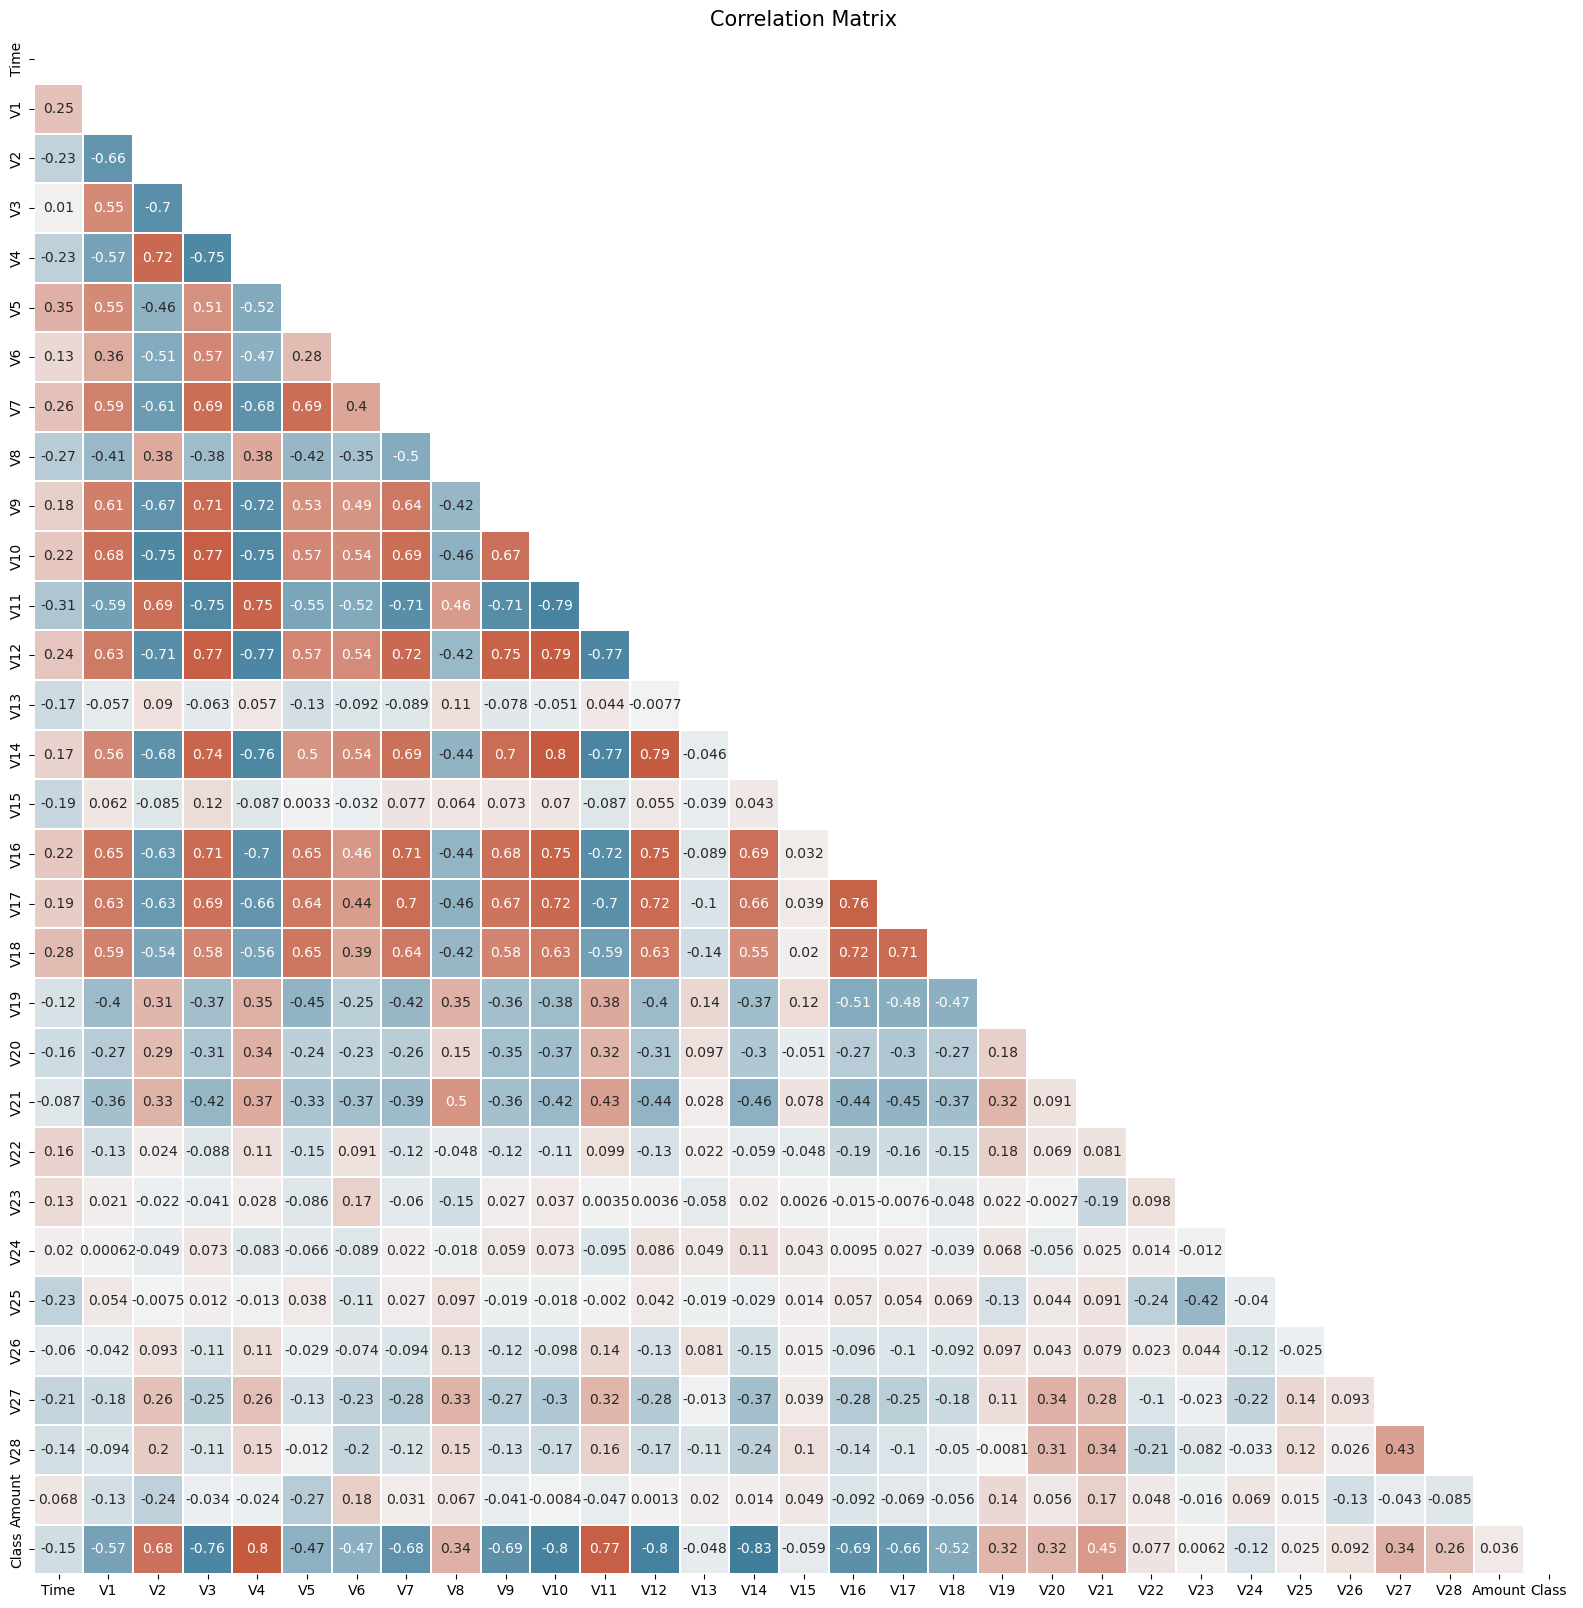

In [116]:
correlation_matrix = smote_train[features].corr(method="spearman") # pearson / spearman

#from matplotlib.colors import SymLogNorm

f, ax = plt.subplots(figsize=(20, 20))
_ = sns.heatmap(
    correlation_matrix, 
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool)), 
    cmap=sns.diverging_palette(230, 20, as_cmap=True), 
    center=0,
    square=True, 
    linewidths=.1, 
    cbar=False,
    ax=ax,
    annot=True,
)
_ = ax.set_title("Correlation Matrix", fontsize=15)

In [117]:
correlations = smote_train.corr(method='spearman')['Class']
sorted_correlations = correlations.sort_values(ascending=False)

print(sorted_correlations)

Class     1.000000
V4        0.800951
V11       0.770118
V2        0.677680
V21       0.453886
V8        0.344131
V27       0.343781
V19       0.317834
V20       0.315493
V28       0.260603
V26       0.091556
V22       0.077385
Amount    0.036241
V25       0.024584
V23       0.006186
V13      -0.048234
V15      -0.059036
V24      -0.116326
Time     -0.152339
V5       -0.467581
V6       -0.470362
V18      -0.515942
V1       -0.574527
V17      -0.655316
V7       -0.677075
V9       -0.692703
V16      -0.693563
V3       -0.763579
V10      -0.799433
V12      -0.804243
V14      -0.831634
Name: Class, dtype: float64


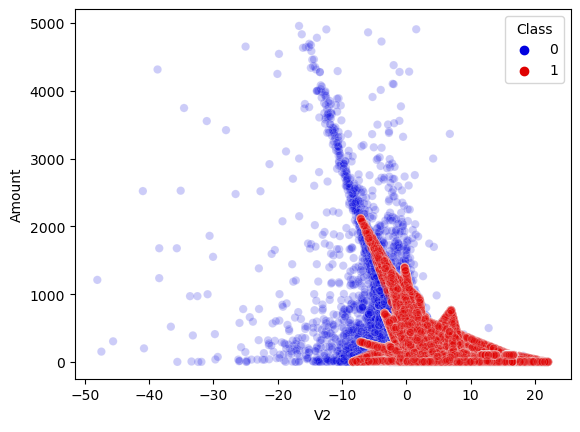

In [118]:
# To show the results of the sampler the plot showes transactions with value below 5 000 
smote_train_small = smote_train[smote_train['Amount'] <= 5000]

sns.scatterplot(x=smote_train_small['V2'], y=smote_train_small['Amount'], hue=smote_train_small['Class'], palette=colors, alpha = 0.2)

# show the plot
plt.show()

# 4.6. The $Time$ variable analysis

In [120]:
raw_train.Time.describe()

count    170884.000000
mean      94939.372885
std       47506.712210
min           0.000000
25%       54277.750000
50%       84907.500000
75%      139422.250000
max      172792.000000
Name: Time, dtype: float64

In [121]:
df_fraud = raw_train[raw_train['Class'] == 1]
df_fraud.head()

Time        V1        V2         V3         V4        V5  \
84543    60353.0 -3.975216  0.581573  -1.880372   4.319241 -3.024330   
9509     14152.0 -4.710529  8.636214 -15.496222  10.313349 -4.351341   
276071  166883.0  2.091900 -0.757459  -1.192258  -0.755458 -0.620324   
262560  160537.0  0.567539  3.309385  -6.631268   6.394574 -0.054172   
50211    44393.0 -4.617461  3.663395  -5.297446   3.880960 -3.263551   

              V6         V7        V8        V9  ...       V21       V22  \
84543   1.240793  -1.909559  0.660718 -2.752611  ...  0.578984  1.397311   
9509   -3.322689 -10.788373  5.060381 -5.689311  ...  1.990545  0.223785   
276071 -0.322077  -1.082511  0.117200 -0.140927  ...  0.288253  0.831939   
262560 -2.396535  -2.792489  0.514811 -3.541780  ...  0.614221 -0.365047   
50211  -0.918547  -5.715262  0.831040 -2.457034  ...  2.698175 -0.027081   

             V23       V24       V25       V26       V27       V28  Amount  \
84543   1.045322 -0.304000  0.005295  0.235435  0.962015 -0.673557  454.82   
9509    0.554408 -1.204042 -0.450685  0.641836  1.605958  0.721644    1.00   
276071  0.142007  0.592615 -0.196143 -0.136676  0.020182 -0.015470   19.95   
262560 -0.180409 -0.523271  0.645054  0.246466  0.902675  0.473571    4.69   
50211   0.366775 -0.123011 -0.300457 -0.239996 -0.183463 -0.073360    1.00   

        Class  
84543       1  
9509        1  
276071      1  
262560      1  
50211       1  

[5 rows x 31 columns]

<AxesSubplot: xlabel='Time', ylabel='Count'>

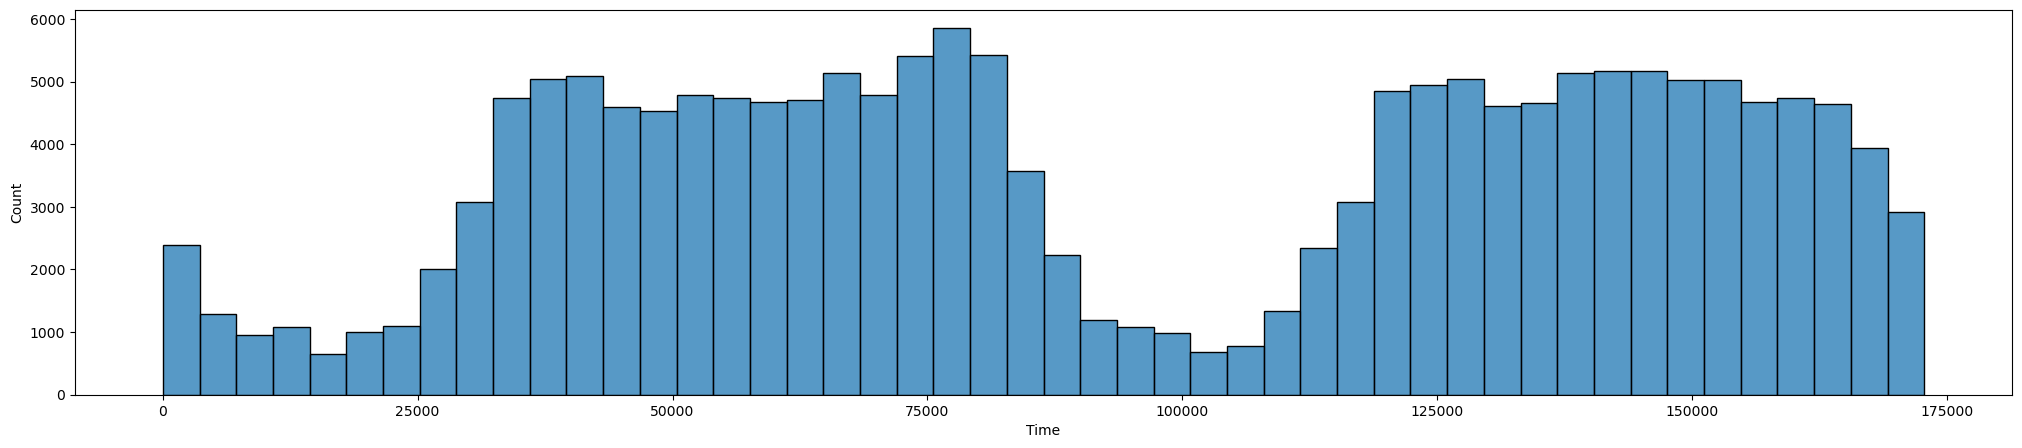

In [122]:
f, ax = plt.subplots(figsize=(25, 5))
sns.histplot(raw_train['Time'], bins = 48)

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- There are two periods when there is much more transactions done.
- $Time$ is in seconds from 0 to 172792 (so it is 2879,8 min -> about 48hours)
- We can assume that the modes are daytimes and the dataset describes two days

In [123]:
m = 172792/60 #minutes
h = m/60

print(f'Minutes {m}')
print(f'Hours: {h}')

Minutes 2879.866666666667
Hours: 47.99777777777778


# 4.6.1. Time distribution for the fraudulent transactions

In [124]:
len(df_fraud)

295

<AxesSubplot: xlabel='Time', ylabel='Count'>

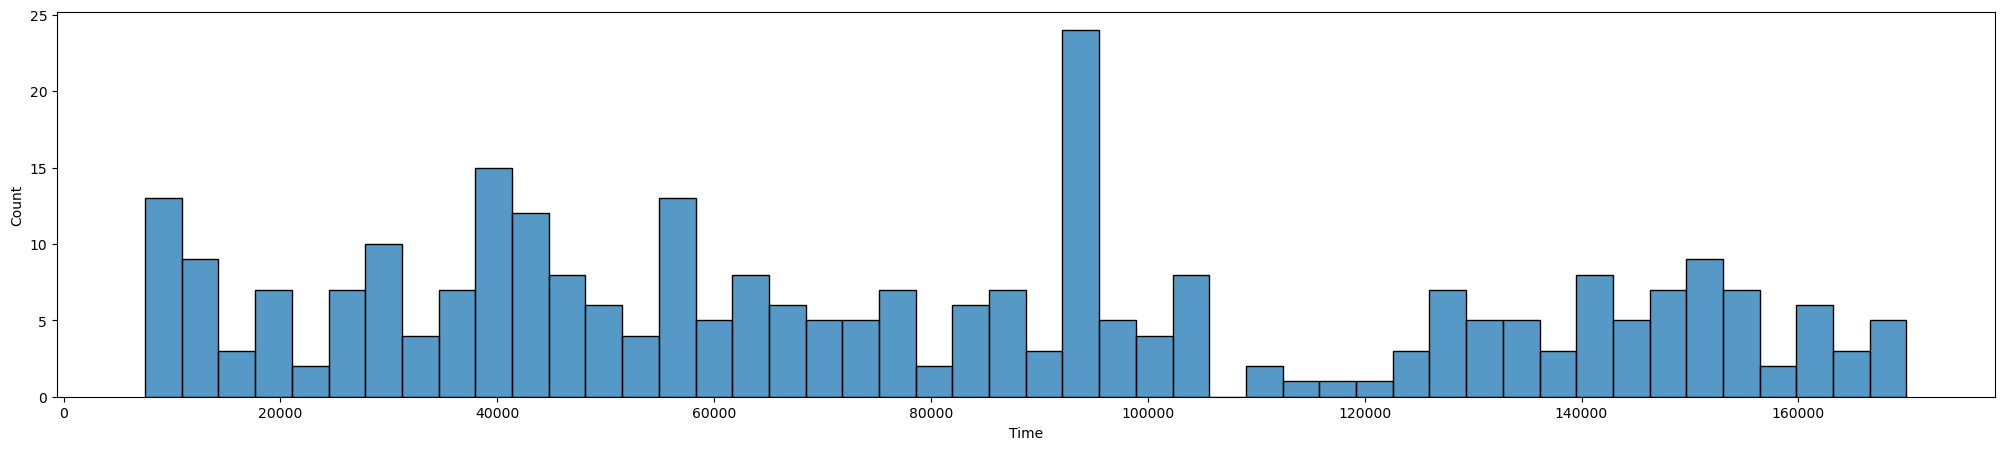

In [125]:
f, ax = plt.subplots(figsize=(25, 5))
sns.histplot(df_fraud['Time'], bins = 48)


### **<code style="background:lightgreen;color:black"> Observations:</code>** 
- There are 295 fraudulent transactions in the training set
- There seems to be no real time pattern for the fraudulent transactions

## 4.6.2 $Time$ variable preprocessing to $hours$


In [126]:
# calculate the hour for each value in 'Time'
# // - Floor Division	9//2 = 4

train_t = raw_train.copy()
train_t['hour'] = ((((train_t['Time']) // (60 * 60)) % 24) + 1) # I calculate floor to get hours. As a result I get values from 0 to 47. Next I calulate modulo 24 -> I got values from 0 to 23. Last step adding 1 to get values from 1 to 24.
train_t['hour'] = train_t['hour'].astype(int)
print(train_t['hour'].min(), train_t['hour'].max())

1 24


<AxesSubplot: xlabel='Time', ylabel='hour'>

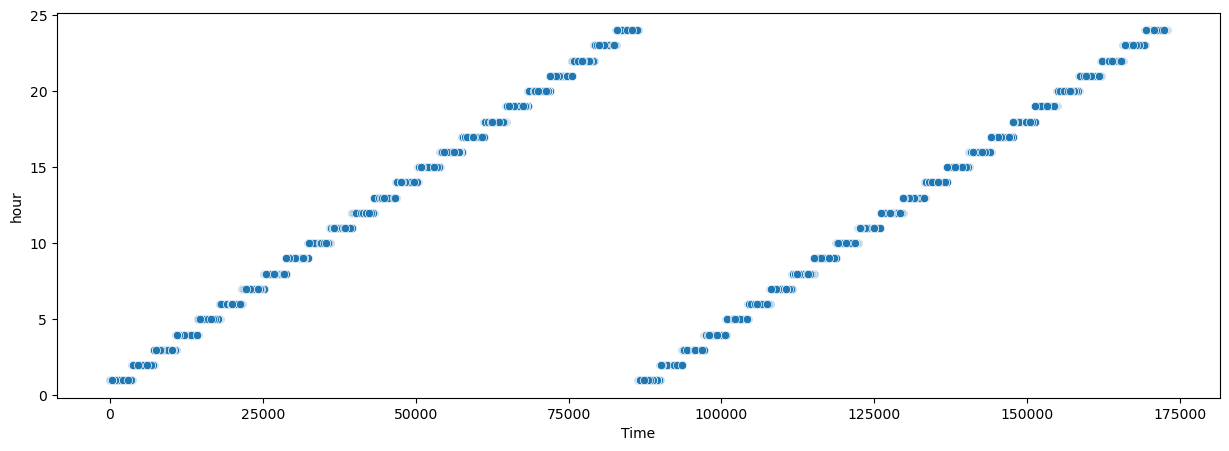

In [128]:
f, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(x=train_t['Time'], y=train_t['hour'], data=train_t)

# -------------------------------------------------------------------------------------------
# SCENARIOS: Model results on different data preprocessing ways
# -------------------------------------------------------------------------------------------

In [96]:
#######################################################################################################################
#####   Function to plot the ROC curve
#######################################################################################################################

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)

    
    
#######################################################################################################################
#####   Function used to test different models
#######################################################################################################################
    
def model_tester(X_train, y_train, X_val, y_val):
    
    
    rf_clf = RandomForestClassifier() #proba #featimp
    brf_clf = BalancedRandomForestClassifier() #proba #featimp
    lr_clf = LogisticRegression() #proba #coef
    svc_rbf_clf = SVC(kernel='rbf', probability=True) #kernel #proba #coef 
    svc_ploy_clf = SVC(kernel='poly', probability=True)
    knn_clf = KNeighborsClassifier() #proba
    gnb_clf = GaussianNB() #proba
    ada_clf = AdaBoostClassifier() #proba #featimp
    qda_clf = QuadraticDiscriminantAnalysis() #proba
    mlp_clf = MLPClassifier() #coef #proba
    xgb_clf = xgb.XGBClassifier() #featimp #coef #proba
    xgbrf_clf = xgb.XGBRFClassifier() #featimp #coef #proba

    model_names = ['rf_clf', 'brf_clf', 'lr_clf', 'svc_rbf_clf', 'svc_ploy_clf', 'knn_clf', 'gnb_clf', 'ada_clf',\
               'qda_clf', 'mlp_clf', 'xgb_clf', 'xgbrf_clf']
    
    models = [rf_clf, brf_clf, lr_clf, svc_rbf_clf, svc_ploy_clf, knn_clf, gnb_clf, ada_clf, qda_clf, mlp_clf, \
              xgb_clf, xgbrf_clf]
    
    eval_dict_out = dict()

    for i, clf in enumerate(models):
        print(f'============ {model_names[i]} ============')
    
        start_time = time.time()
        clf.fit(X_train, y_train)
        train_time = time.time() - start_time
    
        try:
            feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': clf.feature_importances_})
            print(feature_importances.sort_values('importance', ascending=False, inplace=True))
        except Exception as e: 
            print(e)
            print(f'The {model_names[i]} model does not have a feature importance parameter')
            
        try:
            coefs = pd.DataFrame({'feature': X_train.columns, 'coef': clf.coef_})
            print(coefs.sort_values('coef', ascending=False, inplace=True))
        except Exception as e: 
            print(e)
            print(f'The {model_names[i]} model does not have a coef parameter')
        
        start_time = time.time()
        y_pred = clf.predict(X_val)
        test_time = time.time() - start_time
        
        # Precision and recall to include in the results
        precision_real = precision_score(y_val, y_pred)
        recall_real = recall_score(y_val, y_pred)
        
        print(metrics.classification_report(y_val, y_pred, digits=4), end='\n\n===============================================\n')
        bal_acc_score = balanced_accuracy_score(y_val, y_pred)
    #     print(bal_acc_score, end='\n\n===============================================\n')
        precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        y_prob = clf.predict_proba(X_val)[:,1]
        fpr, tpr, thresholds = roc_curve(y_val, y_prob)
        plot_roc_curve(fpr,tpr)
        plt.show()
        rocauc_score = roc_auc_score(y_val, y_prob)
        print(f'ROC AUC score: {rocauc_score}', end='\n\n===============================================\n')
        conf_mtr = confusion_matrix(y_val, y_pred)
        print(conf_mtr, end='\n\n===============================================\n')
        
        eval_dict_out[model_names[i]] = [bal_acc_score,precision_real, recall_real, f1, conf_mtr[0,1], conf_mtr[1,0], train_time, test_time]
    return eval_dict_out

# ________________
# OUTLIERS_IN

Testing the models trained on data which:
 - **includes all the outliers**,
 - with variables $Amount$ and $Time$ scaled with MinMaXScaler(). $Time$ left as numeric.
 - labels was separated, no features dropped.

In [81]:
raw_train.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [88]:
imputer = SimpleImputer(strategy='most_frequent')
scaler_amount = MinMaxScaler()
scaler_time = MinMaxScaler()

In [89]:
clean_train_out = DataCleaner(hour=False, feature_to_drop=[], labels=True, imputer=imputer, amount_scaler=scaler_amount, time_scaler=scaler_time)

In [90]:
X_train_out, y_train_out = clean_train_out.fit_transform(raw_train)

In [91]:
X_train_out.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [92]:
X_val_out, y_val_out = clean_train_out.transform(raw_val)

In [93]:
X_train_out.head()

Time        V1        V2        V3        V4        V5        V6  \
100143  0.390226  0.545137 -1.382002  0.808039  0.325749 -1.216218  0.520418   
133205  0.464651  1.274782  0.239294  0.126050  0.981467  0.308615  0.288049   
150177  0.536692 -2.442663 -3.250807 -1.081487  0.276296  0.401510 -0.383979   
78925   0.334350 -2.086922 -6.322946 -2.168681  0.926756 -2.522653 -0.144318   
101526  0.392738 -0.873372 -0.381341  3.111317 -1.452125 -1.447693  0.795084   

              V7        V8        V9  ...       V20       V21       V22  \
100143 -0.404707  0.236356  0.843181  ...  0.540131  0.032340 -0.309100   
133205  0.070181 -0.096043  0.315763  ...  0.024280 -0.321162 -0.676714   
150177  0.261438  0.486404  1.891807  ...  1.358472  0.851970  0.984857   
78925   2.146822 -0.703704 -0.883657  ...  3.192718  0.617022 -1.792547   
101526 -1.041973  0.765762  0.220466  ... -0.000809  0.205009  0.861046   

             V23       V24       V25       V26       V27       V28    Amount  
100143 -0.173193  0.119002 -0.062738  0.921664 -0.074989  0.053908  0.016341  
133205 -0.175115 -0.975418  0.762622 -0.446555  0.045943  0.018644  0.000956  
150177  1.307229 -1.158888 -1.705672 -0.959345  0.149654 -0.049546  0.026758  
78925  -1.668460  0.008613 -0.191875  0.930436 -0.418456  0.309412  0.096909  
101526 -0.342198  0.231057  0.342896 -0.105434  0.345348  0.113345  0.000053  

[5 rows x 30 columns]

============ rf_clf ============
None
'RandomForestClassifier' object has no attribute 'coef_'
The rf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9998     56651
           1     0.9459    0.7447    0.8333        94

    accuracy                         0.9995     56745
   macro avg     0.9728    0.8723    0.9165     56745
weighted avg     0.9995    0.9995    0.9995     56745




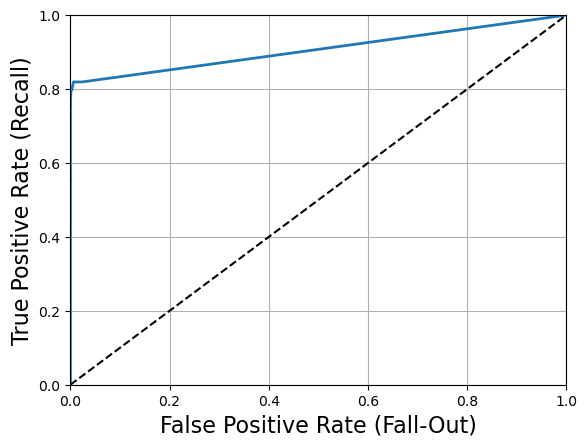

ROC AUC score: 0.907331732890858

[[56647     4]
 [   24    70]]

============ brf_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

None
'BalancedRandomForestClassifier' object has no attribute 'coef_'
The brf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9997    0.9759    0.9877     56651
           1     0.0548    0.8404    0.1029        94

    accuracy                         0.9757     56745
   macro avg     0.5273    0.9082    0.5453     56745
weighted avg     0.9982    0.9757    0.9862     56745




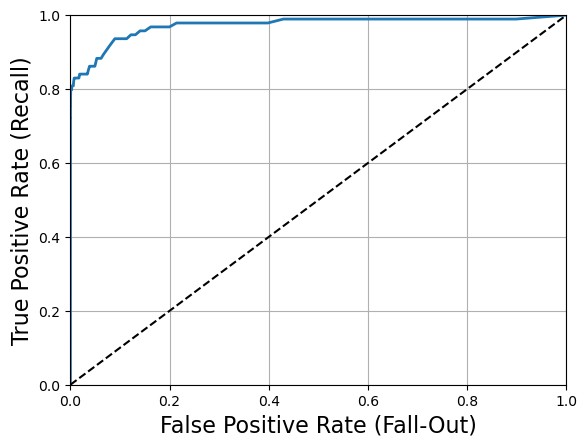

ROC AUC score: 0.972622405869157

[[55288  1363]
 [   15    79]]

============ lr_clf ============
'LogisticRegression' object has no attribute 'feature_importances_'
The lr_clf model does not have a feature importance parameter
Per-column arrays must each be 1-dimensional
The lr_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9992    0.9999    0.9995     56651
           1     0.8621    0.5319    0.6579        94

    accuracy                         0.9991     56745
   macro avg     0.9306    0.7659    0.8287     56745
weighted avg     0.9990    0.9991    0.9990     56745




C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


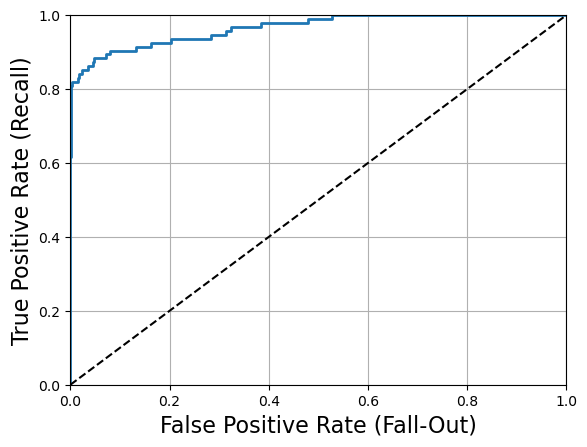

ROC AUC score: 0.9663929614583056

[[56643     8]
 [   44    50]]

============ svc_rbf_clf ============
'SVC' object has no attribute 'feature_importances_'
The svc_rbf_clf model does not have a feature importance parameter
coef_ is only available when using a linear kernel
The svc_rbf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9993    0.9999    0.9996     56651
           1     0.9500    0.6064    0.7403        94

    accuracy                         0.9993     56745
   macro avg     0.9747    0.8032    0.8700     56745
weighted avg     0.9993    0.9993    0.9992     56745




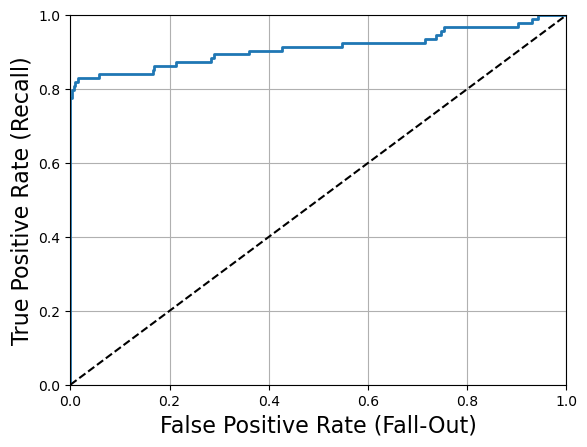

ROC AUC score: 0.9118824591179213

[[56648     3]
 [   37    57]]

============ svc_ploy_clf ============
'SVC' object has no attribute 'feature_importances_'
The svc_ploy_clf model does not have a feature importance parameter
coef_ is only available when using a linear kernel
The svc_ploy_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9286    0.6915    0.7927        94

    accuracy                         0.9994     56745
   macro avg     0.9640    0.8457    0.8962     56745
weighted avg     0.9994    0.9994    0.9994     56745




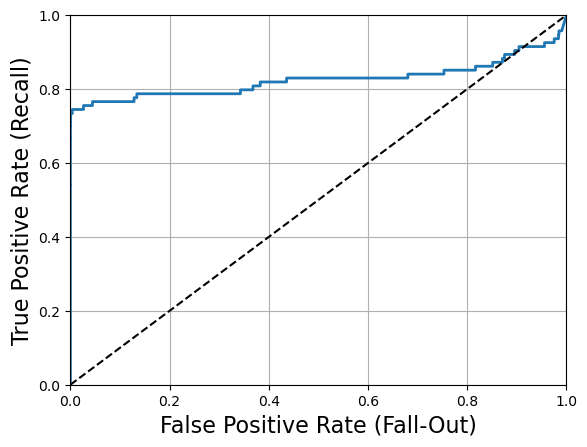

ROC AUC score: 0.8255562144778199

[[56646     5]
 [   29    65]]

============ knn_clf ============
'KNeighborsClassifier' object has no attribute 'feature_importances_'
The knn_clf model does not have a feature importance parameter
'KNeighborsClassifier' object has no attribute 'coef_'
The knn_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9167    0.7021    0.7952        94

    accuracy                         0.9994     56745
   macro avg     0.9581    0.8510    0.8974     56745
weighted avg     0.9994    0.9994    0.9994     56745




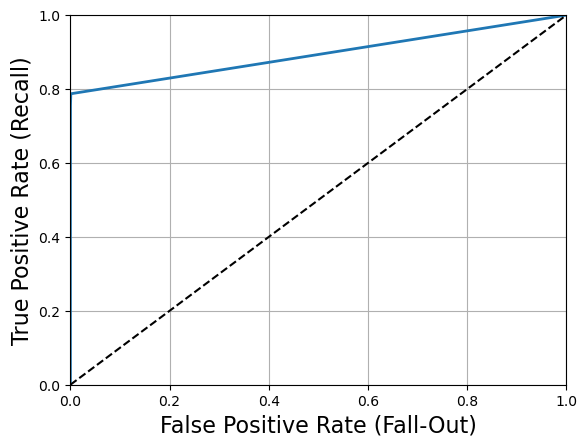

ROC AUC score: 0.8934885752519064

[[56645     6]
 [   28    66]]

============ gnb_clf ============
'GaussianNB' object has no attribute 'feature_importances_'
The gnb_clf model does not have a feature importance parameter
'GaussianNB' object has no attribute 'coef_'
The gnb_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9788    0.9891     56651
           1     0.0580    0.7872    0.1081        94

    accuracy                         0.9785     56745
   macro avg     0.5288    0.8830    0.5486     56745
weighted avg     0.9981    0.9785    0.9877     56745




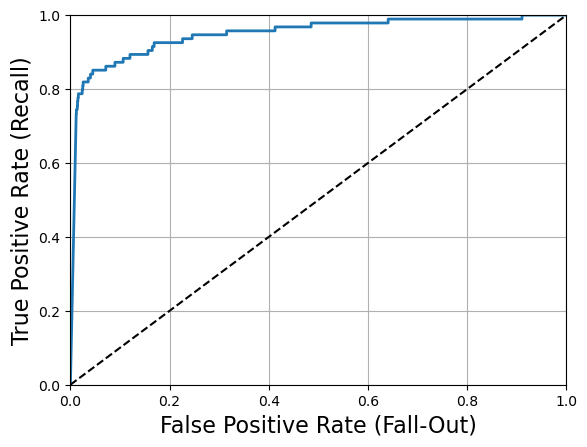

ROC AUC score: 0.9490880520033637

[[55450  1201]
 [   20    74]]

============ ada_clf ============
None
'AdaBoostClassifier' object has no attribute 'coef_'
The ada_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56651
           1     0.8493    0.6596    0.7425        94

    accuracy                         0.9992     56745
   macro avg     0.9244    0.8297    0.8711     56745
weighted avg     0.9992    0.9992    0.9992     56745




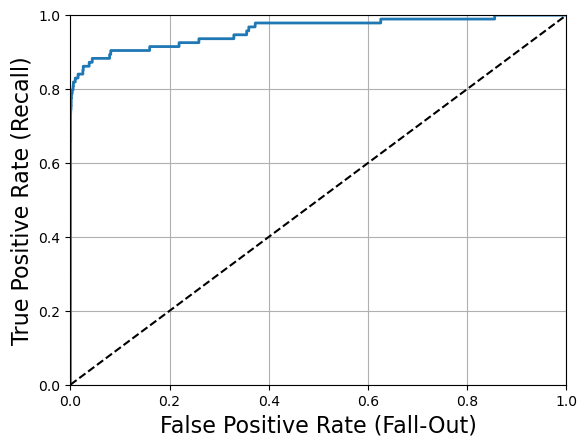

ROC AUC score: 0.9586892984556055

[[56640    11]
 [   32    62]]

============ qda_clf ============
'QuadraticDiscriminantAnalysis' object has no attribute 'feature_importances_'
The qda_clf model does not have a feature importance parameter
'QuadraticDiscriminantAnalysis' object has no attribute 'coef_'
The qda_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9997    0.9762    0.9878     56651
           1     0.0534    0.8085    0.1001        94

    accuracy                         0.9759     56745
   macro avg     0.5265    0.8924    0.5440     56745
weighted avg     0.9981    0.9759    0.9863     56745




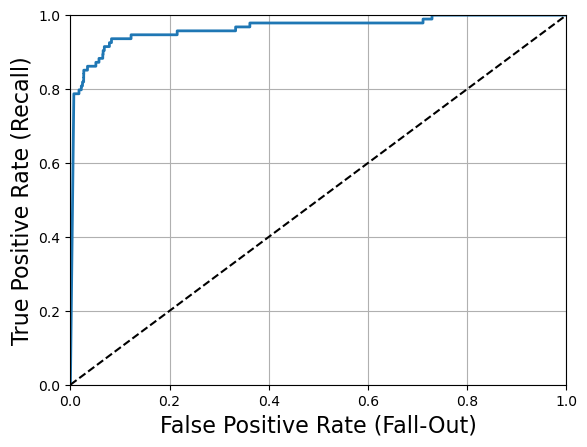

ROC AUC score: 0.9640726704041205

[[55303  1348]
 [   18    76]]

============ mlp_clf ============
'MLPClassifier' object has no attribute 'feature_importances_'
The mlp_clf model does not have a feature importance parameter
'MLPClassifier' object has no attribute 'coef_'
The mlp_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56651
           1     0.8861    0.7447    0.8092        94

    accuracy                         0.9994     56745
   macro avg     0.9428    0.8723    0.9045     56745
weighted avg     0.9994    0.9994    0.9994     56745




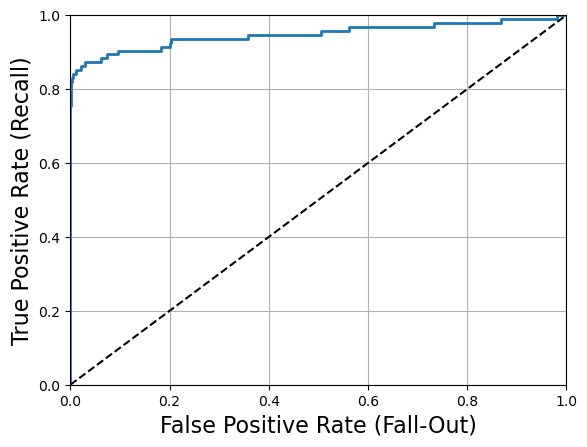

ROC AUC score: 0.9478050940491559

[[56642     9]
 [   24    70]]

============ xgb_clf ============
None
Coefficients are not defined for Booster type None
The xgb_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9565    0.7021    0.8098        94

    accuracy                         0.9995     56745
   macro avg     0.9780    0.8510    0.9048     56745
weighted avg     0.9994    0.9995    0.9994     56745




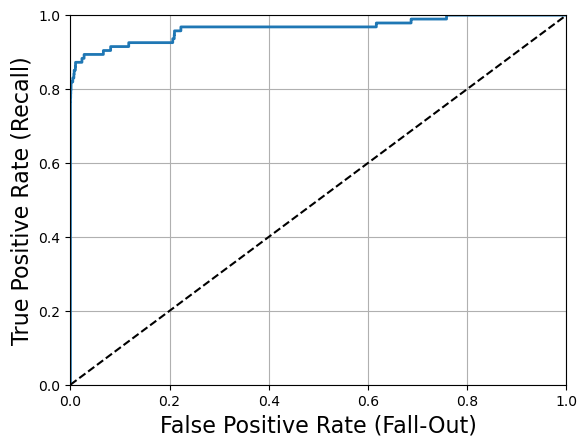

ROC AUC score: 0.9651948830408807

[[56648     3]
 [   28    66]]

============ xgbrf_clf ============
None
Coefficients are not defined for Booster type None
The xgbrf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9296    0.7021    0.8000        94

    accuracy                         0.9994     56745
   macro avg     0.9645    0.8510    0.8999     56745
weighted avg     0.9994    0.9994    0.9994     56745




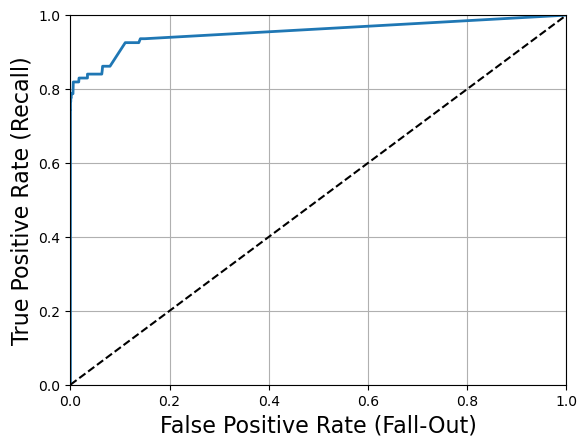

ROC AUC score: 0.9535932399833695

[[56646     5]
 [   28    66]]

Stored 'eval_dict_out' (dict)


In [97]:
eval_dict_out = model_tester(X_train_out, y_train_out, X_val_out, y_val_out)
%store eval_dict_out

In [98]:
eval_df_out = pd.DataFrame(data=eval_dict_out.values(), index=eval_dict_out.keys(),\
                       columns=['bal_acc_score','precisions', 'recalls', 'f1', 'false_positives', 'false_negatives', 'train_time', 'test_time'])
eval_df_out

bal_acc_score  precisions   recalls        f1  false_positives  \
rf_clf             0.872305    0.945946  0.744681  0.833333                4   
brf_clf            0.908183    0.054785  0.840426  0.102865             1363   
lr_clf             0.765887    0.862069  0.531915  0.657895                8   
svc_rbf_clf        0.803165    0.950000  0.606383  0.740260                3   
svc_ploy_clf       0.845701    0.928571  0.691489  0.792683                5   
knn_clf            0.851011    0.916667  0.702128  0.795181                6   
gnb_clf            0.883017    0.058039  0.787234  0.108108             1201   
ada_clf            0.829690    0.849315  0.659574  0.742515               11   
qda_clf            0.892358    0.053371  0.808511  0.100132             1348   
mlp_clf            0.872261    0.886076  0.744681  0.809249                9   
xgb_clf            0.851037    0.956522  0.702128  0.809816                3   
xgbrf_clf          0.851020    0.929577  0.702128  0.800000                5   

              false_negatives  train_time  test_time  
rf_clf                     24  126.351488   0.349081  
brf_clf                    15    2.954218   0.269061  
lr_clf                     44    1.029110   0.003000  
svc_rbf_clf                37  741.936170  10.676566  
svc_ploy_clf               29  400.709221   0.581134  
knn_clf                    28    0.025005   6.617137  
gnb_clf                    20    0.077017   0.025006  
ada_clf                    32   43.381321   0.370087  
qda_clf                    18    0.203046   0.045011  
mlp_clf                    24   15.897264   0.031006  
xgb_clf                    28    8.514572   0.031007  
xgbrf_clf                  28    9.682426   0.033008

array([[<AxesSubplot: title={'center': 'bal_acc_score'}>,
        <AxesSubplot: title={'center': 'precisions'}>,
        <AxesSubplot: title={'center': 'recalls'}>],
       [<AxesSubplot: title={'center': 'f1'}>,
        <AxesSubplot: title={'center': 'false_positives'}>,
        <AxesSubplot: title={'center': 'false_negatives'}>],
       [<AxesSubplot: title={'center': 'train_time'}>,
        <AxesSubplot: title={'center': 'test_time'}>, <AxesSubplot: >]],
      dtype=object)

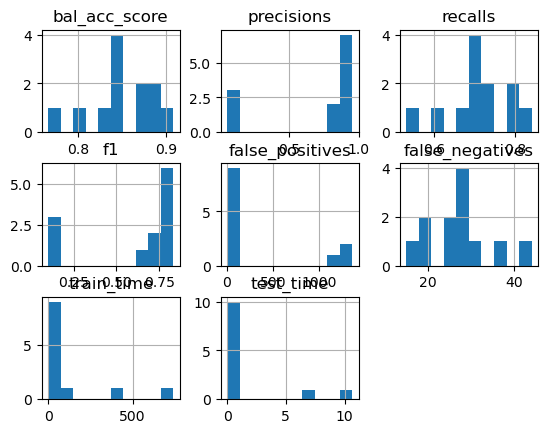

In [99]:
eval_df_out.hist()

# ________________
# $Time$ as categorical variable -> $hours$

Testing the models trained on data which:
 - $Time$ changed into categorical variable $hours$,
 - includes all the outliers,
 - with variables $Amount$ scaled with MinMaxScaler(). 
 - labels was separated, no features dropped.

In [100]:
scaler = MinMaxScaler()

In [101]:
clean_train_h = DataCleaner(hour=True, feature_to_drop=[], labels=True, amount_scaler=scaler)

In [102]:
X_train_h, y_train_h = clean_train_h.fit_transform(raw_train)

In [103]:
X_train_h.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'hour_24'],
      dtype='object')

In [104]:
X_val_h, y_val_h = clean_train_h.transform(raw_val)

============ rf_clf ============
None
'RandomForestClassifier' object has no attribute 'coef_'
The rf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9306    0.7128    0.8072        94

    accuracy                         0.9994     56745
   macro avg     0.9650    0.8563    0.9035     56745
weighted avg     0.9994    0.9994    0.9994     56745




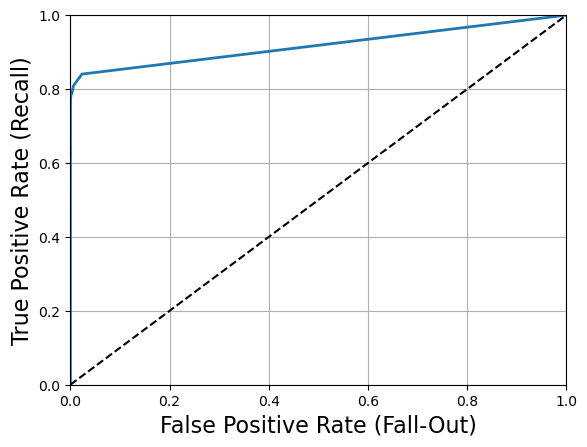

ROC AUC score: 0.9177788640188508

[[56646     5]
 [   27    67]]

============ brf_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

None
'BalancedRandomForestClassifier' object has no attribute 'coef_'
The brf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9997    0.9773    0.9884     56651
           1     0.0580    0.8404    0.1084        94

    accuracy                         0.9771     56745
   macro avg     0.5288    0.9089    0.5484     56745
weighted avg     0.9982    0.9771    0.9869     56745




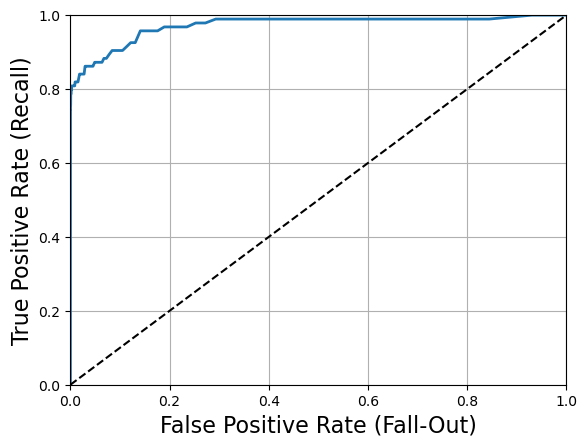

ROC AUC score: 0.9721992287980495

[[55367  1284]
 [   15    79]]

============ lr_clf ============
'LogisticRegression' object has no attribute 'feature_importances_'
The lr_clf model does not have a feature importance parameter
Per-column arrays must each be 1-dimensional
The lr_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     56651
           1     0.8548    0.5638    0.6795        94

    accuracy                         0.9991     56745
   macro avg     0.9271    0.7818    0.8395     56745
weighted avg     0.9990    0.9991    0.9990     56745




C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


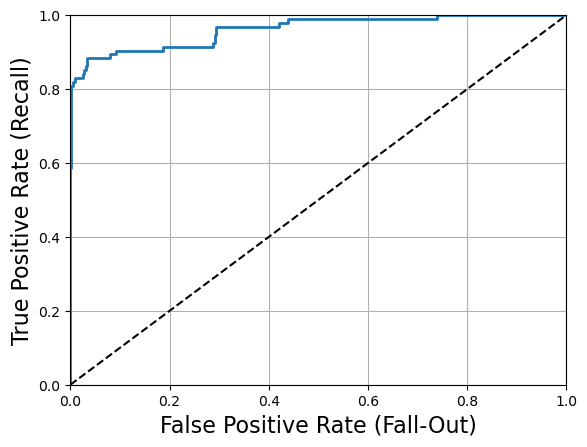

ROC AUC score: 0.9618006405024868

[[56642     9]
 [   41    53]]

============ svc_rbf_clf ============
'SVC' object has no attribute 'feature_importances_'
The svc_rbf_clf model does not have a feature importance parameter
coef_ is only available when using a linear kernel
The svc_rbf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9993    0.9999    0.9996     56651
           1     0.9500    0.6064    0.7403        94

    accuracy                         0.9993     56745
   macro avg     0.9747    0.8032    0.8700     56745
weighted avg     0.9993    0.9993    0.9992     56745




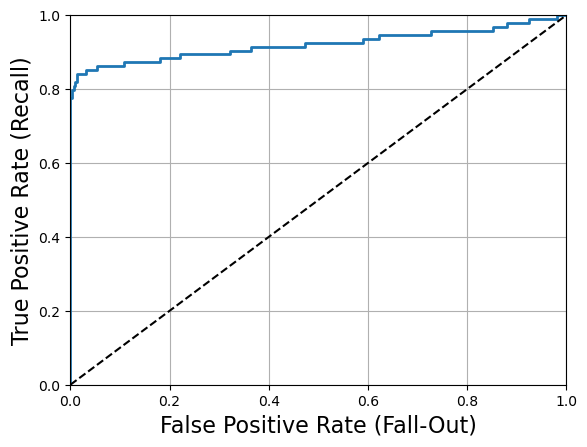

ROC AUC score: 0.9214809826646692

[[56648     3]
 [   37    57]]

============ svc_ploy_clf ============
'SVC' object has no attribute 'feature_importances_'
The svc_ploy_clf model does not have a feature importance parameter
coef_ is only available when using a linear kernel
The svc_ploy_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9178    0.7128    0.8024        94

    accuracy                         0.9994     56745
   macro avg     0.9587    0.8563    0.9011     56745
weighted avg     0.9994    0.9994    0.9994     56745




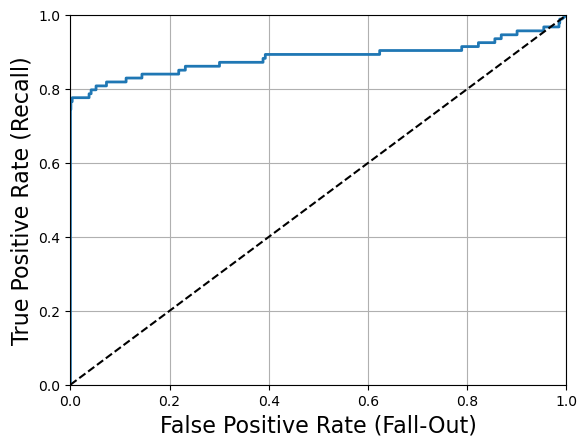

ROC AUC score: 0.8853069014950441

[[56645     6]
 [   27    67]]

============ knn_clf ============
'KNeighborsClassifier' object has no attribute 'feature_importances_'
The knn_clf model does not have a feature importance parameter
'KNeighborsClassifier' object has no attribute 'coef_'
The knn_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9167    0.7021    0.7952        94

    accuracy                         0.9994     56745
   macro avg     0.9581    0.8510    0.8974     56745
weighted avg     0.9994    0.9994    0.9994     56745




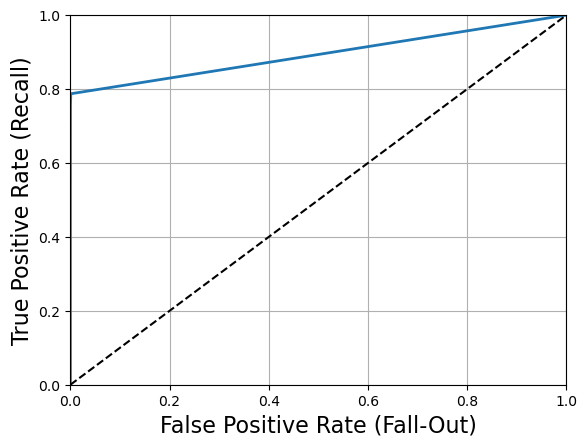

ROC AUC score: 0.8934950538891164

[[56645     6]
 [   28    66]]

============ gnb_clf ============
'GaussianNB' object has no attribute 'feature_importances_'
The gnb_clf model does not have a feature importance parameter
'GaussianNB' object has no attribute 'coef_'
The gnb_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9531    0.9758     56651
           1     0.0267    0.7766    0.0517        94

    accuracy                         0.9528     56745
   macro avg     0.5132    0.8648    0.5138     56745
weighted avg     0.9980    0.9528    0.9743     56745




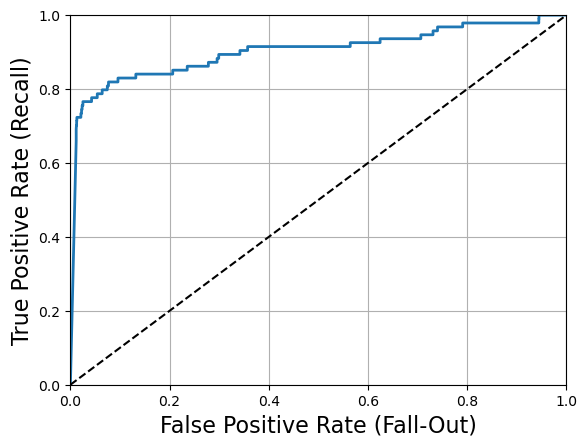

ROC AUC score: 0.9029025984781023

[[53994  2657]
 [   21    73]]

============ ada_clf ============
None
'AdaBoostClassifier' object has no attribute 'coef_'
The ada_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56651
           1     0.8267    0.6596    0.7337        94

    accuracy                         0.9992     56745
   macro avg     0.9131    0.8297    0.8667     56745
weighted avg     0.9991    0.9992    0.9992     56745




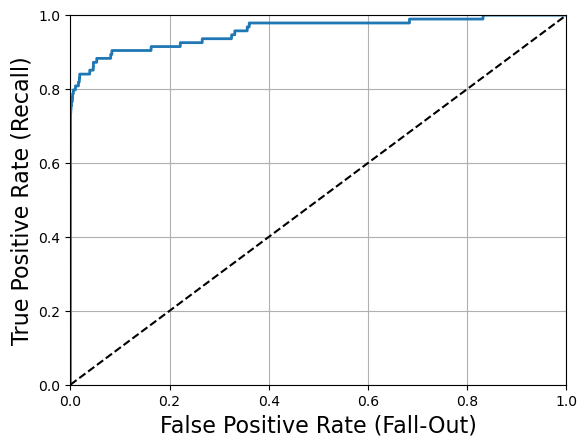

ROC AUC score: 0.9576944990173129

[[56638    13]
 [   32    62]]

============ qda_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


'QuadraticDiscriminantAnalysis' object has no attribute 'feature_importances_'
The qda_clf model does not have a feature importance parameter
'QuadraticDiscriminantAnalysis' object has no attribute 'coef_'
The qda_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9704    0.9848     56651
           1     0.0418    0.7766    0.0793        94

    accuracy                         0.9701     56745
   macro avg     0.5207    0.8735    0.5320     56745
weighted avg     0.9980    0.9701    0.9833     56745




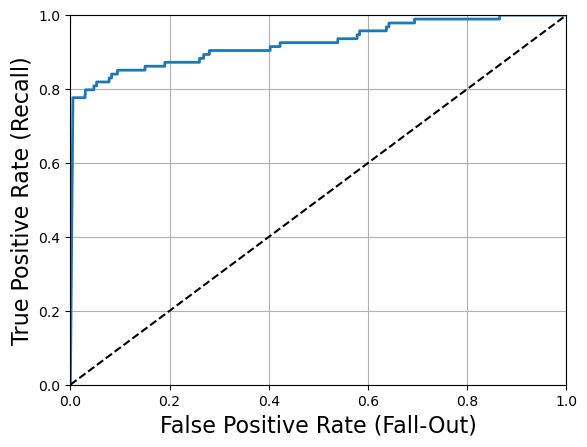

ROC AUC score: 0.9243734594457969

[[54976  1675]
 [   21    73]]

============ mlp_clf ============
'MLPClassifier' object has no attribute 'feature_importances_'
The mlp_clf model does not have a feature importance parameter
'MLPClassifier' object has no attribute 'coef_'
The mlp_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56651
           1     0.8434    0.7447    0.7910        94

    accuracy                         0.9993     56745
   macro avg     0.9215    0.8722    0.8953     56745
weighted avg     0.9993    0.9993    0.9993     56745




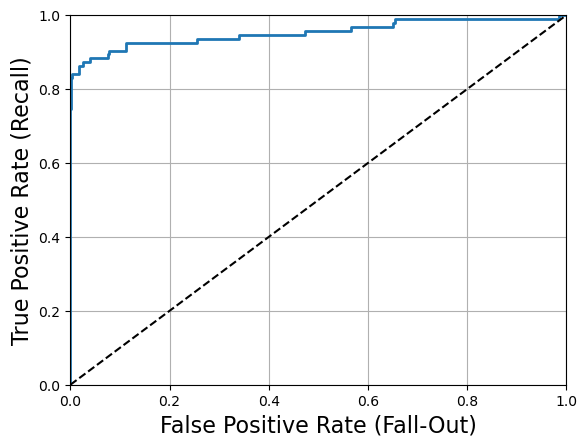

ROC AUC score: 0.9530430252869662

[[56638    13]
 [   24    70]]

============ xgb_clf ============
None
Coefficients are not defined for Booster type None
The xgb_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9565    0.7021    0.8098        94

    accuracy                         0.9995     56745
   macro avg     0.9780    0.8510    0.9048     56745
weighted avg     0.9994    0.9995    0.9994     56745




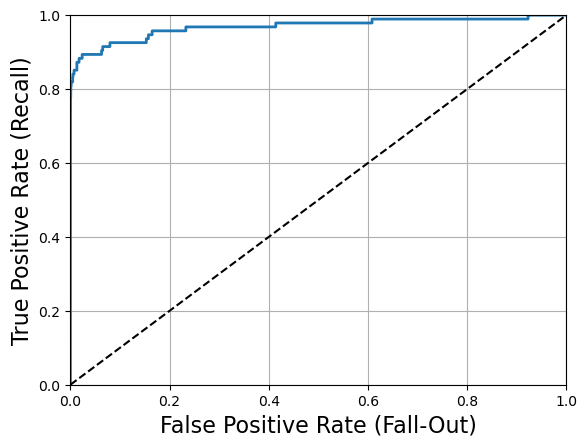

ROC AUC score: 0.9686105332500563

[[56648     3]
 [   28    66]]

============ xgbrf_clf ============
None
Coefficients are not defined for Booster type None
The xgbrf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9167    0.7021    0.7952        94

    accuracy                         0.9994     56745
   macro avg     0.9581    0.8510    0.8974     56745
weighted avg     0.9994    0.9994    0.9994     56745




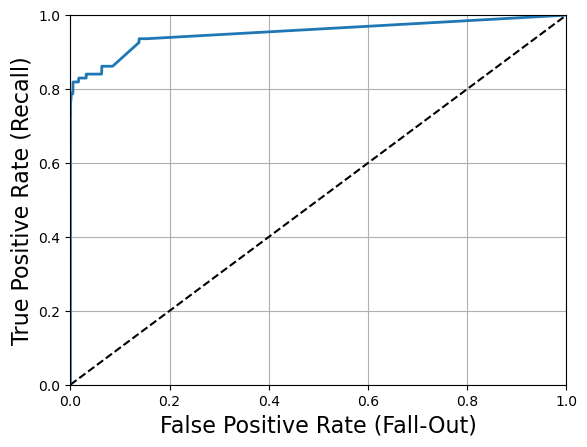

ROC AUC score: 0.9525569397096143

[[56645     6]
 [   28    66]]

Stored 'eval_dict_h' (dict)


In [105]:
eval_dict_h = model_tester(X_train_h, y_train_h, X_val_h, y_val_h)
%store eval_dict_h

In [106]:
eval_df_h = pd.DataFrame(data=eval_dict_h.values(), index=eval_dict_h.keys(),\
                       columns=['bal_acc_score','precisions', 'recalls', 'f1', 'false_positives', 'false_negatives', 'train_time', 'test_time'])
eval_df_h

bal_acc_score  precisions   recalls        f1  false_positives  \
rf_clf             0.856339    0.930556  0.712766  0.807229                5   
brf_clf            0.908880    0.057960  0.840426  0.108442             1284   
lr_clf             0.781835    0.854839  0.563830  0.679487                9   
svc_rbf_clf        0.803165    0.950000  0.606383  0.740260                3   
svc_ploy_clf       0.856330    0.917808  0.712766  0.802395                6   
knn_clf            0.851011    0.916667  0.702128  0.795181                6   
gnb_clf            0.864847    0.026740  0.776596  0.051700             2657   
ada_clf            0.829672    0.826667  0.659574  0.733728               13   
qda_clf            0.873514    0.041762  0.776596  0.079262             1675   
mlp_clf            0.872226    0.843373  0.744681  0.790960               13   
xgb_clf            0.851037    0.956522  0.702128  0.809816                3   
xgbrf_clf          0.851011    0.916667  0.702128  0.795181                6   

              false_negatives  train_time  test_time  
rf_clf                     27  104.129667   0.393090  
brf_clf                    15    2.944670   0.294067  
lr_clf                     41    1.409320   0.012003  
svc_rbf_clf                37  800.689473  10.681308  
svc_ploy_clf               27  130.122213   0.855195  
knn_clf                    28    0.052011   8.033829  
gnb_clf                    21    0.132030   0.049011  
ada_clf                    32   43.768269   0.476109  
qda_clf                    21    0.292066   0.081019  
mlp_clf                    24   23.081814   0.039009  
xgb_clf                    28    9.252697   0.048012  
xgbrf_clf                  28    9.803773   0.048010

# ________________
# $Amount$ as $log$

As distribution of $Amount$ is skewed we test whether transforming the variable with logaritmic function will have any positive effect on the models results.

 - $Time$ changed into categorical variable $hours$,
 - $Amount$  log transformed and scaled with MinMaxScaler(). 
 - labels was separated, no features dropped.


In [107]:
clean_train_log = DataCleaner(hour=True,feature_to_drop=['Amount'], labels=True, amount_scaler=scaler, amount_log = True)

In [108]:
X_train_log, y_train_log = clean_train_log.fit_transform(raw_train)

In [109]:
X_train_log.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'hour_24'],
      dtype='object')

In [110]:
X_val_log, y_val_log = clean_train_log.transform(raw_val)

In [111]:
X_val_log.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'hour_24'],
      dtype='object')

============ rf_clf ============
None
'RandomForestClassifier' object has no attribute 'coef_'
The rf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9315    0.7234    0.8144        94

    accuracy                         0.9995     56745
   macro avg     0.9655    0.8617    0.9070     56745
weighted avg     0.9994    0.9995    0.9994     56745




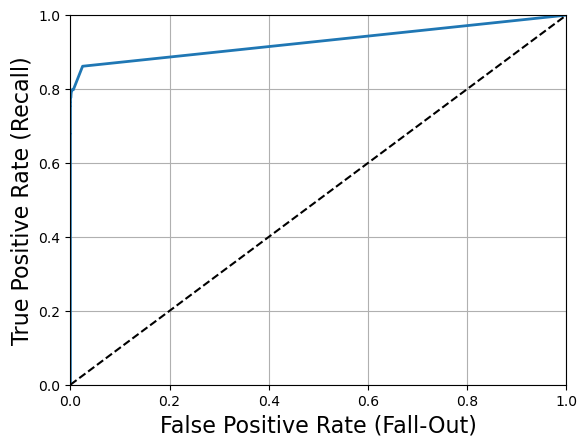

ROC AUC score: 0.92812815833564

[[56646     5]
 [   26    68]]

============ brf_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

None
'BalancedRandomForestClassifier' object has no attribute 'coef_'
The brf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9997    0.9749    0.9872     56651
           1     0.0527    0.8404    0.0992        94

    accuracy                         0.9747     56745
   macro avg     0.5262    0.9077    0.5432     56745
weighted avg     0.9982    0.9747    0.9857     56745




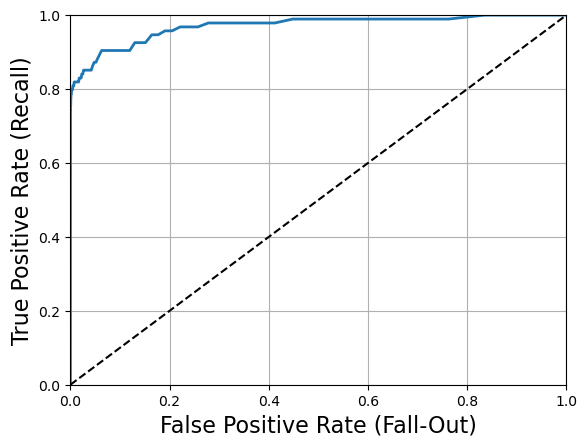

ROC AUC score: 0.9701239053450448

[[55231  1420]
 [   15    79]]

============ lr_clf ============
'LogisticRegression' object has no attribute 'feature_importances_'
The lr_clf model does not have a feature importance parameter
Per-column arrays must each be 1-dimensional
The lr_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9993    0.9999    0.9996     56651
           1     0.8689    0.5638    0.6839        94

    accuracy                         0.9991     56745
   macro avg     0.9341    0.7818    0.8417     56745
weighted avg     0.9991    0.9991    0.9990     56745




C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


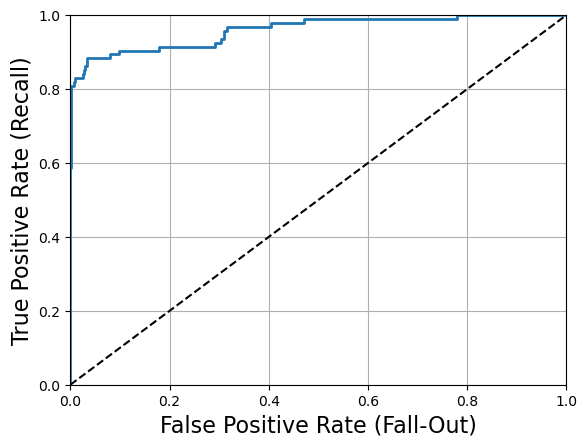

ROC AUC score: 0.9604190945907323

[[56643     8]
 [   41    53]]

============ svc_rbf_clf ============
'SVC' object has no attribute 'feature_importances_'
The svc_rbf_clf model does not have a feature importance parameter
coef_ is only available when using a linear kernel
The svc_rbf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9993    0.9999    0.9996     56651
           1     0.9500    0.6064    0.7403        94

    accuracy                         0.9993     56745
   macro avg     0.9747    0.8032    0.8700     56745
weighted avg     0.9993    0.9993    0.9992     56745




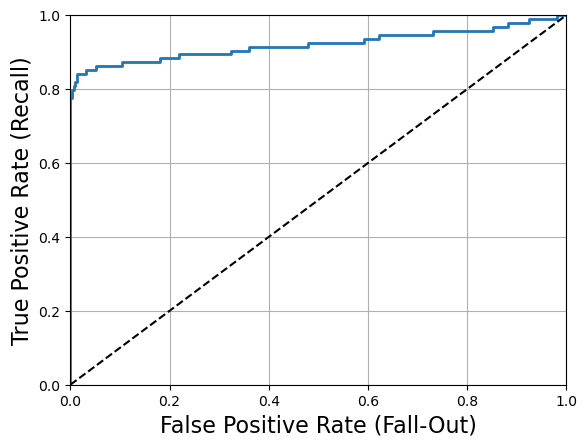

ROC AUC score: 0.9214015489388743

[[56648     3]
 [   37    57]]

============ svc_ploy_clf ============
'SVC' object has no attribute 'feature_importances_'
The svc_ploy_clf model does not have a feature importance parameter
coef_ is only available when using a linear kernel
The svc_ploy_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9178    0.7128    0.8024        94

    accuracy                         0.9994     56745
   macro avg     0.9587    0.8563    0.9011     56745
weighted avg     0.9994    0.9994    0.9994     56745




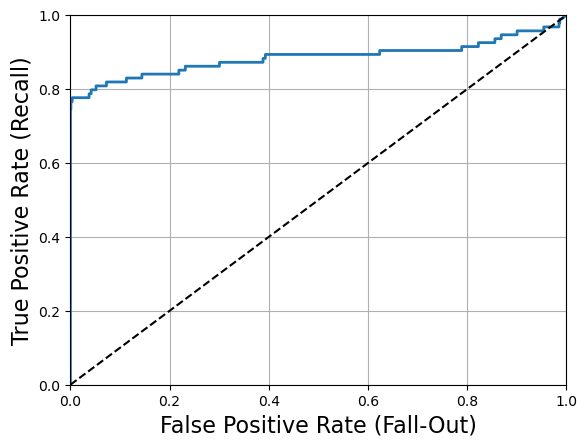

ROC AUC score: 0.885304084696257

[[56645     6]
 [   27    67]]

============ knn_clf ============
'KNeighborsClassifier' object has no attribute 'feature_importances_'
The knn_clf model does not have a feature importance parameter
'KNeighborsClassifier' object has no attribute 'coef_'
The knn_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9167    0.7021    0.7952        94

    accuracy                         0.9994     56745
   macro avg     0.9581    0.8510    0.8974     56745
weighted avg     0.9994    0.9994    0.9994     56745




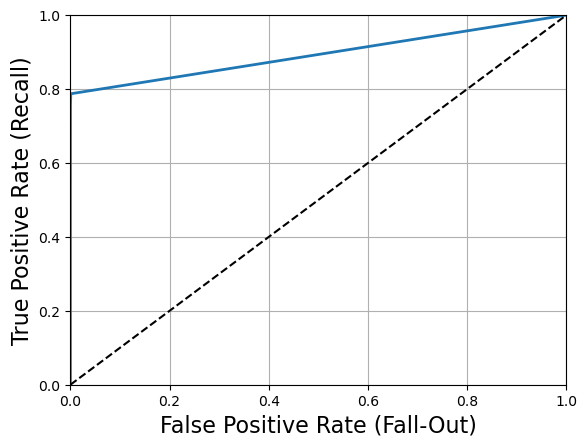

ROC AUC score: 0.8934950538891164

[[56645     6]
 [   28    66]]

============ gnb_clf ============
'GaussianNB' object has no attribute 'feature_importances_'
The gnb_clf model does not have a feature importance parameter
'GaussianNB' object has no attribute 'coef_'
The gnb_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9527    0.9756     56651
           1     0.0265    0.7766    0.0512        94

    accuracy                         0.9524     56745
   macro avg     0.5131    0.8646    0.5134     56745
weighted avg     0.9980    0.9524    0.9740     56745




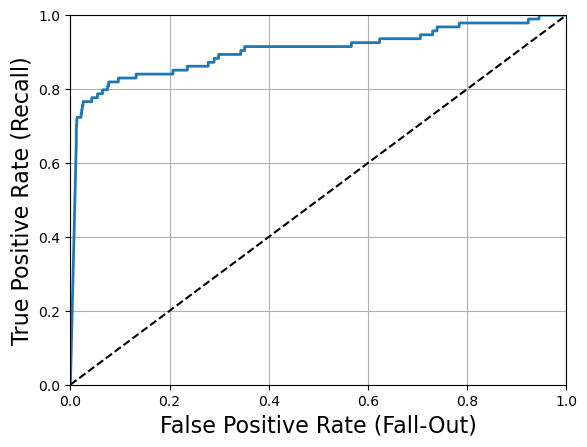

ROC AUC score: 0.9031712271890938

[[53969  2682]
 [   21    73]]

============ ada_clf ============
None
'AdaBoostClassifier' object has no attribute 'coef_'
The ada_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9998    0.9997     56651
           1     0.8571    0.7021    0.7719        94

    accuracy                         0.9993     56745
   macro avg     0.9283    0.8510    0.8858     56745
weighted avg     0.9993    0.9993    0.9993     56745




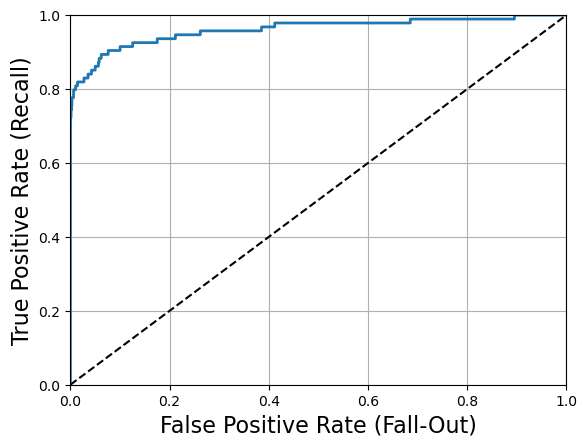

ROC AUC score: 0.9604906412799233

[[56640    11]
 [   28    66]]

============ qda_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


'QuadraticDiscriminantAnalysis' object has no attribute 'feature_importances_'
The qda_clf model does not have a feature importance parameter
'QuadraticDiscriminantAnalysis' object has no attribute 'coef_'
The qda_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9610    0.9799     56651
           1     0.0320    0.7766    0.0614        94

    accuracy                         0.9607     56745
   macro avg     0.5158    0.8688    0.5207     56745
weighted avg     0.9980    0.9607    0.9784     56745




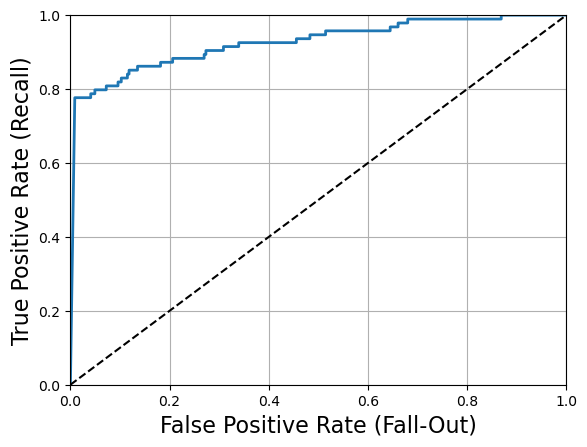

ROC AUC score: 0.9261976183402896

[[54441  2210]
 [   21    73]]

============ mlp_clf ============
'MLPClassifier' object has no attribute 'feature_importances_'
The mlp_clf model does not have a feature importance parameter
'MLPClassifier' object has no attribute 'coef_'
The mlp_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56651
           1     0.8861    0.7447    0.8092        94

    accuracy                         0.9994     56745
   macro avg     0.9428    0.8723    0.9045     56745
weighted avg     0.9994    0.9994    0.9994     56745




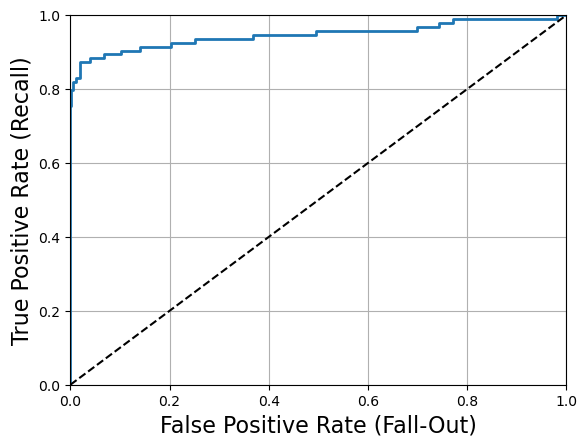

ROC AUC score: 0.947151972303732

[[56642     9]
 [   24    70]]

============ xgb_clf ============
None
Coefficients are not defined for Booster type None
The xgb_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9559    0.6915    0.8025        94

    accuracy                         0.9994     56745
   macro avg     0.9777    0.8457    0.9011     56745
weighted avg     0.9994    0.9994    0.9994     56745




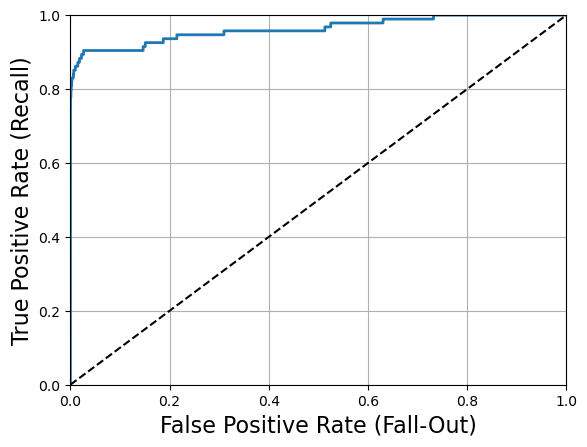

ROC AUC score: 0.9624929157510506

[[56648     3]
 [   29    65]]

============ xgbrf_clf ============
None
Coefficients are not defined for Booster type None
The xgbrf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9167    0.7021    0.7952        94

    accuracy                         0.9994     56745
   macro avg     0.9581    0.8510    0.8974     56745
weighted avg     0.9994    0.9994    0.9994     56745




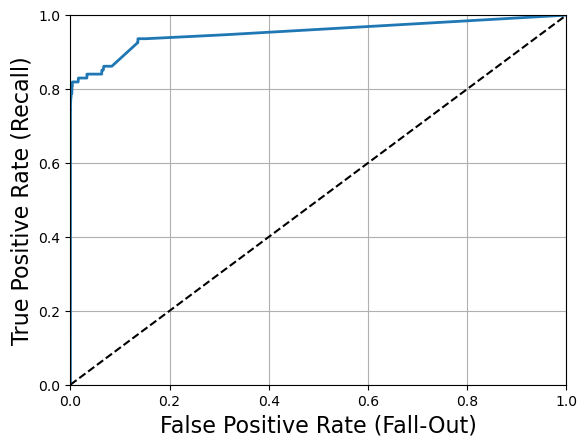

ROC AUC score: 0.9521761085136052

[[56645     6]
 [   28    66]]

Stored 'eval_dict_log' (dict)


In [112]:
eval_dict_log = model_tester(X_train_log, y_train_log, X_val_log, y_val_log)
%store eval_dict_log

In [113]:
eval_df_log = pd.DataFrame(data=eval_dict_log.values(), index=eval_dict_log.keys(),\
                       columns=['bal_acc_score','precisions', 'recalls', 'f1', 'false_positives', 'false_negatives', 'train_time', 'test_time'])
eval_df_log

bal_acc_score  precisions   recalls        f1  false_positives  \
rf_clf             0.861658    0.931507  0.723404  0.814371                5   
brf_clf            0.907680    0.052702  0.840426  0.099184             1420   
lr_clf             0.781844    0.868852  0.563830  0.683871                8   
svc_rbf_clf        0.803165    0.950000  0.606383  0.740260                3   
svc_ploy_clf       0.856330    0.917808  0.712766  0.802395                6   
knn_clf            0.851011    0.916667  0.702128  0.795181                6   
gnb_clf            0.864627    0.026497  0.776596  0.051246             2682   
ada_clf            0.850967    0.857143  0.702128  0.771930               11   
qda_clf            0.868792    0.031975  0.776596  0.061422             2210   
mlp_clf            0.872261    0.886076  0.744681  0.809249                9   
xgb_clf            0.845718    0.955882  0.691489  0.802469                3   
xgbrf_clf          0.851011    0.916667  0.702128  0.795181                6   

              false_negatives  train_time  test_time  
rf_clf                     26  104.995391   0.384087  
brf_clf                    15    2.871656   0.289068  
lr_clf                     41    1.384315   0.010002  
svc_rbf_clf                37  807.981282  10.498952  
svc_ploy_clf               27  127.365183   0.778177  
knn_clf                    28    0.050011   7.581872  
gnb_clf                    21    0.132030   0.049011  
ada_clf                    28   43.100887   0.501114  
qda_clf                    21    0.277062   0.074018  
mlp_clf                    24   16.091862   0.038009  
xgb_clf                    29    8.577478   0.031007  
xgbrf_clf                  28    9.458705   0.040009

# _____________________
# Dataset testing: Time scaled → MinMax, Amount scaled → Robust

In [114]:
amount_scaler = RobustScaler()
time_scaler = MinMaxScaler(feature_range=(0,1))

In [115]:
clean_train_r = DataCleaner(hour=False, feature_to_drop=[], labels=True, amount_scaler=amount_scaler, time_scaler=time_scaler)

In [116]:
X_train_time_amt_robust, y_train = clean_train_r.fit_transform(raw_train)

In [117]:
X_val_time_amt_robust, y_val = clean_train_r.transform(raw_val)

============ rf_clf ============
None
'RandomForestClassifier' object has no attribute 'coef_'
The rf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9997     56651
           1     0.9324    0.7340    0.8214        94

    accuracy                         0.9995     56745
   macro avg     0.9660    0.8670    0.9106     56745
weighted avg     0.9994    0.9995    0.9994     56745




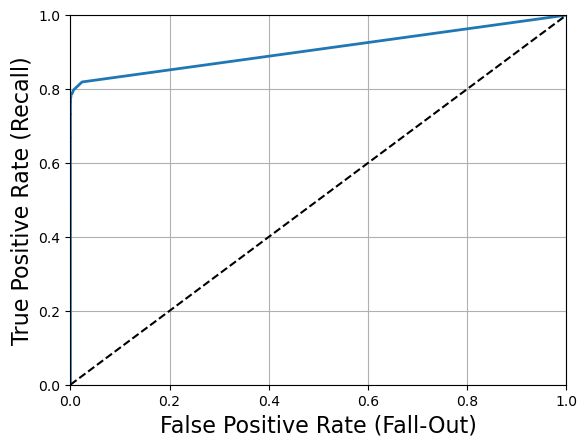

ROC AUC score: 0.9070440438414075

[[56646     5]
 [   25    69]]

============ brf_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

None
'BalancedRandomForestClassifier' object has no attribute 'coef_'
The brf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9997    0.9748    0.9871     56651
           1     0.0525    0.8404    0.0989        94

    accuracy                         0.9746     56745
   macro avg     0.5261    0.9076    0.5430     56745
weighted avg     0.9982    0.9746    0.9857     56745




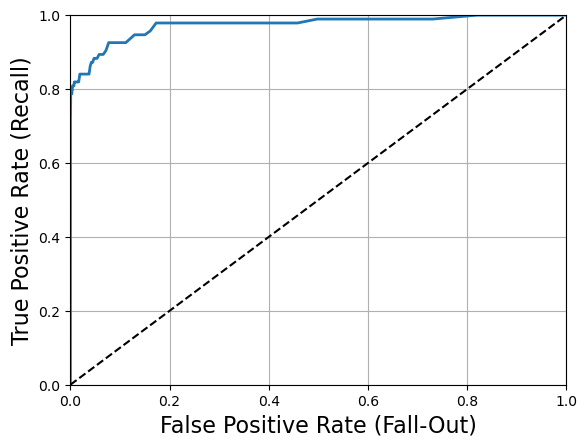

ROC AUC score: 0.9736021823805856

[[55226  1425]
 [   15    79]]

============ lr_clf ============
'LogisticRegression' object has no attribute 'feature_importances_'
The lr_clf model does not have a feature importance parameter
Per-column arrays must each be 1-dimensional
The lr_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9992    0.9999    0.9995     56651
           1     0.8621    0.5319    0.6579        94

    accuracy                         0.9991     56745
   macro avg     0.9306    0.7659    0.8287     56745
weighted avg     0.9990    0.9991    0.9990     56745




C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


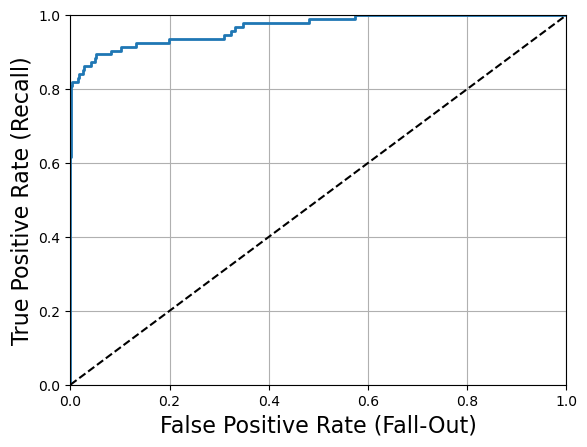

ROC AUC score: 0.9667351086176392

[[56643     8]
 [   44    50]]

============ svc_rbf_clf ============
'SVC' object has no attribute 'feature_importances_'
The svc_rbf_clf model does not have a feature importance parameter
coef_ is only available when using a linear kernel
The svc_rbf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9994    0.9999    0.9997     56651
           1     0.9524    0.6383    0.7643        94

    accuracy                         0.9993     56745
   macro avg     0.9759    0.8191    0.8820     56745
weighted avg     0.9993    0.9993    0.9993     56745




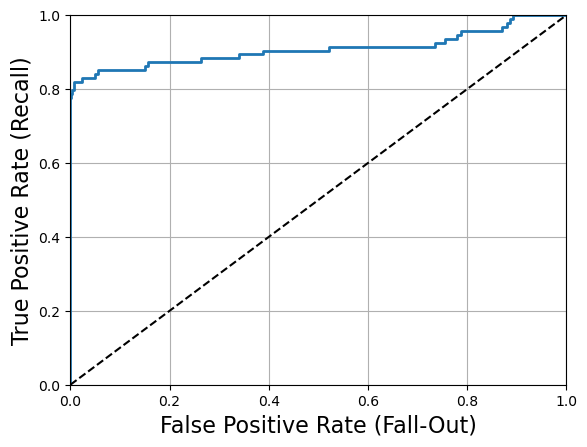

ROC AUC score: 0.9090051930502439

[[56648     3]
 [   34    60]]

============ svc_ploy_clf ============
'SVC' object has no attribute 'feature_importances_'
The svc_ploy_clf model does not have a feature importance parameter
coef_ is only available when using a linear kernel
The svc_ploy_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9420    0.6915    0.7975        94

    accuracy                         0.9994     56745
   macro avg     0.9708    0.8457    0.8986     56745
weighted avg     0.9994    0.9994    0.9994     56745




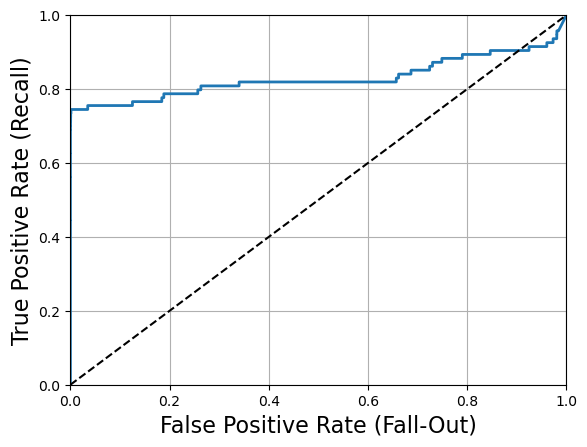

ROC AUC score: 0.8294770106028062

[[56647     4]
 [   29    65]]

============ knn_clf ============
'KNeighborsClassifier' object has no attribute 'feature_importances_'
The knn_clf model does not have a feature importance parameter
'KNeighborsClassifier' object has no attribute 'coef_'
The knn_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9429    0.7021    0.8049        94

    accuracy                         0.9994     56745
   macro avg     0.9712    0.8510    0.9023     56745
weighted avg     0.9994    0.9994    0.9994     56745




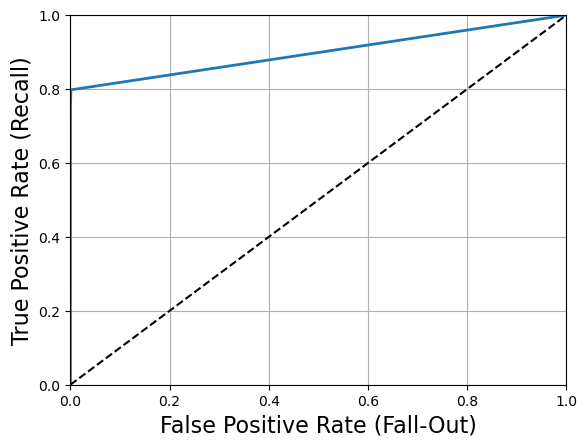

ROC AUC score: 0.8988019028039167

[[56647     4]
 [   28    66]]

============ gnb_clf ============
'GaussianNB' object has no attribute 'feature_importances_'
The gnb_clf model does not have a feature importance parameter
'GaussianNB' object has no attribute 'coef_'
The gnb_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9788    0.9891     56651
           1     0.0580    0.7872    0.1081        94

    accuracy                         0.9785     56745
   macro avg     0.5288    0.8830    0.5486     56745
weighted avg     0.9981    0.9785    0.9877     56745




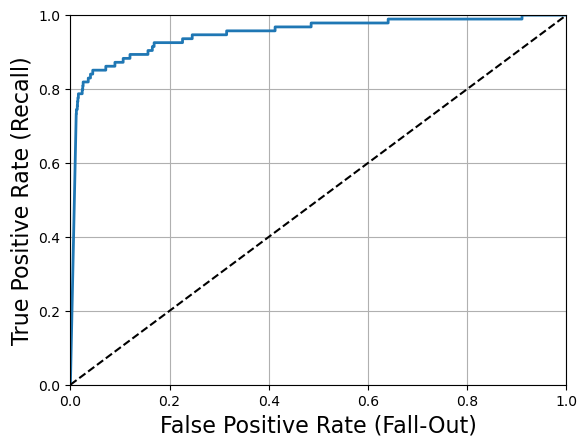

ROC AUC score: 0.9490815733661535

[[55450  1201]
 [   20    74]]

============ ada_clf ============
None
'AdaBoostClassifier' object has no attribute 'coef_'
The ada_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56651
           1     0.8493    0.6596    0.7425        94

    accuracy                         0.9992     56745
   macro avg     0.9244    0.8297    0.8711     56745
weighted avg     0.9992    0.9992    0.9992     56745




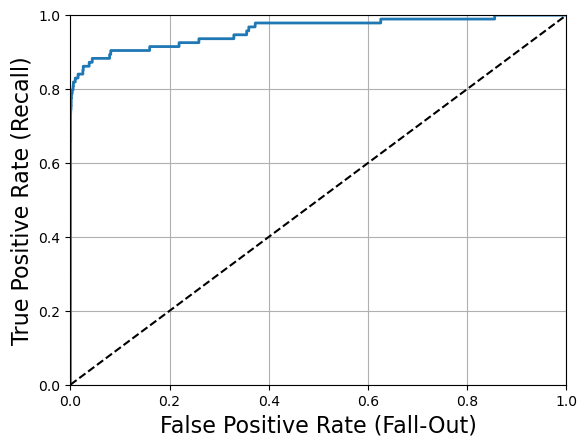

ROC AUC score: 0.9586892984556055

[[56640    11]
 [   32    62]]

============ qda_clf ============
'QuadraticDiscriminantAnalysis' object has no attribute 'feature_importances_'
The qda_clf model does not have a feature importance parameter
'QuadraticDiscriminantAnalysis' object has no attribute 'coef_'
The qda_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9997    0.9762    0.9878     56651
           1     0.0534    0.8085    0.1001        94

    accuracy                         0.9759     56745
   macro avg     0.5265    0.8924    0.5440     56745
weighted avg     0.9981    0.9759    0.9863     56745




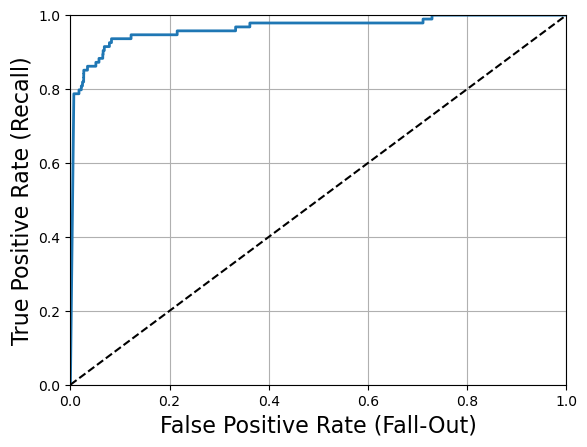

ROC AUC score: 0.9640726704041205

[[55303  1348]
 [   18    76]]

============ mlp_clf ============
'MLPClassifier' object has no attribute 'feature_importances_'
The mlp_clf model does not have a feature importance parameter
'MLPClassifier' object has no attribute 'coef_'
The mlp_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9993    0.9999    0.9996     56651
           1     0.9167    0.5851    0.7143        94

    accuracy                         0.9992     56745
   macro avg     0.9580    0.7925    0.8569     56745
weighted avg     0.9992    0.9992    0.9991     56745




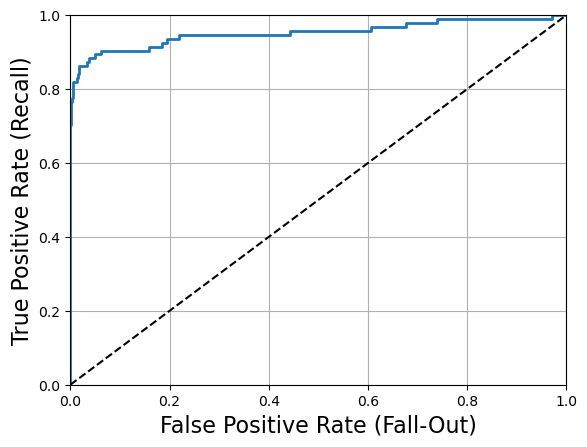

ROC AUC score: 0.95243027765749

[[56646     5]
 [   39    55]]

============ xgb_clf ============
None
Coefficients are not defined for Booster type None
The xgb_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9565    0.7021    0.8098        94

    accuracy                         0.9995     56745
   macro avg     0.9780    0.8510    0.9048     56745
weighted avg     0.9994    0.9995    0.9994     56745




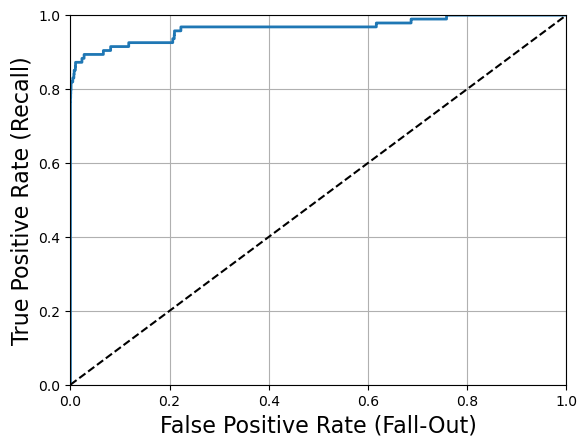

ROC AUC score: 0.9651948830408807

[[56648     3]
 [   28    66]]

============ xgbrf_clf ============
None
Coefficients are not defined for Booster type None
The xgbrf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9296    0.7021    0.8000        94

    accuracy                         0.9994     56745
   macro avg     0.9645    0.8510    0.8999     56745
weighted avg     0.9994    0.9994    0.9994     56745




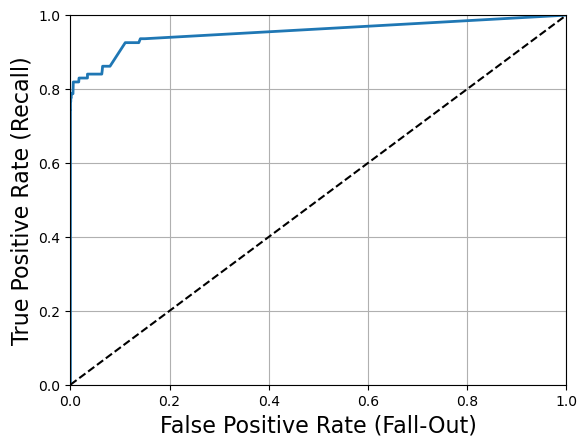

ROC AUC score: 0.9535932399833695

[[56646     5]
 [   28    66]]

Stored 'eval_dict_time' (dict)


In [118]:
eval_dict_time = model_tester(X_train_time_amt_robust, y_train, X_val_time_amt_robust, y_val)
%store eval_dict_time

In [119]:
eval_df_time = pd.DataFrame(data=eval_dict_time.values(), index=eval_dict_time.keys(),\
                       columns=['bal_acc_score','precisions', 'recalls', 'f1', 'false_positives', 'false_negatives', 'train_time', 'test_time'])
eval_df_time

bal_acc_score  precisions   recalls        f1  false_positives  \
rf_clf             0.866977    0.932432  0.734043  0.821429                5   
brf_clf            0.907636    0.052527  0.840426  0.098874             1425   
lr_clf             0.765887    0.862069  0.531915  0.657895                8   
svc_rbf_clf        0.819122    0.952381  0.638298  0.764331                3   
svc_ploy_clf       0.845709    0.942029  0.691489  0.797546                4   
knn_clf            0.851029    0.942857  0.702128  0.804878                4   
gnb_clf            0.883017    0.058039  0.787234  0.108108             1201   
ada_clf            0.829690    0.849315  0.659574  0.742515               11   
qda_clf            0.892358    0.053371  0.808511  0.100132             1348   
mlp_clf            0.792509    0.916667  0.585106  0.714286                5   
xgb_clf            0.851037    0.956522  0.702128  0.809816                3   
xgbrf_clf          0.851020    0.929577  0.702128  0.800000                5   

              false_negatives  train_time  test_time  
rf_clf                     25  126.190460   0.354179  
brf_clf                    15    2.928667   0.267061  
lr_clf                     44    1.003228   0.005001  
svc_rbf_clf                34  618.187804   9.199094  
svc_ploy_clf               29   59.215853   0.514117  
knn_clf                    28    0.024005   6.444467  
gnb_clf                    20    0.075017   0.026006  
ada_clf                    32   43.085224   0.362083  
qda_clf                    18    0.175040   0.033007  
mlp_clf                    39   14.040724   0.030006  
xgb_clf                    28    7.778470   0.018003  
xgbrf_clf                  28    9.240103   0.020005

# ___________________________
# Dataset testing: Hours, Amount scaled → Robust

In [120]:
amount_scaler = RobustScaler()
clean_train_hour = DataCleaner(hour=True, feature_to_drop=[], labels=True, \
                          amount_scaler=amount_scaler, time_scaler=None)

In [121]:
X_train_hour_amt_robust, y_train = clean_train_hour.fit_transform(raw_train)

In [122]:
X_train_hour_amt_robust.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'hour_24'],
      dtype='object')

In [123]:
X_val_hour_amt_robust, y_val = clean_train_hour.transform(raw_val)

============ rf_clf ============
None
'RandomForestClassifier' object has no attribute 'coef_'
The rf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9306    0.7128    0.8072        94

    accuracy                         0.9994     56745
   macro avg     0.9650    0.8563    0.9035     56745
weighted avg     0.9994    0.9994    0.9994     56745




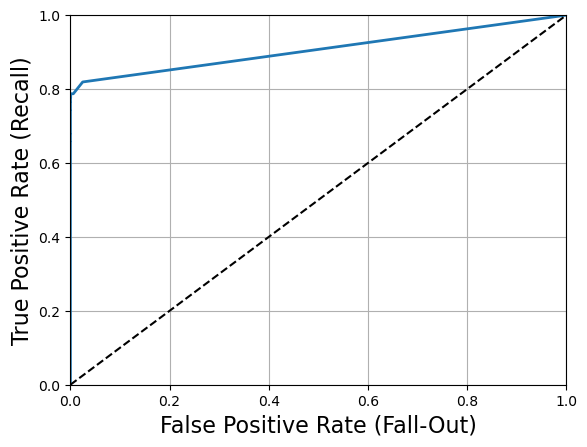

ROC AUC score: 0.9068195449780796

[[56646     5]
 [   27    67]]

============ brf_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

None
'BalancedRandomForestClassifier' object has no attribute 'coef_'
The brf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9997    0.9781    0.9888     56651
           1     0.0598    0.8404    0.1117        94

    accuracy                         0.9778     56745
   macro avg     0.5298    0.9093    0.5502     56745
weighted avg     0.9982    0.9778    0.9873     56745




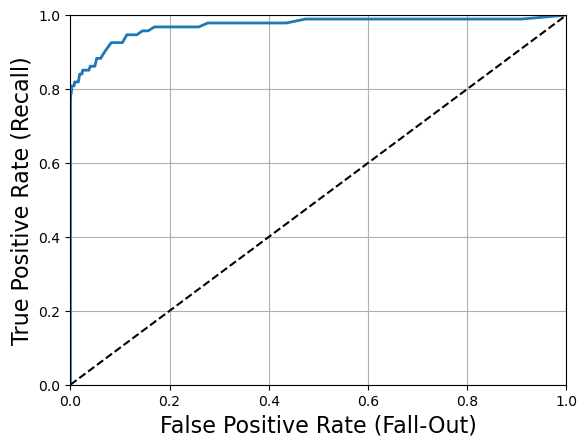

ROC AUC score: 0.9712586057897609

[[55409  1242]
 [   15    79]]

============ lr_clf ============
'LogisticRegression' object has no attribute 'feature_importances_'
The lr_clf model does not have a feature importance parameter
Per-column arrays must each be 1-dimensional
The lr_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     56651
           1     0.8548    0.5638    0.6795        94

    accuracy                         0.9991     56745
   macro avg     0.9271    0.7818    0.8395     56745
weighted avg     0.9990    0.9991    0.9990     56745




C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


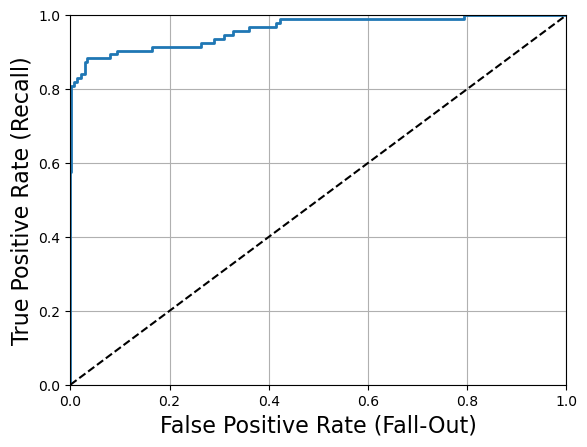

ROC AUC score: 0.9607188019816744

[[56642     9]
 [   41    53]]

============ svc_rbf_clf ============
'SVC' object has no attribute 'feature_importances_'
The svc_rbf_clf model does not have a feature importance parameter
coef_ is only available when using a linear kernel
The svc_rbf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9994    0.9999    0.9997     56651
           1     0.9524    0.6383    0.7643        94

    accuracy                         0.9993     56745
   macro avg     0.9759    0.8191    0.8820     56745
weighted avg     0.9993    0.9993    0.9993     56745




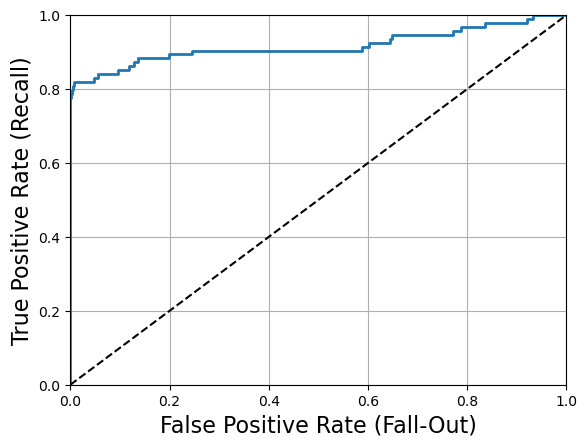

ROC AUC score: 0.917305360142748

[[56648     3]
 [   34    60]]

============ svc_ploy_clf ============
'SVC' object has no attribute 'feature_importances_'
The svc_ploy_clf model does not have a feature importance parameter
coef_ is only available when using a linear kernel
The svc_ploy_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9306    0.7128    0.8072        94

    accuracy                         0.9994     56745
   macro avg     0.9650    0.8563    0.9035     56745
weighted avg     0.9994    0.9994    0.9994     56745




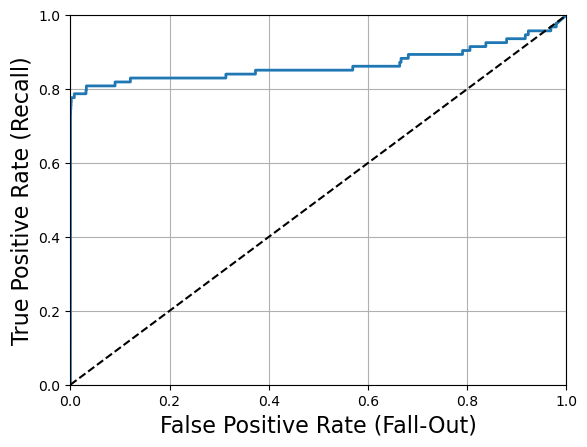

ROC AUC score: 0.8655386076075351

[[56646     5]
 [   27    67]]

============ knn_clf ============
'KNeighborsClassifier' object has no attribute 'feature_importances_'
The knn_clf model does not have a feature importance parameter
'KNeighborsClassifier' object has no attribute 'coef_'
The knn_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9296    0.7021    0.8000        94

    accuracy                         0.9994     56745
   macro avg     0.9645    0.8510    0.8999     56745
weighted avg     0.9994    0.9994    0.9994     56745




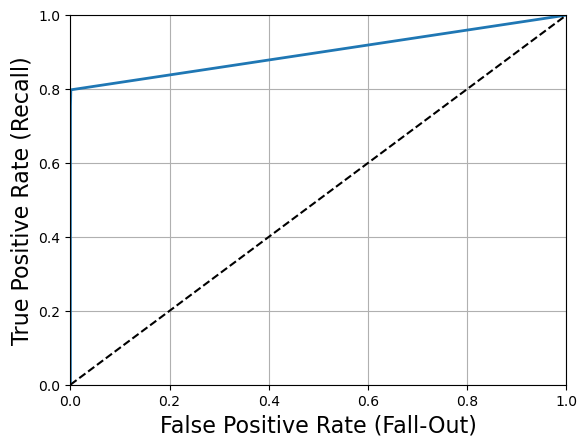

ROC AUC score: 0.898807160828319

[[56646     5]
 [   28    66]]

============ gnb_clf ============
'GaussianNB' object has no attribute 'feature_importances_'
The gnb_clf model does not have a feature importance parameter
'GaussianNB' object has no attribute 'coef_'
The gnb_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9531    0.9758     56651
           1     0.0267    0.7766    0.0517        94

    accuracy                         0.9528     56745
   macro avg     0.5132    0.8648    0.5138     56745
weighted avg     0.9980    0.9528    0.9743     56745




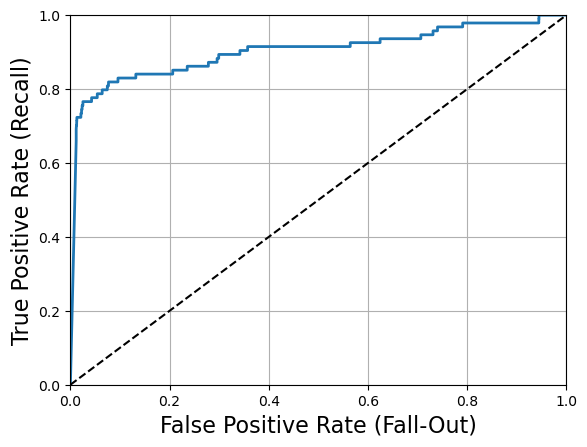

ROC AUC score: 0.902902974051274

[[53994  2657]
 [   21    73]]

============ ada_clf ============
None
'AdaBoostClassifier' object has no attribute 'coef_'
The ada_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56651
           1     0.8267    0.6596    0.7337        94

    accuracy                         0.9992     56745
   macro avg     0.9131    0.8297    0.8667     56745
weighted avg     0.9991    0.9992    0.9992     56745




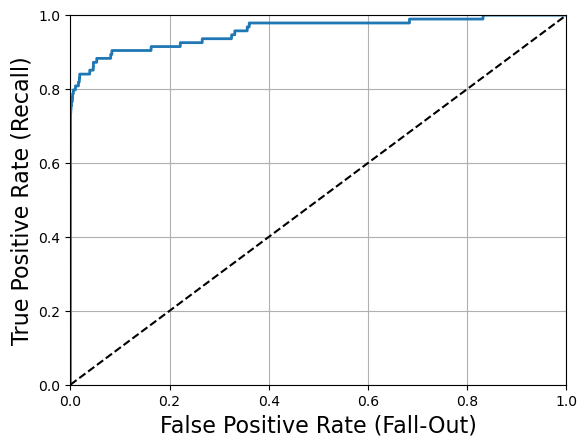

ROC AUC score: 0.9576944990173129

[[56638    13]
 [   32    62]]

============ qda_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


'QuadraticDiscriminantAnalysis' object has no attribute 'feature_importances_'
The qda_clf model does not have a feature importance parameter
'QuadraticDiscriminantAnalysis' object has no attribute 'coef_'
The qda_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9651    0.9821     56651
           1     0.0361    0.7872    0.0691        94

    accuracy                         0.9648     56745
   macro avg     0.5179    0.8762    0.5256     56745
weighted avg     0.9980    0.9648    0.9806     56745




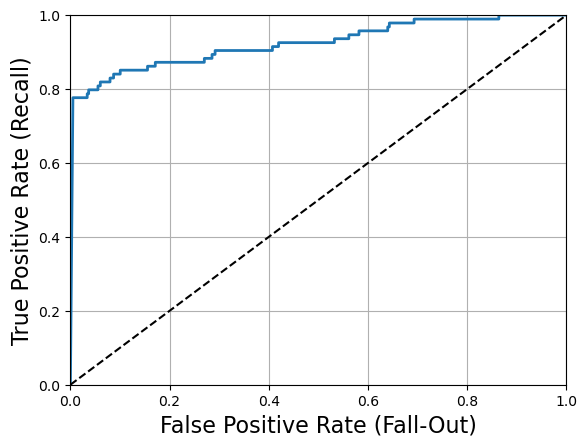

ROC AUC score: 0.923967558740583

[[54676  1975]
 [   20    74]]

============ mlp_clf ============
'MLPClassifier' object has no attribute 'feature_importances_'
The mlp_clf model does not have a feature importance parameter
'MLPClassifier' object has no attribute 'coef_'
The mlp_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56651
           1     0.8519    0.7340    0.7886        94

    accuracy                         0.9993     56745
   macro avg     0.9257    0.8669    0.8941     56745
weighted avg     0.9993    0.9993    0.9993     56745




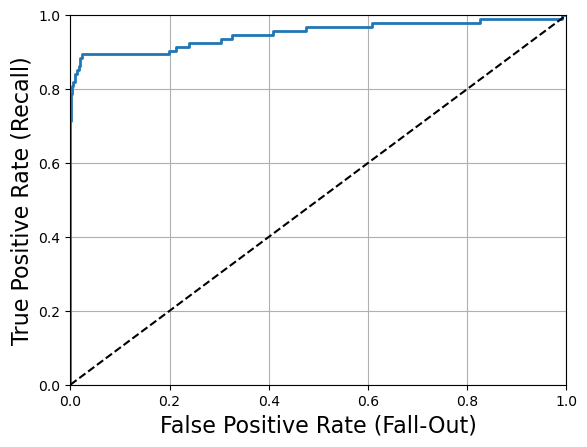

ROC AUC score: 0.9498399494929198

[[56639    12]
 [   25    69]]

============ xgb_clf ============
None
Coefficients are not defined for Booster type None
The xgb_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9565    0.7021    0.8098        94

    accuracy                         0.9995     56745
   macro avg     0.9780    0.8510    0.9048     56745
weighted avg     0.9994    0.9995    0.9994     56745




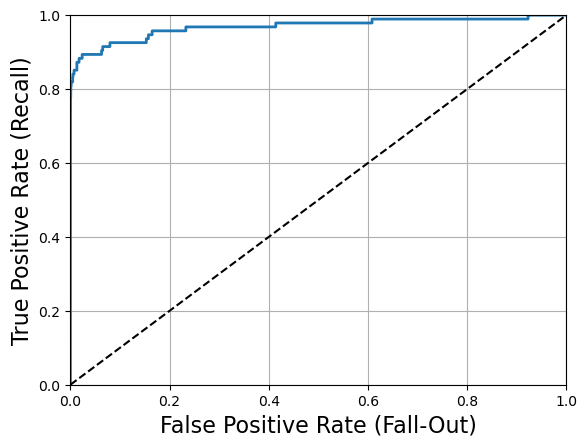

ROC AUC score: 0.9686105332500563

[[56648     3]
 [   28    66]]

============ xgbrf_clf ============
None
Coefficients are not defined for Booster type None
The xgbrf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9167    0.7021    0.7952        94

    accuracy                         0.9994     56745
   macro avg     0.9581    0.8510    0.8974     56745
weighted avg     0.9994    0.9994    0.9994     56745




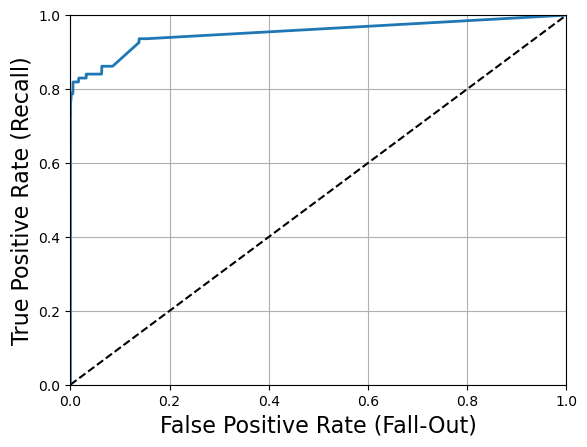

ROC AUC score: 0.9525569397096143

[[56645     6]
 [   28    66]]

Stored 'eval_dict_rob' (dict)


In [124]:
eval_dict_rob = model_tester(X_train_hour_amt_robust, y_train, X_val_hour_amt_robust, y_val)
%store eval_dict_rob

In [125]:
eval_df_rob = pd.DataFrame(data=eval_dict_rob.values(), index=eval_dict_rob.keys(),\
                       columns=['bal_acc_score','precisions', 'recalls', 'f1', 'false_positives', 'false_negatives', 'train_time', 'test_time'])
eval_df_rob

bal_acc_score  precisions   recalls        f1  false_positives  \
rf_clf             0.856339    0.930556  0.712766  0.807229                5   
brf_clf            0.909251    0.059803  0.840426  0.111661             1242   
lr_clf             0.781835    0.854839  0.563830  0.679487                9   
svc_rbf_clf        0.819122    0.952381  0.638298  0.764331                3   
svc_ploy_clf       0.856339    0.930556  0.712766  0.807229                5   
knn_clf            0.851020    0.929577  0.702128  0.800000                5   
gnb_clf            0.864847    0.026740  0.776596  0.051700             2657   
ada_clf            0.829672    0.826667  0.659574  0.733728               13   
qda_clf            0.876186    0.036115  0.787234  0.069062             1975   
mlp_clf            0.866915    0.851852  0.734043  0.788571               12   
xgb_clf            0.851037    0.956522  0.702128  0.809816                3   
xgbrf_clf          0.851011    0.916667  0.702128  0.795181                6   

              false_negatives  train_time  test_time  
rf_clf                     27  103.454639   0.376086  
brf_clf                    15    2.817191   0.291066  
lr_clf                     41    1.382315   0.010003  
svc_rbf_clf                34  938.126299   9.068755  
svc_ploy_clf               27   86.220142   0.726166  
knn_clf                    28    0.050011   7.733406  
gnb_clf                    21    0.134031   0.050011  
ada_clf                    32   43.827296   0.514117  
qda_clf                    20    0.285064   0.075018  
mlp_clf                    25   17.746139   0.038009  
xgb_clf                    28    8.621114   0.043010  
xgbrf_clf                  28    9.559225   0.041010

# _________________________
# Dataset testing: Hours, Amount scaled → Robust, Log

In [126]:
amount_scaler = RobustScaler()
clean_train_hour_log = DataCleaner(hour=True, feature_to_drop=[], labels=True, \
                          amount_scaler=amount_scaler, time_scaler=None, amount_log=True)

In [127]:
X_train_hour_amt_robust_log, y_train = clean_train_hour_log.fit_transform(raw_train)

In [128]:
X_train_hour_amt_robust_log.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'hour_1',
       'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8',
       'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'hour_24'],
      dtype='object')

In [129]:
X_val_hour_amt_robust_log, y_val = clean_train_hour_log.transform(raw_val)

============ rf_clf ============
None
'RandomForestClassifier' object has no attribute 'coef_'
The rf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9997     56651
           1     0.9452    0.7340    0.8263        94

    accuracy                         0.9995     56745
   macro avg     0.9724    0.8670    0.9130     56745
weighted avg     0.9995    0.9995    0.9995     56745




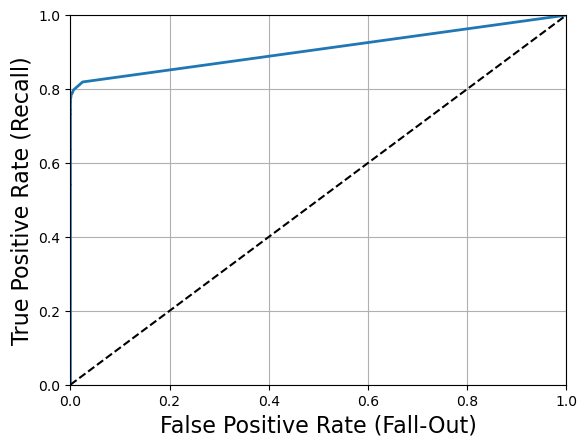

ROC AUC score: 0.9069352215149346

[[56647     4]
 [   25    69]]

============ brf_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

None
'BalancedRandomForestClassifier' object has no attribute 'coef_'
The brf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9997    0.9766    0.9880     56651
           1     0.0562    0.8404    0.1054        94

    accuracy                         0.9764     56745
   macro avg     0.5280    0.9085    0.5467     56745
weighted avg     0.9982    0.9764    0.9866     56745




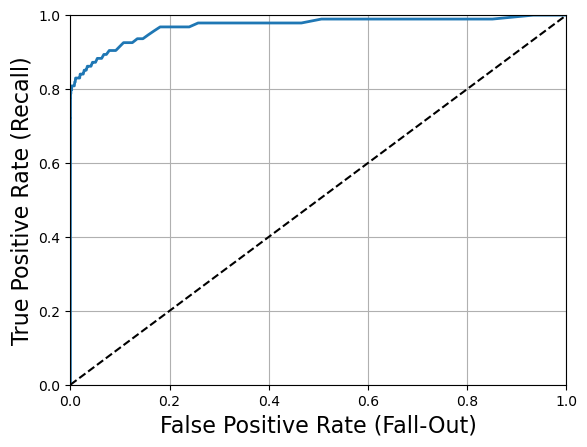

ROC AUC score: 0.9703484042083725

[[55325  1326]
 [   15    79]]

============ lr_clf ============
'LogisticRegression' object has no attribute 'feature_importances_'
The lr_clf model does not have a feature importance parameter
Per-column arrays must each be 1-dimensional
The lr_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     56651
           1     0.8438    0.5745    0.6835        94

    accuracy                         0.9991     56745
   macro avg     0.9215    0.7871    0.8416     56745
weighted avg     0.9990    0.9991    0.9990     56745




C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


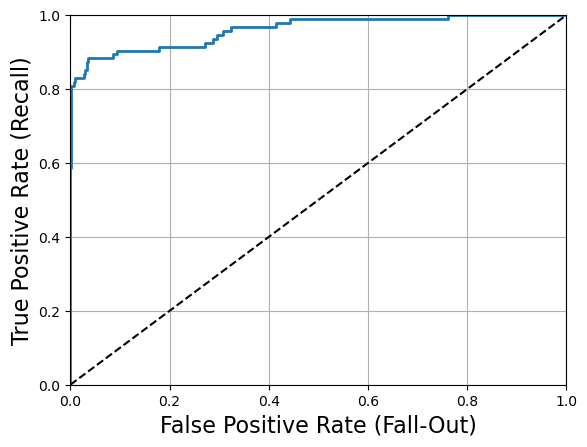

ROC AUC score: 0.9611071446411154

[[56641    10]
 [   40    54]]

============ svc_rbf_clf ============
'SVC' object has no attribute 'feature_importances_'
The svc_rbf_clf model does not have a feature importance parameter
coef_ is only available when using a linear kernel
The svc_rbf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9993    0.9999    0.9996     56651
           1     0.9500    0.6064    0.7403        94

    accuracy                         0.9993     56745
   macro avg     0.9747    0.8032    0.8700     56745
weighted avg     0.9993    0.9993    0.9992     56745




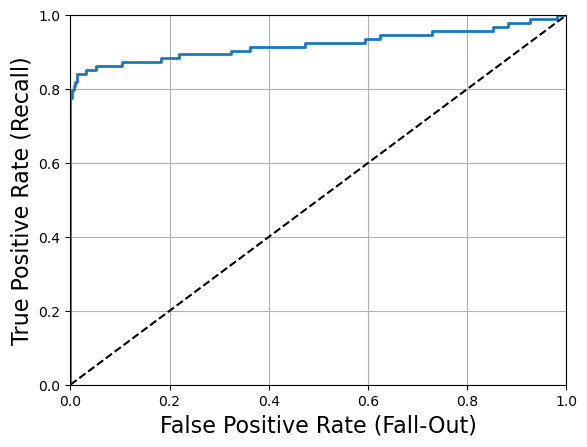

ROC AUC score: 0.9214167596523245

[[56648     3]
 [   37    57]]

============ svc_ploy_clf ============
'SVC' object has no attribute 'feature_importances_'
The svc_ploy_clf model does not have a feature importance parameter
coef_ is only available when using a linear kernel
The svc_ploy_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9178    0.7128    0.8024        94

    accuracy                         0.9994     56745
   macro avg     0.9587    0.8563    0.9011     56745
weighted avg     0.9994    0.9994    0.9994     56745




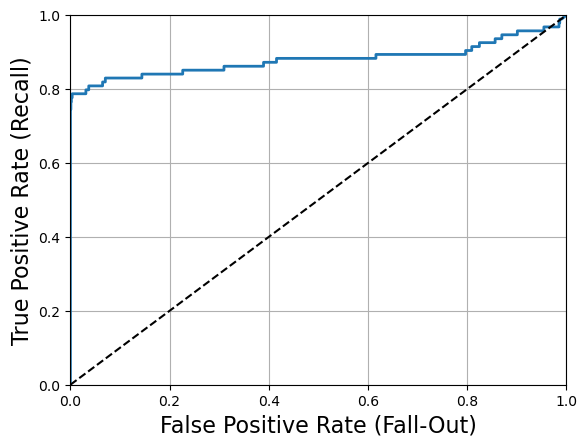

ROC AUC score: 0.8798609027201638

[[56645     6]
 [   27    67]]

============ knn_clf ============
'KNeighborsClassifier' object has no attribute 'feature_importances_'
The knn_clf model does not have a feature importance parameter
'KNeighborsClassifier' object has no attribute 'coef_'
The knn_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9167    0.7021    0.7952        94

    accuracy                         0.9994     56745
   macro avg     0.9581    0.8510    0.8974     56745
weighted avg     0.9994    0.9994    0.9994     56745




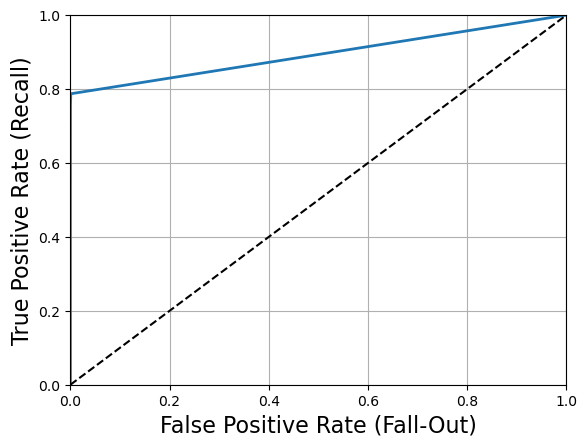

ROC AUC score: 0.8934950538891164

[[56645     6]
 [   28    66]]

============ gnb_clf ============
'GaussianNB' object has no attribute 'feature_importances_'
The gnb_clf model does not have a feature importance parameter
'GaussianNB' object has no attribute 'coef_'
The gnb_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9528    0.9756     56651
           1     0.0266    0.7766    0.0514        94

    accuracy                         0.9525     56745
   macro avg     0.5131    0.8647    0.5135     56745
weighted avg     0.9980    0.9525    0.9741     56745




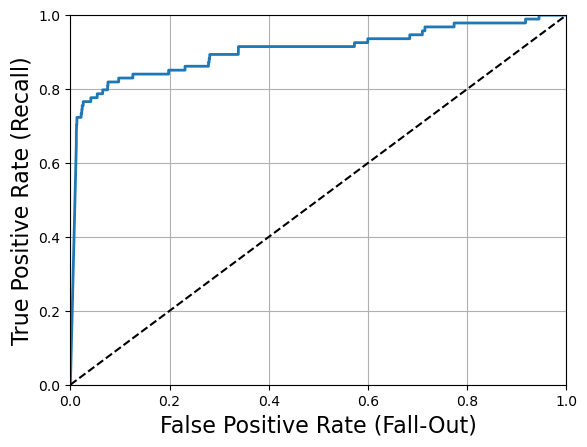

ROC AUC score: 0.9048874087967499

[[53976  2675]
 [   21    73]]

============ ada_clf ============
None
'AdaBoostClassifier' object has no attribute 'coef_'
The ada_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56651
           1     0.8267    0.6596    0.7337        94

    accuracy                         0.9992     56745
   macro avg     0.9131    0.8297    0.8667     56745
weighted avg     0.9991    0.9992    0.9992     56745




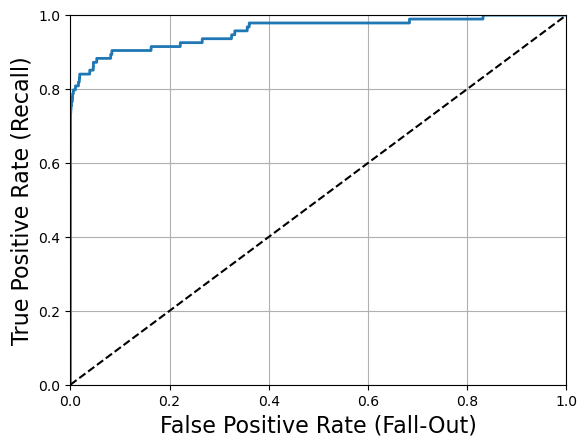

ROC AUC score: 0.9576944990173129

[[56638    13]
 [   32    62]]

============ qda_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


'QuadraticDiscriminantAnalysis' object has no attribute 'feature_importances_'
The qda_clf model does not have a feature importance parameter
'QuadraticDiscriminantAnalysis' object has no attribute 'coef_'
The qda_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9588    0.9788     56651
           1     0.0307    0.7872    0.0592        94

    accuracy                         0.9585     56745
   macro avg     0.5152    0.8730    0.5190     56745
weighted avg     0.9980    0.9585    0.9773     56745




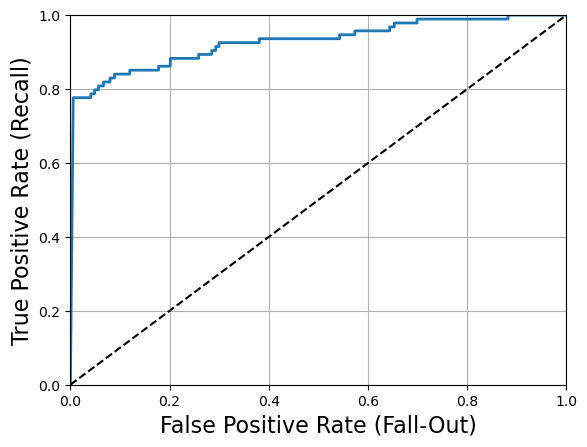

ROC AUC score: 0.92773014466703

[[54317  2334]
 [   20    74]]

============ mlp_clf ============
'MLPClassifier' object has no attribute 'feature_importances_'
The mlp_clf model does not have a feature importance parameter
'MLPClassifier' object has no attribute 'coef_'
The mlp_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56651
           1     0.8750    0.7447    0.8046        94

    accuracy                         0.9994     56745
   macro avg     0.9373    0.8723    0.9021     56745
weighted avg     0.9994    0.9994    0.9994     56745




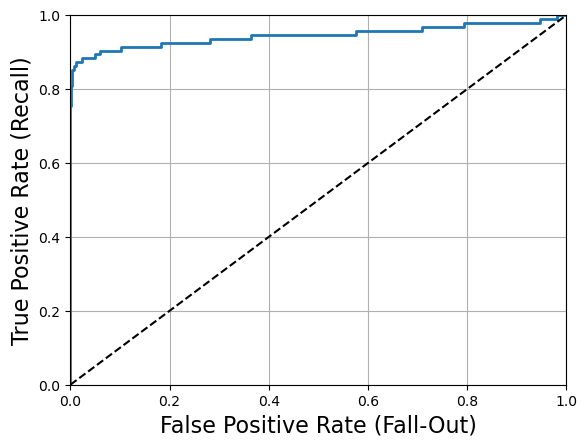

ROC AUC score: 0.9456470506051046

[[56641    10]
 [   24    70]]

============ xgb_clf ============
None
Coefficients are not defined for Booster type None
The xgb_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9565    0.7021    0.8098        94

    accuracy                         0.9995     56745
   macro avg     0.9780    0.8510    0.9048     56745
weighted avg     0.9994    0.9995    0.9994     56745




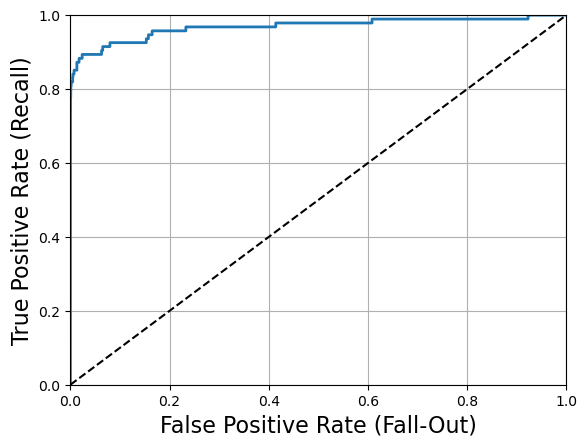

ROC AUC score: 0.9686105332500563

[[56648     3]
 [   28    66]]

============ xgbrf_clf ============
None
Coefficients are not defined for Booster type None
The xgbrf_clf model does not have a coef parameter
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9167    0.7021    0.7952        94

    accuracy                         0.9994     56745
   macro avg     0.9581    0.8510    0.8974     56745
weighted avg     0.9994    0.9994    0.9994     56745




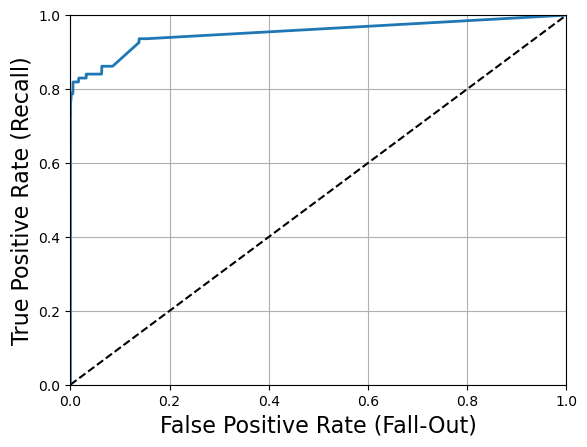

ROC AUC score: 0.9525569397096143

[[56645     6]
 [   28    66]]

Stored 'eval_dict_hours_log' (dict)


In [130]:
eval_dict_hours_log = model_tester(X_train_hour_amt_robust_log, y_train, X_val_hour_amt_robust_log, y_val)
%store eval_dict_hours_log

In [131]:
eval_df_hour_log = pd.DataFrame(data=eval_dict_hours_log.values(), index=eval_dict_hours_log.keys(),\
                       columns=['bal_acc_score','precisions', 'recalls', 'f1', 'false_positives', 'false_negatives', 'train_time', 'test_time'])
eval_df_hour_log

bal_acc_score  precisions   recalls        f1  false_positives  \
rf_clf             0.866986    0.945205  0.734043  0.826347                4   
brf_clf            0.908510    0.056228  0.840426  0.105404             1326   
lr_clf             0.787146    0.843750  0.574468  0.683544               10   
svc_rbf_clf        0.803165    0.950000  0.606383  0.740260                3   
svc_ploy_clf       0.856330    0.917808  0.712766  0.802395                6   
knn_clf            0.851011    0.916667  0.702128  0.795181                6   
gnb_clf            0.864688    0.026565  0.776596  0.051372             2675   
ada_clf            0.829672    0.826667  0.659574  0.733728               13   
qda_clf            0.873017    0.030731  0.787234  0.059153             2334   
mlp_clf            0.872252    0.875000  0.744681  0.804598               10   
xgb_clf            0.851037    0.956522  0.702128  0.809816                3   
xgbrf_clf          0.851011    0.916667  0.702128  0.795181                6   

              false_negatives  train_time  test_time  
rf_clf                     25  101.191235   0.392089  
brf_clf                    15    2.817701   0.286065  
lr_clf                     40    1.360311   0.010001  
svc_rbf_clf                37  849.085915  10.465762  
svc_ploy_clf               27  115.905408   0.842191  
knn_clf                    28    0.055012   7.682749  
gnb_clf                    21    0.135031   0.052012  
ada_clf                    32   43.786629   0.513117  
qda_clf                    20    0.297067   0.076017  
mlp_clf                    24   20.110671   0.039008  
xgb_clf                    28    8.606110   0.031007  
xgbrf_clf                  28    9.485773   0.044011

In [132]:
default_model_evals = pd.concat([eval_df_out, eval_df_h, eval_df_log, eval_df_time, eval_df_rob, eval_df_hour_log], axis=0)

In [133]:
default_model_evals

bal_acc_score  precisions   recalls        f1  false_positives  \
rf_clf             0.872305    0.945946  0.744681  0.833333                4   
brf_clf            0.908183    0.054785  0.840426  0.102865             1363   
lr_clf             0.765887    0.862069  0.531915  0.657895                8   
svc_rbf_clf        0.803165    0.950000  0.606383  0.740260                3   
svc_ploy_clf       0.845701    0.928571  0.691489  0.792683                5   
...                     ...         ...       ...       ...              ...   
ada_clf            0.829672    0.826667  0.659574  0.733728               13   
qda_clf            0.873017    0.030731  0.787234  0.059153             2334   
mlp_clf            0.872252    0.875000  0.744681  0.804598               10   
xgb_clf            0.851037    0.956522  0.702128  0.809816                3   
xgbrf_clf          0.851011    0.916667  0.702128  0.795181                6   

              false_negatives  train_time  test_time  
rf_clf                     24  126.351488   0.349081  
brf_clf                    15    2.954218   0.269061  
lr_clf                     44    1.029110   0.003000  
svc_rbf_clf                37  741.936170  10.676566  
svc_ploy_clf               29  400.709221   0.581134  
...                       ...         ...        ...  
ada_clf                    32   43.786629   0.513117  
qda_clf                    20    0.297067   0.076017  
mlp_clf                    24   20.110671   0.039008  
xgb_clf                    28    8.606110   0.031007  
xgbrf_clf                  28    9.485773   0.044011  

[72 rows x 8 columns]

# ______________________
# Mutual information on Hours-Amount(Robust/Log)

In [134]:
from sklearn.feature_selection import mutual_info_regression


# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.columns:
        mi_scores = mutual_info_regression(X, y, discrete_features='auto', random_state=0)
        mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
        mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [135]:
mi_scores_hour_rob_log = make_mi_scores(X=X_train_hour_amt_robust_log, y=y_train)
%store mi_scores_hour_rob_log

Stored 'mi_scores_hour_rob_log' (Series)


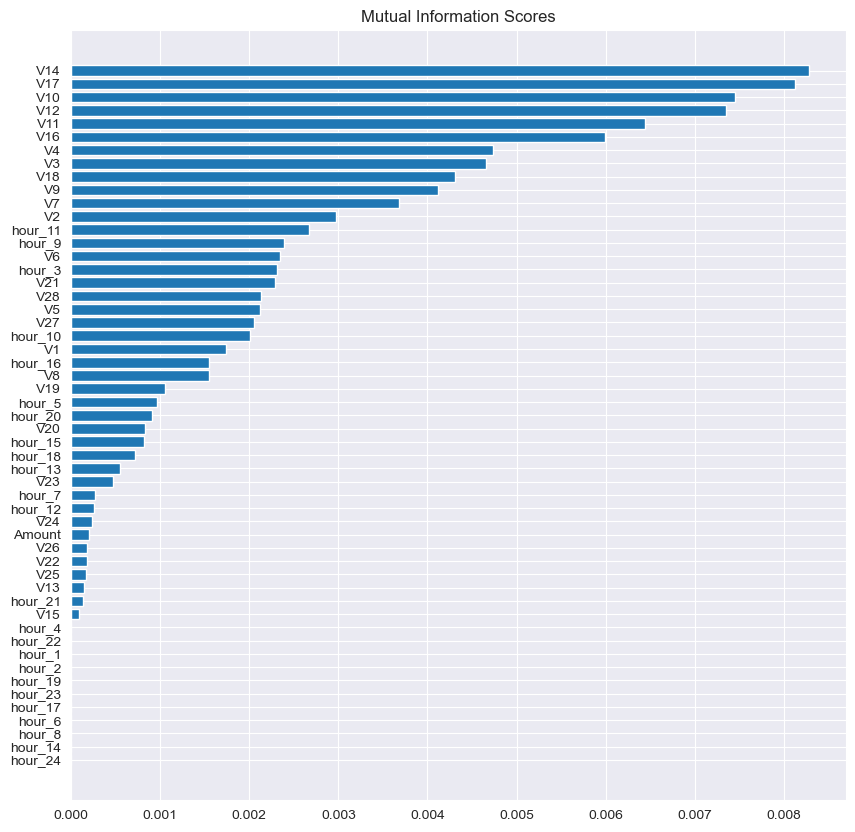

In [136]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
plot_mi_scores(mi_scores_hour_rob_log)

# __________________
# "unimportant" features removed

In [185]:
features_with_zero_mutual_info = mi_scores_hour_rob_log[~(mi_scores_hour_rob_log>0)].index

NameError: name 'mi_scores_hour_rob_log' is not defined

In [ ]:
X_train_pruned = X_train_hour_amt_robust_log.drop(features_with_zero_mutual_info, axis=1)
X_val_pruned = X_val_hour_amt_robust_log.drop(features_with_zero_mutual_info, axis=1)
X_train_pruned

In [ ]:
eval_dict_hours_log_pruned = dict()

for i, m in enumerate(models):
    eval_dict_hours_log_pruned[model_names[i]] = model_tester(m, model_names[i], X_train=X_train_pruned, y_train=y_train,\
                                                       X_val=X_val_pruned, y_val=y_val)  

In [ ]:
eval_df_hour_log_pruned = pd.DataFrame(data=eval_dict_hours_log_pruned.values(), index=eval_dict_hours_log_pruned.keys(),\
                       columns=['bal_acc_score','precisions', 'recalls', 'f1', 'false_positives', 'false_negatives', 'train_time', 'test_time'])

In [ ]:
eval_df_hour_log_pruned

In [ ]:
eval_df_hour_log_pruned - eval_df_hour_log

# CHECKING NEW METRICS

In [137]:
#######################################################################################################################
#####   Function used to test different models Version 2 - fbeta_score used added as new metric
#######################################################################################################################

from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_score, recall_score

def model_tester2(X_train, y_train, X_val, y_val):
    
    rf_clf = RandomForestClassifier() #proba #featimp
    brf_clf = BalancedRandomForestClassifier() #proba #featimp
    lr_clf = LogisticRegression() #proba #coef
    knn_clf = KNeighborsClassifier() #proba
    gnb_clf = GaussianNB() #proba
    ada_clf = AdaBoostClassifier() #proba #featimp
    qda_clf = QuadraticDiscriminantAnalysis() #proba
    mlp_clf = MLPClassifier() #coef #proba
    xgb_clf = xgb.XGBClassifier() #featimp #coef #proba
    xgbrf_clf = xgb.XGBRFClassifier() #featimp #coef #proba

    model_names = ['rf_clf', 'brf_clf', 'lr_clf', 'knn_clf', 'gnb_clf', 'ada_clf',\
               'qda_clf', 'mlp_clf', 'xgb_clf', 'xgbrf_clf']
    
    models = [rf_clf, brf_clf, lr_clf, knn_clf, gnb_clf, ada_clf, qda_clf, mlp_clf, \
              xgb_clf, xgbrf_clf]
    
    eval_dict_out = dict()
    
    
    for i, clf in enumerate(models):
        print(f'============ {model_names[i]} ============')
    
        start_time = time.time()
        clf.fit(X_train, y_train)
        train_time = time.time() - start_time
    
        start_time = time.time()
        y_pred = clf.predict(X_val)
        test_time = time.time() - start_time
        
        print(metrics.classification_report(y_val, y_pred, digits=4), end='\n\n===============================================\n')
        
        # balanced accuracy score
        bal_acc_score = balanced_accuracy_score(y_val, y_pred)
        
        # Recall -Precision plot
        y_prob = clf.predict_proba(X_val)[:, 1]
        precision_prob, recall_prob, threshold_prob = precision_recall_curve(y_val, y_prob)
        plt.plot(recall_prob, precision_prob)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.show()
        
        # Precision and recall to include in the results
        precision = precision_score(y_val, y_pred)
        recall = recall_score(y_val, y_pred)    
    
        # Fbeta metric    
        fbeta =fbeta_score(y_val, y_pred, average='binary', beta=5, pos_label=1)
        print('fbeta: %.4f' % fbeta, end='\n')
        
        # AUC under the Recall-Precision 
        auc_score = auc(recall_prob, precision_prob)
        print('AUC: %.3f' % auc_score, end='\n')
    
        conf_mtr = confusion_matrix(y_val, y_pred)
        print(conf_mtr, end='\n\n===============================================\n')
        
        eval_dict_out[model_names[i]] = [fbeta, bal_acc_score, precision, recall, auc_score, conf_mtr[0,1], conf_mtr[1,0], train_time, test_time]
        
    return eval_dict_out

============ rf_clf ============
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9296    0.7021    0.8000        94

    accuracy                         0.9994     56745
   macro avg     0.9645    0.8510    0.8999     56745
weighted avg     0.9994    0.9994    0.9994     56745




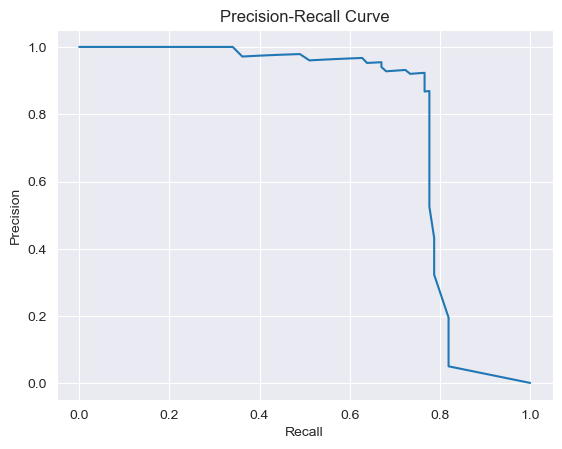

fbeta: 0.7088
AUC: 0.776
[[56646     5]
 [   28    66]]

============ brf_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

              precision    recall  f1-score   support

           0     0.9997    0.9785    0.9890     56651
           1     0.0609    0.8404    0.1136        94

    accuracy                         0.9783     56745
   macro avg     0.5303    0.9095    0.5513     56745
weighted avg     0.9982    0.9783    0.9876     56745




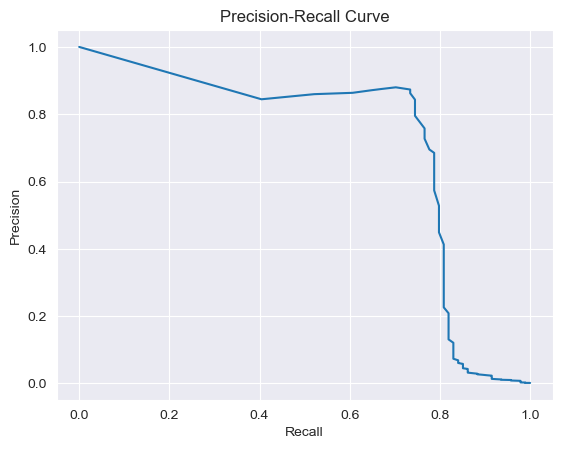

fbeta: 0.5632
AUC: 0.716
[[55433  1218]
 [   15    79]]

============ lr_clf ============
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9996     56651
           1     0.8438    0.5745    0.6835        94

    accuracy                         0.9991     56745
   macro avg     0.9215    0.7871    0.8416     56745
weighted avg     0.9990    0.9991    0.9990     56745




C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


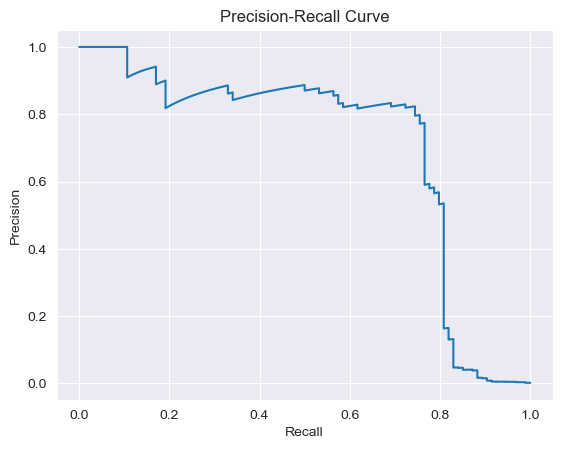

fbeta: 0.5816
AUC: 0.703
[[56641    10]
 [   40    54]]

============ knn_clf ============
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9167    0.7021    0.7952        94

    accuracy                         0.9994     56745
   macro avg     0.9581    0.8510    0.8974     56745
weighted avg     0.9994    0.9994    0.9994     56745




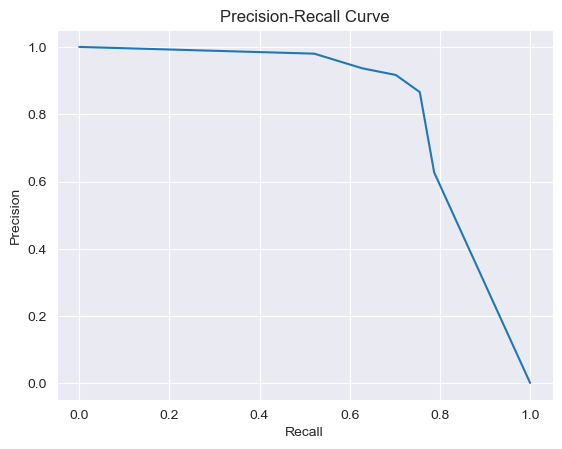

fbeta: 0.7085
AUC: 0.825
[[56645     6]
 [   28    66]]

============ gnb_clf ============
              precision    recall  f1-score   support

           0     0.9996    0.9528    0.9756     56651
           1     0.0266    0.7766    0.0514        94

    accuracy                         0.9525     56745
   macro avg     0.5131    0.8647    0.5135     56745
weighted avg     0.9980    0.9525    0.9741     56745




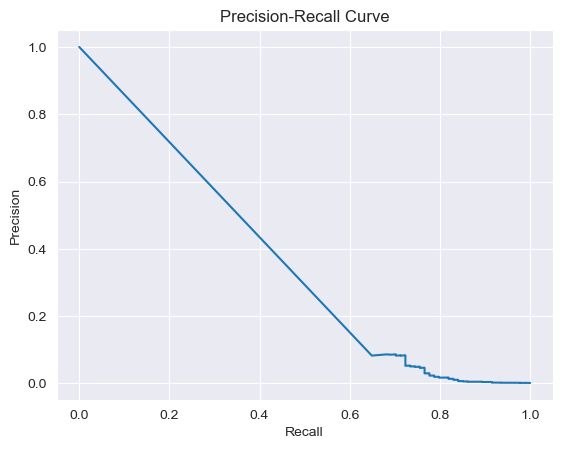

fbeta: 0.3723
AUC: 0.362
[[53976  2675]
 [   21    73]]

============ ada_clf ============
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56651
           1     0.8267    0.6596    0.7337        94

    accuracy                         0.9992     56745
   macro avg     0.9131    0.8297    0.8667     56745
weighted avg     0.9991    0.9992    0.9992     56745




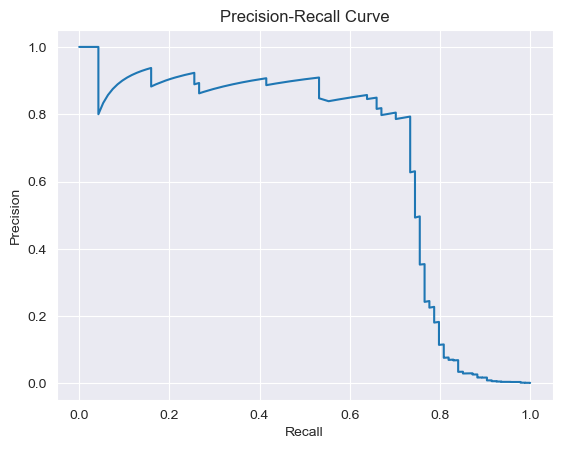

fbeta: 0.6647
AUC: 0.677
[[56638    13]
 [   32    62]]

============ qda_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

           0     0.9996    0.9588    0.9788     56651
           1     0.0307    0.7872    0.0592        94

    accuracy                         0.9585     56745
   macro avg     0.5152    0.8730    0.5190     56745
weighted avg     0.9980    0.9585    0.9773     56745




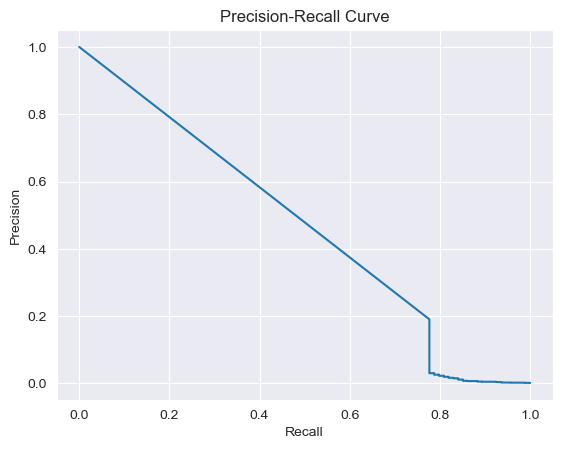

fbeta: 0.4044
AUC: 0.464
[[54317  2334]
 [   20    74]]

============ mlp_clf ============
              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56651
           1     0.8471    0.7660    0.8045        94

    accuracy                         0.9994     56745
   macro avg     0.9233    0.8829    0.9021     56745
weighted avg     0.9994    0.9994    0.9994     56745




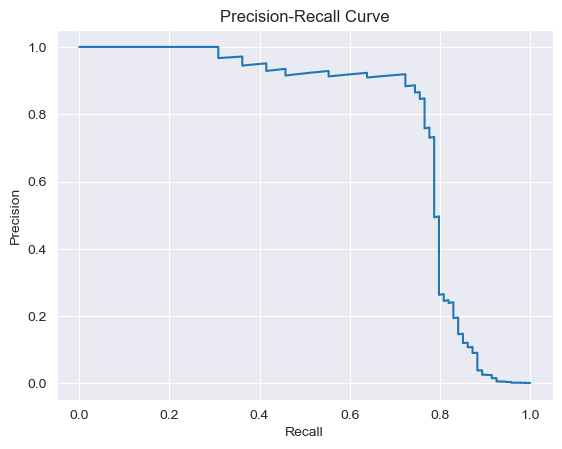

fbeta: 0.7688
AUC: 0.769
[[56638    13]
 [   22    72]]

============ xgb_clf ============
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9565    0.7021    0.8098        94

    accuracy                         0.9995     56745
   macro avg     0.9780    0.8510    0.9048     56745
weighted avg     0.9994    0.9995    0.9994     56745




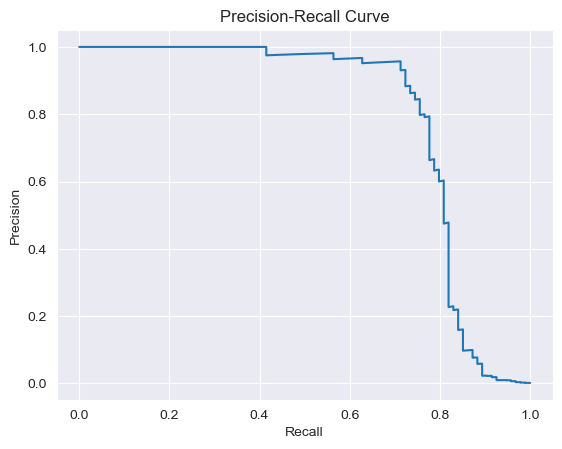

fbeta: 0.7094
AUC: 0.794
[[56648     3]
 [   28    66]]

============ xgbrf_clf ============
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56651
           1     0.9167    0.7021    0.7952        94

    accuracy                         0.9994     56745
   macro avg     0.9581    0.8510    0.8974     56745
weighted avg     0.9994    0.9994    0.9994     56745




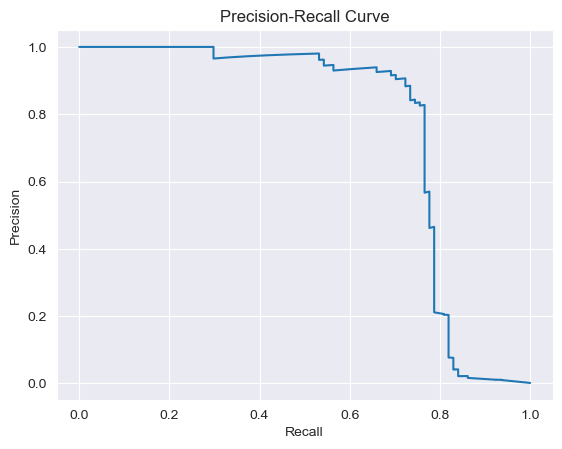

fbeta: 0.7085
AUC: 0.761
[[56645     6]
 [   28    66]]

Stored 'results' (dict)


In [138]:
results = model_tester2(X_train_hour_amt_robust_log, y_train, X_val_hour_amt_robust_log, y_val)
%store results

In [139]:
results_df = pd.DataFrame(data=results.values(), index=results.keys(), \
                          columns=['fbeta', 'bal_acc_score','precisions', 'recalls', 'f1', 'false_positives', 'false_negatives', 'train_time', 'test_time'])

results_df

fbeta  bal_acc_score  precisions   recalls        f1  \
rf_clf     0.708798       0.851020    0.929577  0.702128  0.776103   
brf_clf    0.563203       0.909463    0.060910  0.840426  0.715985   
lr_clf     0.581607       0.787146    0.843750  0.574468  0.702885   
knn_clf    0.708505       0.851011    0.916667  0.702128  0.825129   
gnb_clf    0.372303       0.864688    0.026565  0.776596  0.361788   
ada_clf    0.664742       0.829672    0.826667  0.659574  0.676609   
qda_clf    0.404372       0.873017    0.030731  0.787234  0.464493   
mlp_clf    0.768789       0.882864    0.847059  0.765957  0.768908   
xgb_clf    0.709384       0.851037    0.956522  0.702128  0.794348   
xgbrf_clf  0.708505       0.851011    0.916667  0.702128  0.761083   

           false_positives  false_negatives  train_time  test_time  
rf_clf                   5               28  105.428306   0.401092  
brf_clf               1218               15    2.927665   0.304069  
lr_clf                  10               40    1.520346   0.012003  
knn_clf                  6               28    0.061014   8.381908  
gnb_clf               2675               21    0.152035   0.056013  
ada_clf                 13               32   48.376472   0.735168  
qda_clf               2334               20    0.503114   0.113025  
mlp_clf                 13               22   26.169386   0.063015  
xgb_clf                  3               28   11.082522   0.055013  
xgbrf_clf                6               28   11.246061   0.045010

In [140]:
# results_df.to_excel('balanced_dataset_results.xlsx', index=True, sheet_name='Baseline' )

# Models with class_weight

Models which have a class_weight hyperparameter:
- RandomForestClassifier
- BalancedRandomForestClassifier
- LogisticRegression
- SVC(kernel='rbf', probability=True)
- SVC(kernel='poly', probability=True)

- KNeighborsClassifier

- xgb.XGBClassifier
- xgb.XGBRFClassifier

In [159]:
#######################################################################################################################
#####   Function used to test different models Version 3 - models with class_weight
#######################################################################################################################

from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_score, recall_score

def model_tester3(X_train, y_train, X_val, y_val):
    
    class_weight_10_1 = {0 : 10, 1 : 1}
    class_weight_1_10 = {0 : 1, 1 : 10}
    class_weight_09_01 = {0 : 0.9, 1 : 0.1}
    class_weight_01_09 = {0 : 0.1, 1 : 0.9}
    
    weights = [class_weight_10_1, class_weight_1_10, class_weight_09_01, class_weight_01_09]
       
    eval_dict_out = dict()
    
    for j, weight in enumerate(weights):
        print(f'============ {weights[j]} ============')
        
        rf_clf = RandomForestClassifier(class_weight=weight)
        brf_clf = BalancedRandomForestClassifier(class_weight=weight)
        lr_clf = LogisticRegression(class_weight=weight)
    
        
        
        model_names = ['rf_clf', 'brf_clf', 'lr_clf']
    
        models = [rf_clf, brf_clf, lr_clf]
        
        for i, clf in enumerate(models):
            print(f'============ {model_names[i]} ============')    

            start_time = time.time()
            clf.fit(X_train, y_train)
            train_time = time.time() - start_time
        
            start_time = time.time()
            y_pred = clf.predict(X_val)
            test_time = time.time() - start_time
            
            print(metrics.classification_report(y_val, y_pred, digits=4), end='\n\n===============================================\n')
            
            # balanced accuracy score
            bal_acc_score = balanced_accuracy_score(y_val, y_pred)
            
            # Recall -Precision plot
            y_prob = clf.predict_proba(X_val)[:, 1]
            precision_prob, recall_prob, threshold_prob = precision_recall_curve(y_val, y_prob)
            plt.plot(recall_prob, precision_prob)
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            plt.title('Precision-Recall Curve')
            plt.show()
            
            # Precision and recall to include in the results
            precision = precision_score(y_val, y_pred)
            recall = recall_score(y_val, y_pred)    
        
            # Fbeta metric    
            fbeta =fbeta_score(y_val, y_pred, average='binary', beta=5, pos_label=1)
            print('fbeta: %.4f' % fbeta, end='\n')
            
            # AUC under the Recall-Precision 
            auc_score = auc(recall_prob, precision_prob)
            print('AUC: %.3f' % auc_score, end='\n')
        
            conf_mtr = confusion_matrix(y_val, y_pred)
            print(conf_mtr, end='\n\n===============================================\n')
        
            eval_dict_out[model_names[i]+' 0: ' + str(weights[j][0])+'/ 1: ' + str(weights[j][1])] = [fbeta, bal_acc_score, precision, recall, auc_score, conf_mtr[0,1], conf_mtr[1,0], train_time, test_time]
        
    return eval_dict_out

============ {0: 10, 1: 1} ============
============ rf_clf ============
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9997     56863
           1     0.9241    0.7449    0.8249        98

    accuracy                         0.9995     56961
   macro avg     0.9618    0.8724    0.9123     56961
weighted avg     0.9994    0.9995    0.9994     56961




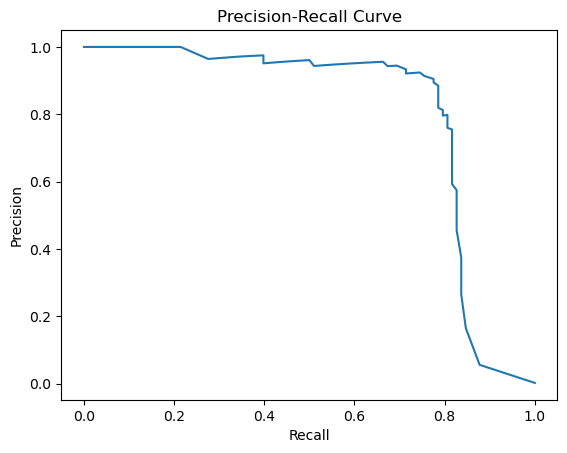

fbeta: 0.7505
AUC: 0.803
[[56857     6]
 [   25    73]]

============ brf_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

              precision    recall  f1-score   support

           0     0.9997    0.9668    0.9830     56863
           1     0.0426    0.8571    0.0812        98

    accuracy                         0.9666     56961
   macro avg     0.5212    0.9120    0.5321     56961
weighted avg     0.9981    0.9666    0.9815     56961




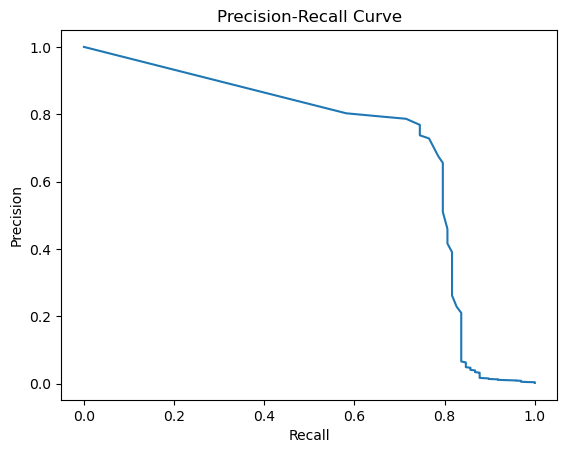

fbeta: 0.4941
AUC: 0.706
[[54977  1886]
 [   14    84]]

============ lr_clf ============
              precision    recall  f1-score   support

           0     0.9990    1.0000    0.9995     56863
           1     0.9556    0.4388    0.6014        98

    accuracy                         0.9990     56961
   macro avg     0.9773    0.7194    0.8004     56961
weighted avg     0.9990    0.9990    0.9988     56961




C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


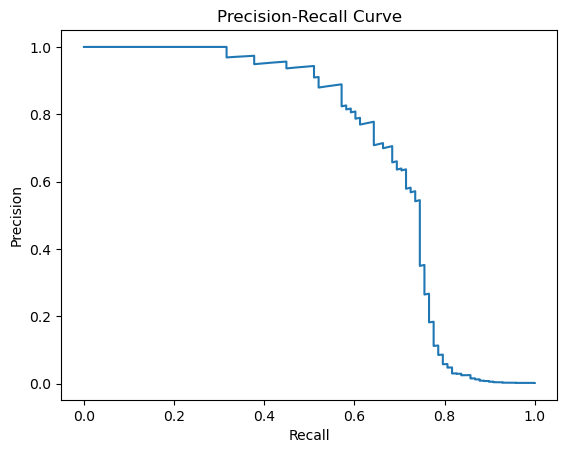

fbeta: 0.4481
AUC: 0.691
[[56861     2]
 [   55    43]]

============ {0: 1, 1: 10} ============
============ rf_clf ============
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56863
           1     0.9324    0.7041    0.8023        98

    accuracy                         0.9994     56961
   macro avg     0.9660    0.8520    0.9010     56961
weighted avg     0.9994    0.9994    0.9994     56961




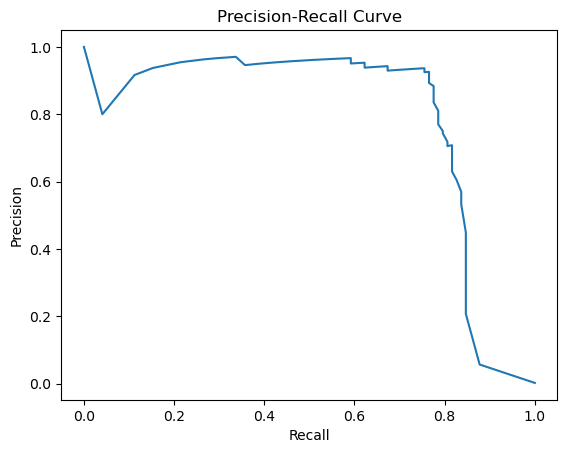

fbeta: 0.7108
AUC: 0.784
[[56858     5]
 [   29    69]]

============ brf_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

              precision    recall  f1-score   support

           0     0.9997    0.9854    0.9925     56863
           1     0.0906    0.8469    0.1637        98

    accuracy                         0.9851     56961
   macro avg     0.5452    0.9161    0.5781     56961
weighted avg     0.9982    0.9851    0.9911     56961




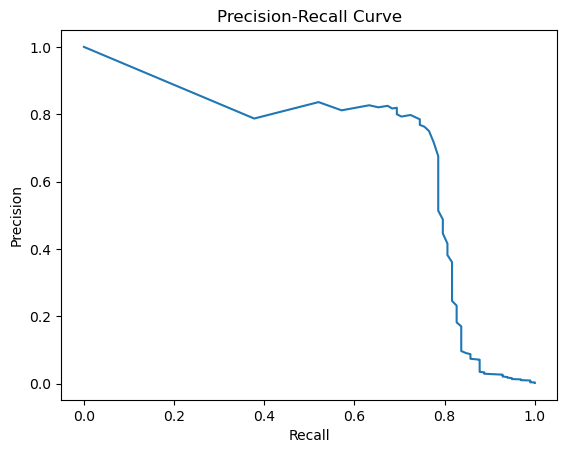

fbeta: 0.6411
AUC: 0.690
[[56030   833]
 [   15    83]]

============ lr_clf ============
              precision    recall  f1-score   support

           0     0.9996    0.9994    0.9995     56863
           1     0.6875    0.7857    0.7333        98

    accuracy                         0.9990     56961
   macro avg     0.8436    0.8925    0.8664     56961
weighted avg     0.9991    0.9990    0.9990     56961




C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


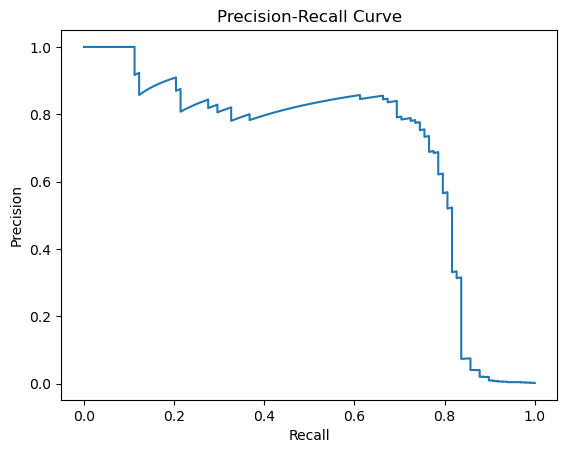

fbeta: 0.7814
AUC: 0.695
[[56828    35]
 [   21    77]]

============ {0: 0.9, 1: 0.1} ============
============ rf_clf ============
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56863
           1     0.9103    0.7245    0.8068        98

    accuracy                         0.9994     56961
   macro avg     0.9549    0.8622    0.9033     56961
weighted avg     0.9994    0.9994    0.9994     56961




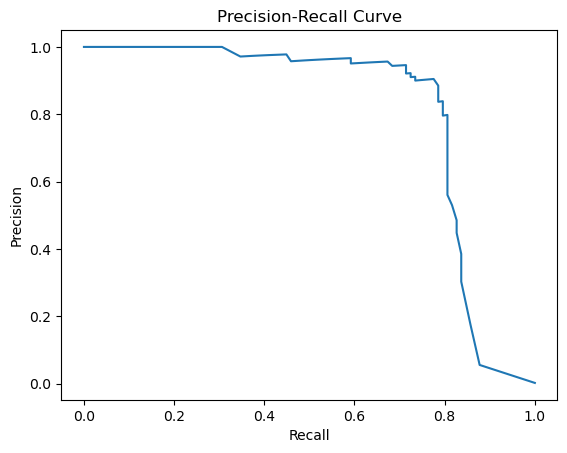

fbeta: 0.7302
AUC: 0.807
[[56856     7]
 [   27    71]]

============ brf_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

              precision    recall  f1-score   support

           0     0.9998    0.9676    0.9834     56863
           1     0.0441    0.8673    0.0839        98

    accuracy                         0.9674     56961
   macro avg     0.5219    0.9175    0.5337     56961
weighted avg     0.9981    0.9674    0.9819     56961




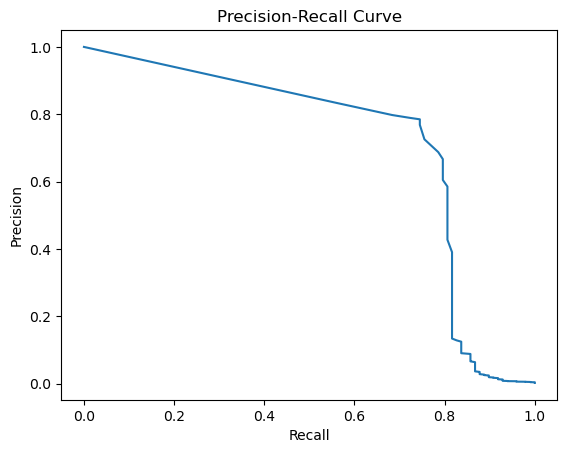

fbeta: 0.5048
AUC: 0.716
[[55020  1843]
 [   13    85]]

============ lr_clf ============
              precision    recall  f1-score   support

           0     0.9990    0.9999    0.9995     56863
           1     0.9111    0.4184    0.5734        98

    accuracy                         0.9989     56961
   macro avg     0.9551    0.7091    0.7864     56961
weighted avg     0.9988    0.9989    0.9987     56961




C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


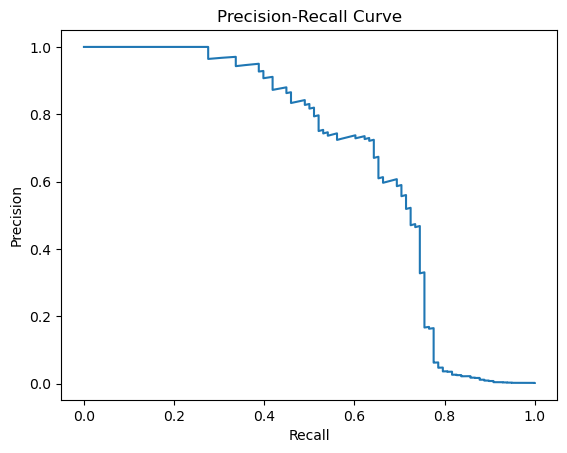

fbeta: 0.4273
AUC: 0.656
[[56859     4]
 [   57    41]]

============ {0: 0.1, 1: 0.9} ============
============ rf_clf ============
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56863
           1     0.9306    0.6837    0.7882        98

    accuracy                         0.9994     56961
   macro avg     0.9650    0.8418    0.8940     56961
weighted avg     0.9993    0.9994    0.9993     56961




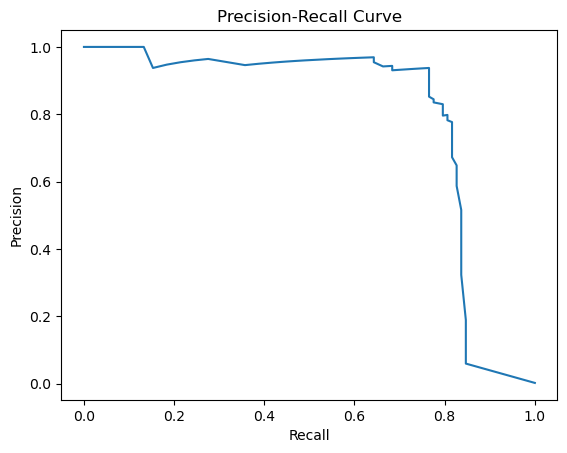

fbeta: 0.6907
AUC: 0.798
[[56858     5]
 [   31    67]]

============ brf_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

              precision    recall  f1-score   support

           0     0.9998    0.9876    0.9936     56863
           1     0.1073    0.8673    0.1910        98

    accuracy                         0.9874     56961
   macro avg     0.5535    0.9275    0.5923     56961
weighted avg     0.9982    0.9874    0.9922     56961




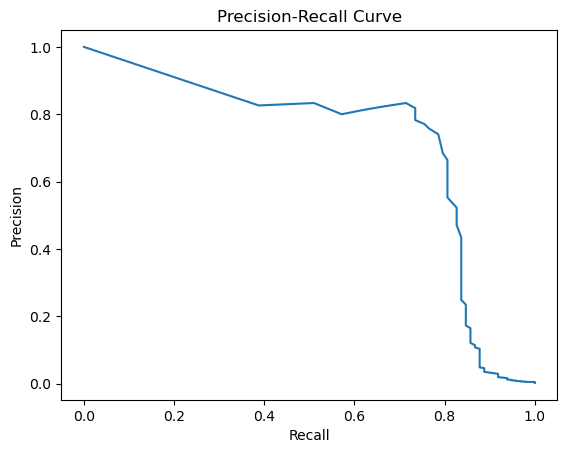

fbeta: 0.6817
AUC: 0.717
[[56156   707]
 [   13    85]]

============ lr_clf ============
              precision    recall  f1-score   support

           0     0.9996    0.9995    0.9996     56863
           1     0.7196    0.7857    0.7512        98

    accuracy                         0.9991     56961
   macro avg     0.8596    0.8926    0.8754     56961
weighted avg     0.9991    0.9991    0.9991     56961




C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


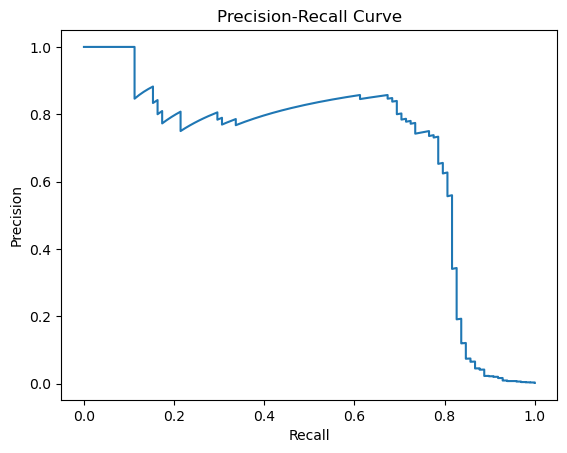

fbeta: 0.7829
AUC: 0.686
[[56833    30]
 [   21    77]]

Stored 'result_weights' (dict)


In [31]:
result_weights = model_tester3(X_train_hour_amt_robust_log, y_train, X_val_hour_amt_robust_log, y_val)
%store result_weights

In [151]:
# %store -r
# result_weights

In [153]:
result_weights_df = pd.DataFrame(data=result_weights.values(), index=result_weights.keys(), \
                          columns=['fbeta', 'bal_acc_score','precisions', 'recalls', 'f1', 'false_positives', 'false_negatives', 'train_time', 'test_time'])

result_weights_df.sort_values('fbeta')

fbeta  bal_acc_score  precisions   recalls  \
lr_clf 0: 0.9/ 1: 0.1   0.427255       0.709149    0.911111  0.418367   
lr_clf 0: 10/ 1: 1      0.448096       0.719370    0.955556  0.438776   
brf_clf 0: 10/ 1: 1     0.494118       0.911988    0.042640  0.857143   
brf_clf 0: 0.9/ 1: 0.1  0.504797       0.917468    0.044087  0.867347   
brf_clf 0: 1/ 1: 10     0.641117       0.916145    0.090611  0.846939   
brf_clf 0: 0.1/ 1: 0.9  0.681678       0.927457    0.107323  0.867347   
rf_clf 0: 0.1/ 1: 0.9   0.690722       0.841793    0.930556  0.683673   
rf_clf 0: 1/ 1: 10      0.710777       0.851997    0.932432  0.704082   
rf_clf 0: 0.9/ 1: 0.1   0.730222       0.862183    0.910256  0.724490   
rf_clf 0: 10/ 1: 1      0.750494       0.872396    0.924051  0.744898   
lr_clf 0: 1/ 1: 10      0.781421       0.892549    0.687500  0.785714   
lr_clf 0: 0.1/ 1: 0.9   0.782949       0.892593    0.719626  0.785714   

                              f1  false_positives  false_negatives  \
lr_clf 0: 0.9/ 1: 0.1   0.655687                4               57   
lr_clf 0: 10/ 1: 1      0.691370                2               55   
brf_clf 0: 10/ 1: 1     0.706444             1886               14   
brf_clf 0: 0.9/ 1: 0.1  0.716024             1843               13   
brf_clf 0: 1/ 1: 10     0.689657              833               15   
brf_clf 0: 0.1/ 1: 0.9  0.716641              707               13   
rf_clf 0: 0.1/ 1: 0.9   0.797532                5               31   
rf_clf 0: 1/ 1: 10      0.783692                5               29   
rf_clf 0: 0.9/ 1: 0.1   0.806889                7               27   
rf_clf 0: 10/ 1: 1      0.802718                6               25   
lr_clf 0: 1/ 1: 10      0.695174               35               21   
lr_clf 0: 0.1/ 1: 0.9   0.686033               30               21   

                        train_time  test_time  
lr_clf 0: 0.9/ 1: 0.1     1.479335   0.012002  
lr_clf 0: 10/ 1: 1        1.513342   0.014003  
brf_clf 0: 10/ 1: 1       3.010683   0.363082  
brf_clf 0: 0.9/ 1: 0.1    3.035076   0.353080  
brf_clf 0: 1/ 1: 10       2.960670   0.291066  
brf_clf 0: 0.1/ 1: 0.9    2.970673   0.301068  
rf_clf 0: 0.1/ 1: 0.9   101.655164   0.399090  
rf_clf 0: 1/ 1: 10       99.644101   0.397090  
rf_clf 0: 0.9/ 1: 0.1   124.488560   0.434099  
rf_clf 0: 10/ 1: 1      117.641915   0.433098  
lr_clf 0: 1/ 1: 10        1.465332   0.013003  
lr_clf 0: 0.1/ 1: 0.9     1.594362   0.013003

# Model testing with balanced datasets

In [18]:
# RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

# Now we can fit the sampler
X_ros_train, y_ros_train = ros.fit_resample(X_train_hour_amt_robust_log, y_train)
# X_ros_val, y_ros_val = ros.fit_resample(X_val_hour_amt_robust_log, y_val)

from collections import Counter
print(sorted(Counter(y_ros_train).items()))
print(sorted(Counter(y_ros_val).items()))

[(0, 170589), (1, 170589)]
[(0, 56863), (1, 56863)]


In [19]:
hour_indexes = [i for i, x in enumerate(X_train_hour_amt_robust_log.columns) if x.startswith('hour')]

In [20]:
# SMOTENC
from imblearn.over_sampling import SMOTENC
smote = SMOTENC(random_state=0, categorical_features=hour_indexes)

# Now we can fit the sampler
X_smote_train, y_smote_train = smote.fit_resample(X_train_hour_amt_robust_log, y_train)
# X_smote_val, y_smote_val = smote.fit_resample(X_val_hour_amt_robust_log, y_val)

print(sorted(Counter(y_smote_train).items()))
print(sorted(Counter(y_smote_val).items()))

[(0, 170589), (1, 170589)]
[(0, 56863), (1, 56863)]


============ rf_clf ============
              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56863
           1     0.9324    0.7041    0.8023        98

    accuracy                         0.9994     56961
   macro avg     0.9660    0.8520    0.9010     56961
weighted avg     0.9994    0.9994    0.9994     56961




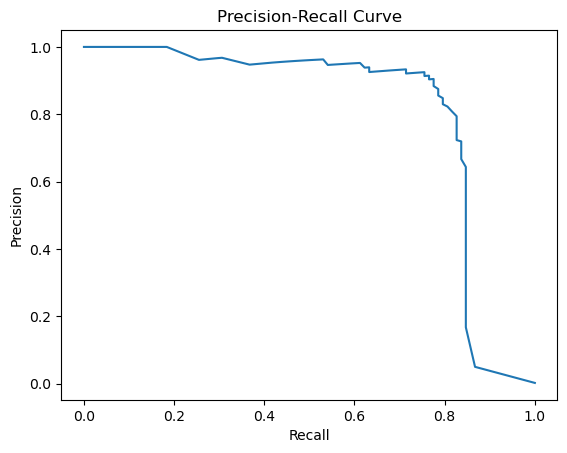

fbeta: 0.7108
AUC: 0.809
[[56858     5]
 [   29    69]]

============ brf_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

              precision    recall  f1-score   support

           0     0.9995    0.9999    0.9997     56863
           1     0.9211    0.7143    0.8046        98

    accuracy                         0.9994     56961
   macro avg     0.9603    0.8571    0.9021     56961
weighted avg     0.9994    0.9994    0.9994     56961




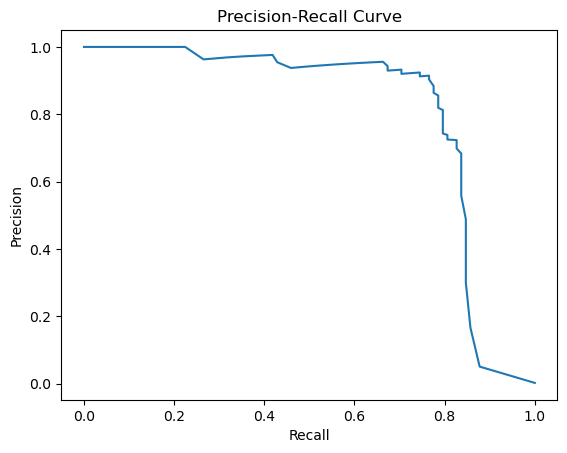

fbeta: 0.7205
AUC: 0.808
[[56857     6]
 [   28    70]]

============ lr_clf ============
              precision    recall  f1-score   support

           0     0.9998    0.9754    0.9874     56863
           1     0.0574    0.8673    0.1076        98

    accuracy                         0.9752     56961
   macro avg     0.5286    0.9214    0.5475     56961
weighted avg     0.9981    0.9752    0.9859     56961




C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


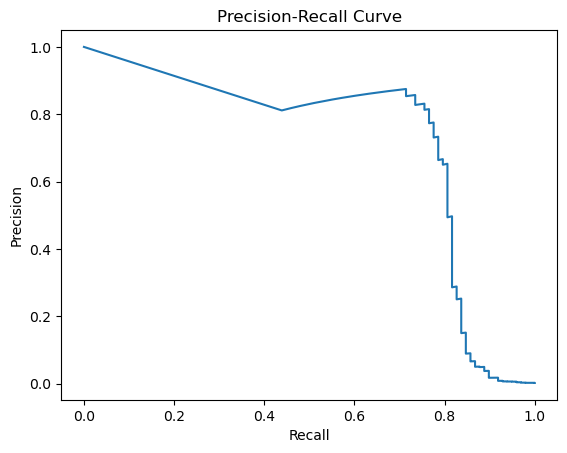

fbeta: 0.5621
AUC: 0.718
[[55466  1397]
 [   13    85]]

============ knn_clf ============
              precision    recall  f1-score   support

           0     0.9997    0.9993    0.9995     56863
           1     0.6752    0.8061    0.7349        98

    accuracy                         0.9990     56961
   macro avg     0.8374    0.9027    0.8672     56961
weighted avg     0.9991    0.9990    0.9990     56961




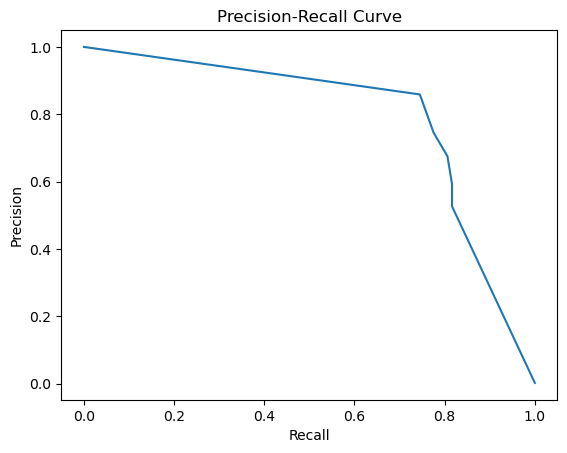

fbeta: 0.8002
AUC: 0.794
[[56825    38]
 [   19    79]]

============ gnb_clf ============
              precision    recall  f1-score   support

           0     0.9996    0.9475    0.9729     56863
           1     0.0258    0.8061    0.0500        98

    accuracy                         0.9473     56961
   macro avg     0.5127    0.8768    0.5114     56961
weighted avg     0.9980    0.9473    0.9713     56961




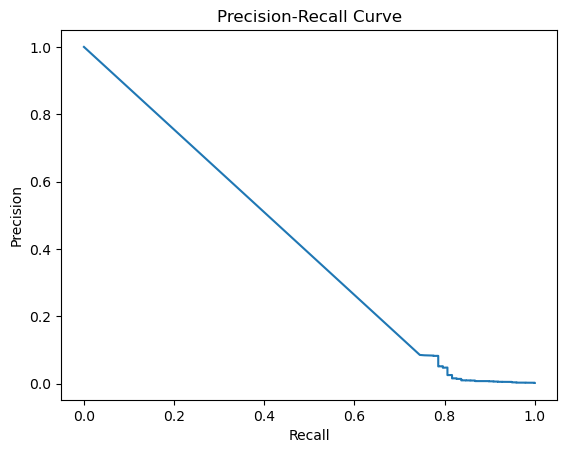

fbeta: 0.3726
AUC: 0.410
[[53879  2984]
 [   19    79]]

============ ada_clf ============
              precision    recall  f1-score   support

           0     0.9998    0.9862    0.9929     56863
           1     0.0975    0.8673    0.1753        98

    accuracy                         0.9860     56961
   macro avg     0.5486    0.9268    0.5841     56961
weighted avg     0.9982    0.9860    0.9915     56961




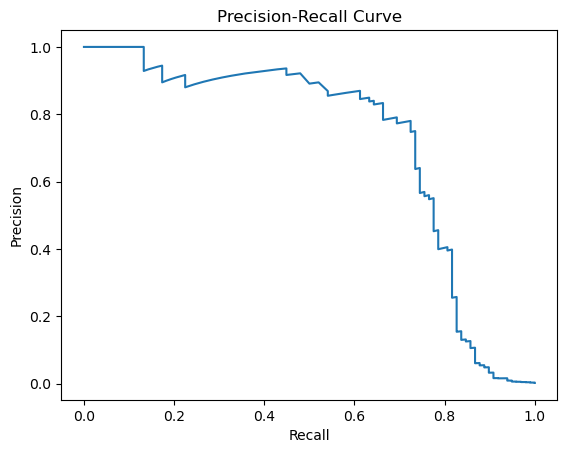

fbeta: 0.6653
AUC: 0.716
[[56076   787]
 [   13    85]]

============ qda_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

           0     0.9997    0.9521    0.9753     56863
           1     0.0289    0.8265    0.0559        98

    accuracy                         0.9519     56961
   macro avg     0.5143    0.8893    0.5156     56961
weighted avg     0.9980    0.9519    0.9738     56961




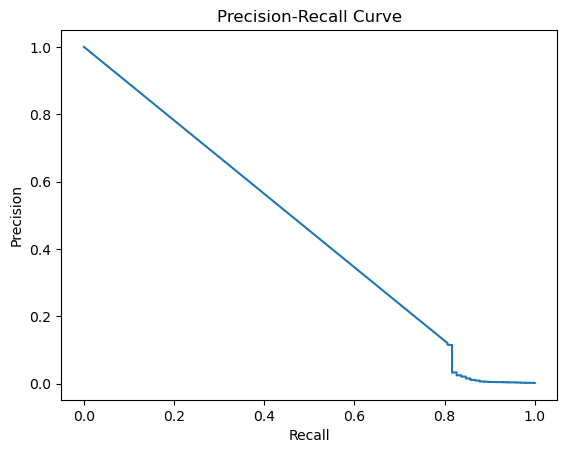

fbeta: 0.4010
AUC: 0.454
[[54142  2721]
 [   17    81]]

============ mlp_clf ============
              precision    recall  f1-score   support

           0     0.9996    0.9996    0.9996     56863
           1     0.7604    0.7449    0.7526        98

    accuracy                         0.9992     56961
   macro avg     0.8800    0.8722    0.8761     56961
weighted avg     0.9991    0.9992    0.9992     56961




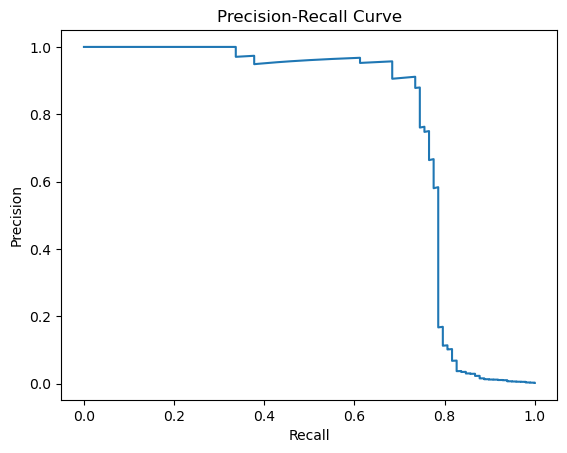

fbeta: 0.7455
AUC: 0.760
[[56840    23]
 [   25    73]]

============ xgb_clf ============
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9997     56863
           1     0.9036    0.7653    0.8287        98

    accuracy                         0.9995     56961
   macro avg     0.9516    0.8826    0.9142     56961
weighted avg     0.9994    0.9995    0.9994     56961




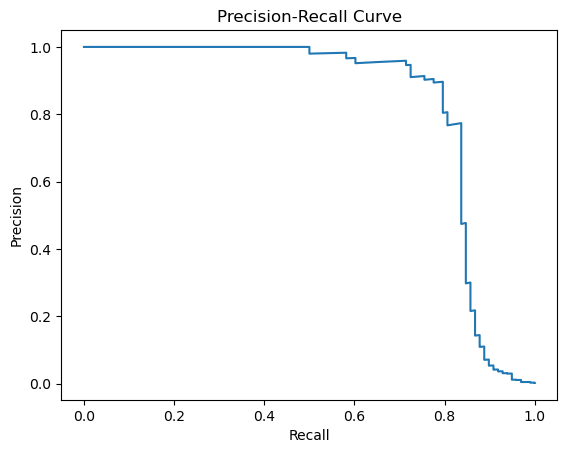

fbeta: 0.7698
AUC: 0.829
[[56855     8]
 [   23    75]]

============ xgbrf_clf ============
              precision    recall  f1-score   support

           0     0.9997    0.9967    0.9982     56863
           1     0.3015    0.8367    0.4432        98

    accuracy                         0.9964     56961
   macro avg     0.6506    0.9167    0.7207     56961
weighted avg     0.9985    0.9964    0.9972     56961




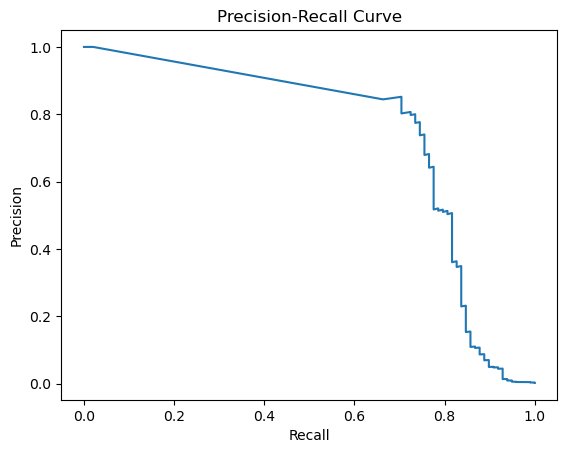

fbeta: 0.7832
AUC: 0.739
[[56673   190]
 [   16    82]]

Stored 'results_ros' (dict)


In [21]:
results_ros = model_tester2(X_ros_train, y_ros_train, X_val_hour_amt_robust_log, y_val)
%store results_ros

In [148]:
# %store -r 
# results_ros

In [154]:
results_ros_df = pd.DataFrame(data=results_ros.values(), index=results_ros.keys(), \
                          columns=['fbeta', 'bal_acc_score','precisions', 'recalls', 'f1', 'false_positives', 'false_negatives', 'train_time', 'test_time'])

results_ros_df

fbeta  bal_acc_score  precisions   recalls        f1  \
rf_clf     0.710777       0.851997    0.932432  0.704082  0.808799   
brf_clf    0.720507       0.857090    0.921053  0.714286  0.808473   
lr_clf     0.562055       0.921390    0.057355  0.867347  0.718148   
knn_clf    0.800156       0.902727    0.675214  0.806122  0.793568   
gnb_clf    0.372574       0.876823    0.025792  0.806122  0.409924   
ada_clf    0.665262       0.926753    0.097477  0.867347  0.716207   
qda_clf    0.400990       0.889339    0.028908  0.826531  0.454213   
mlp_clf    0.745483       0.872247    0.760417  0.744898  0.760471   
xgb_clf    0.769838       0.882583    0.903614  0.765306  0.828864   
xgbrf_clf  0.783248       0.916697    0.301471  0.836735  0.739046   

           false_positives  false_negatives  train_time  test_time  
rf_clf                   5               29   91.201227   0.357080  
brf_clf                  6               28  111.647465   0.351079  
lr_clf                1397               13    2.889655   0.011002  
knn_clf                 38               19    0.125028  15.980437  
gnb_clf               2984               19    0.302068   0.051012  
ada_clf                787               13   64.666186   0.583131  
qda_clf               2721               17    0.732166   0.081018  
mlp_clf                 23               25   39.110893   0.043009  
xgb_clf                  8               23   15.204744   0.036009  
xgbrf_clf              190               16   14.663831   0.038009

============ rf_clf ============
              precision    recall  f1-score   support

           0     0.9996    0.9999    0.9997     56863
           1     0.9012    0.7449    0.8156        98

    accuracy                         0.9994     56961
   macro avg     0.9504    0.8724    0.9077     56961
weighted avg     0.9994    0.9994    0.9994     56961




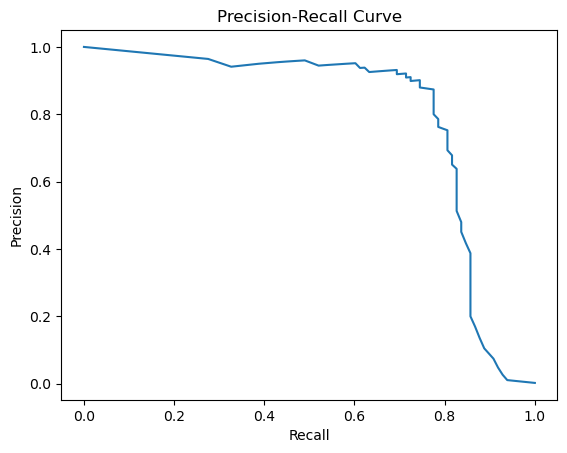

fbeta: 0.7499
AUC: 0.799
[[56855     8]
 [   25    73]]

============ brf_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\marke\anacond

              precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     56863
           1     0.8690    0.7449    0.8022        98

    accuracy                         0.9994     56961
   macro avg     0.9343    0.8724    0.9009     56961
weighted avg     0.9993    0.9994    0.9993     56961




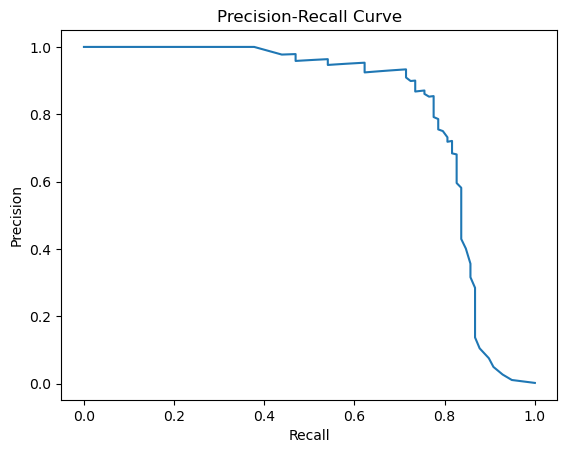

fbeta: 0.7490
AUC: 0.813
[[56852    11]
 [   25    73]]

============ lr_clf ============
              precision    recall  f1-score   support

           0     0.9997    0.9940    0.9968     56863
           1     0.1881    0.8061    0.3050        98

    accuracy                         0.9937     56961
   macro avg     0.5939    0.9001    0.6509     56961
weighted avg     0.9983    0.9937    0.9956     56961




C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


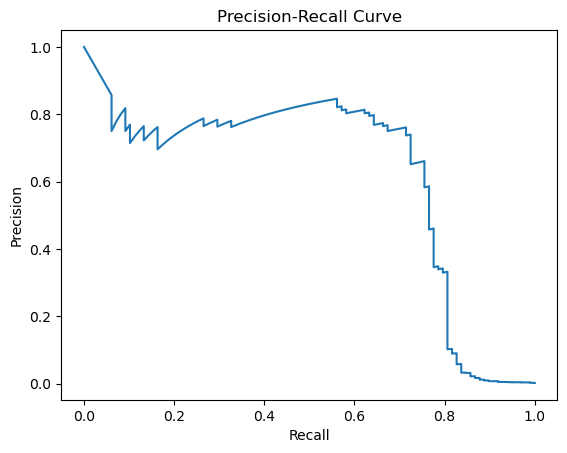

fbeta: 0.7157
AUC: 0.621
[[56522   341]
 [   19    79]]

============ knn_clf ============
              precision    recall  f1-score   support

           0     0.9998    0.9968    0.9983     56863
           1     0.3182    0.8571    0.4641        98

    accuracy                         0.9966     56961
   macro avg     0.6590    0.9270    0.7312     56961
weighted avg     0.9986    0.9966    0.9974     56961




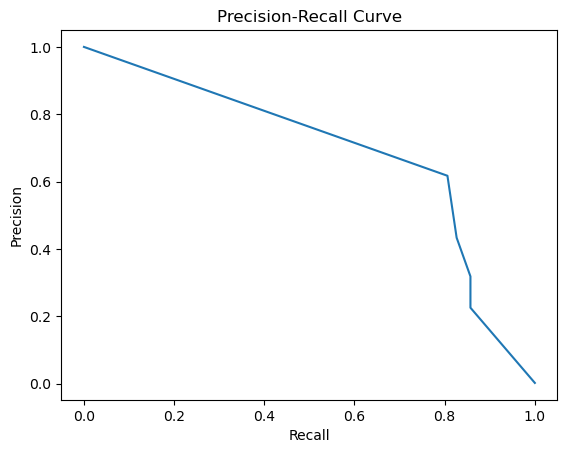

fbeta: 0.8047
AUC: 0.690
[[56683   180]
 [   14    84]]

============ gnb_clf ============
              precision    recall  f1-score   support

           0     0.9991    0.8646    0.9270     56863
           1     0.0071    0.5612    0.0140        98

    accuracy                         0.8641     56961
   macro avg     0.5031    0.7129    0.4705     56961
weighted avg     0.9974    0.8641    0.9255     56961




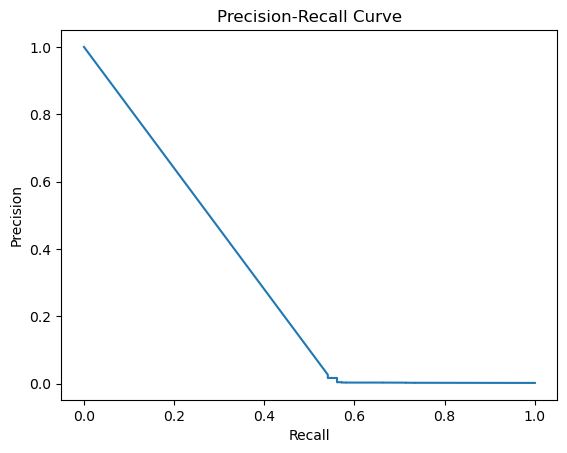

fbeta: 0.1402
AUC: 0.279
[[49166  7697]
 [   43    55]]

============ ada_clf ============
              precision    recall  f1-score   support

           0     0.9997    0.9883    0.9940     56863
           1     0.1063    0.8061    0.1879        98

    accuracy                         0.9880     56961
   macro avg     0.5530    0.8972    0.5909     56961
weighted avg     0.9981    0.9880    0.9926     56961




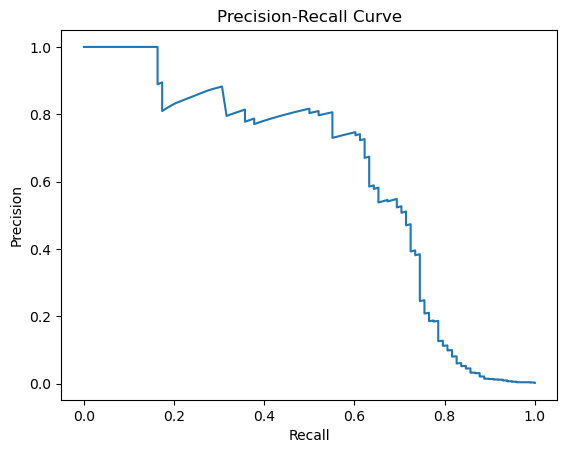

fbeta: 0.6433
AUC: 0.614
[[56199   664]
 [   19    79]]

============ qda_clf ============


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


              precision    recall  f1-score   support

           0     0.9993    0.9846    0.9919     56863
           1     0.0651    0.6224    0.1179        98

    accuracy                         0.9840     56961
   macro avg     0.5322    0.8035    0.5549     56961
weighted avg     0.9977    0.9840    0.9904     56961




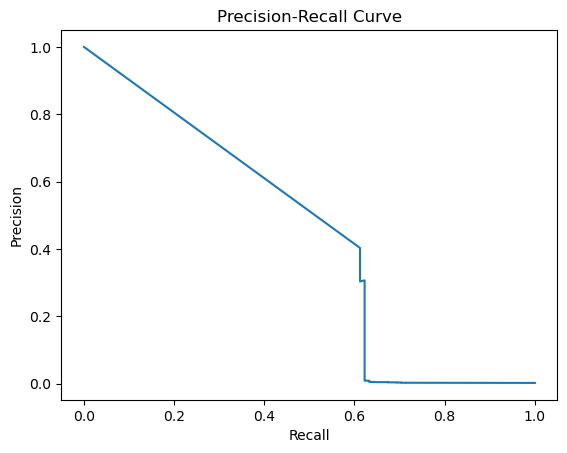

fbeta: 0.4683
AUC: 0.433
[[55987   876]
 [   37    61]]

============ mlp_clf ============
              precision    recall  f1-score   support

           0     0.9995    0.9996    0.9996     56863
           1     0.7742    0.7347    0.7539        98

    accuracy                         0.9992     56961
   macro avg     0.8869    0.8672    0.8768     56961
weighted avg     0.9992    0.9992    0.9992     56961




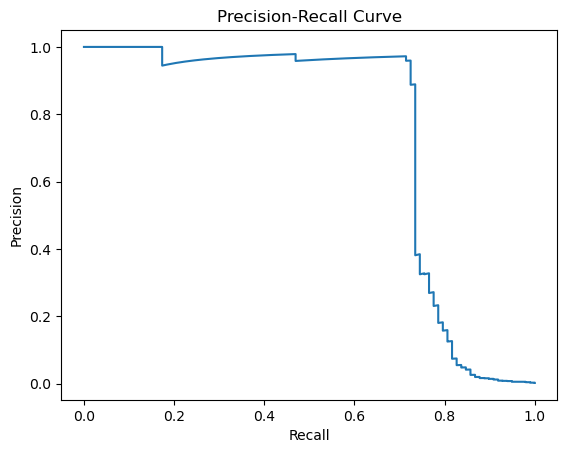

fbeta: 0.7361
AUC: 0.739
[[56842    21]
 [   26    72]]

============ xgb_clf ============
              precision    recall  f1-score   support

           0     0.9996    0.9995    0.9996     56863
           1     0.7264    0.7857    0.7549        98

    accuracy                         0.9991     56961
   macro avg     0.8630    0.8926    0.8772     56961
weighted avg     0.9992    0.9991    0.9991     56961




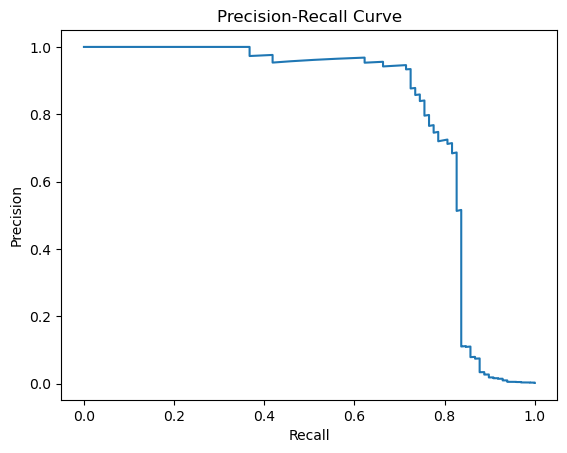

fbeta: 0.7833
AUC: 0.799
[[56834    29]
 [   21    77]]

============ xgbrf_clf ============
              precision    recall  f1-score   support

           0     0.9997    0.9868    0.9932     56863
           1     0.0972    0.8265    0.1740        98

    accuracy                         0.9865     56961
   macro avg     0.5485    0.9067    0.5836     56961
weighted avg     0.9981    0.9865    0.9918     56961




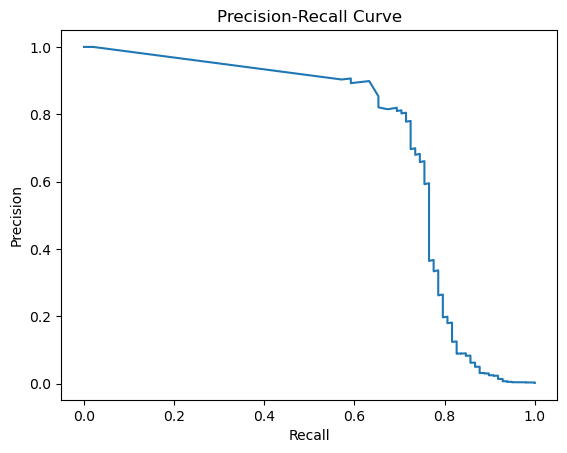

fbeta: 0.6415
AUC: 0.723
[[56111   752]
 [   17    81]]

Stored 'results_smote' (dict)


In [23]:
results_smote = model_tester2(X_smote_train, y_smote_train, X_val_hour_amt_robust_log, y_val)
%store results_smote

In [145]:
# %store -r
# results_smote

In [155]:
results_smote_df = pd.DataFrame(data=results_smote.values(), index=results_smote.keys(), \
                          columns=['fbeta', 'bal_acc_score','precisions', 'recalls', 'f1', 'false_positives', 'false_negatives', 'train_time', 'test_time'])

results_smote_df

fbeta  bal_acc_score  precisions   recalls        f1  \
rf_clf     0.749901       0.872379    0.901235  0.744898  0.798672   
brf_clf    0.749013       0.872352    0.869048  0.744898  0.813018   
lr_clf     0.715679       0.900063    0.188095  0.806122  0.621114   
knn_clf    0.804716       0.926989    0.318182  0.857143  0.690252   
gnb_clf    0.140169       0.712932    0.007095  0.561224  0.278765   
ada_clf    0.643282       0.897223    0.106326  0.806122  0.613864   
qda_clf    0.468261       0.803522    0.065101  0.622449  0.433399   
mlp_clf    0.736138       0.867162    0.774194  0.734694  0.739204   
xgb_clf    0.783255       0.892602    0.726415  0.785714  0.799347   
xgbrf_clf  0.641486       0.906653    0.097239  0.826531  0.722577   

           false_positives  false_negatives  train_time  test_time  
rf_clf                   8               25  216.795397   0.537122  
brf_clf                 11               25  241.282548   0.598135  
lr_clf                 341               19    3.414615   0.014004  
knn_clf                180               14    0.141032  16.200849  
gnb_clf               7697               43    0.353080   0.066014  
ada_clf                664               19  104.207135   0.586136  
qda_clf                876               37    0.663150   0.078018  
mlp_clf                 21               26   42.637643   0.048011  
xgb_clf                 29               21   26.270594   0.040009  
xgbrf_clf              752               17   22.817239   0.037009

# Summary

In [156]:
# join the two dataframes with prefixes for the columns with the same name
concatenated_df = pd.concat([results_df, result_weights_df, results_smote_df, results_ros_df], keys=['baseline', 'class_weight', 'smote', 'ros'], sort=False)

# print the joined dataframe
# concatenated_df
concatenated_df.to_excel('balanced_dataset_results.xlsx', index=True, sheet_name='Class_weight')

In [50]:
concatenated_df.sort_values('fbeta', ascending=False)

fbeta  bal_acc_score  precisions  \
smote        knn_clf                 0.804716       0.926989    0.318182   
ros          knn_clf                 0.800156       0.902727    0.675214   
baseline     xgbrf_clf               0.788810       0.892760    0.875000   
smote        xgb_clf                 0.783255       0.892602    0.726415   
ros          xgbrf_clf               0.783248       0.916697    0.301471   
class_weight lr_clf 0: 0.1/ 1: 0.9   0.782949       0.892593    0.719626   
             lr_clf 0: 1/ 1: 10      0.781421       0.892549    0.687500   
baseline     xgb_clf                 0.770751       0.882609    0.937500   
ros          xgb_clf                 0.769838       0.882583    0.903614   
class_weight rf_clf 0: 10/ 1: 1      0.750494       0.872396    0.924051   
smote        rf_clf                  0.749901       0.872379    0.901235   
             brf_clf                 0.749013       0.872352    0.869048   
baseline     mlp_clf                 0.748128       0.872326    0.839080   
ros          mlp_clf                 0.745483       0.872247    0.760417   
smote        mlp_clf                 0.736138       0.867162    0.774194   
class_weight rf_clf 0: 0.9/ 1: 0.1   0.730222       0.862183    0.910256   
baseline     rf_clf                  0.720792       0.857099    0.933333   
ros          brf_clf                 0.720507       0.857090    0.921053   
smote        lr_clf                  0.715679       0.900063    0.188095   
class_weight rf_clf 0: 1/ 1: 10      0.710777       0.851997    0.932432   
ros          rf_clf                  0.710777       0.851997    0.932432   
baseline     knn_clf                 0.699921       0.846868    0.894737   
class_weight rf_clf 0: 0.1/ 1: 0.9   0.690722       0.841793    0.930556   
             brf_clf 0: 0.1/ 1: 0.9  0.681678       0.927457    0.107323   
ros          ada_clf                 0.665262       0.926753    0.097477   
baseline     lr_clf                  0.648456       0.821314    0.828947   
smote        ada_clf                 0.643282       0.897223    0.106326   
             xgbrf_clf               0.641486       0.906653    0.097239   
class_weight brf_clf 0: 1/ 1: 10     0.641117       0.916145    0.090611   
baseline     ada_clf                 0.637154       0.816168    0.775000   
             brf_clf                 0.602483       0.918978    0.071489   
ros          lr_clf                  0.562055       0.921390    0.057355   
class_weight brf_clf 0: 0.9/ 1: 0.1  0.504797       0.917468    0.044087   
             brf_clf 0: 10/ 1: 1     0.494118       0.911988    0.042640   
smote        qda_clf                 0.468261       0.803522    0.065101   
baseline     qda_clf                 0.465741       0.891140    0.039683   
class_weight lr_clf 0: 10/ 1: 1      0.448096       0.719370    0.955556   
             lr_clf 0: 0.9/ 1: 0.1   0.427255       0.709149    0.911111   
baseline     gnb_clf                 0.422199       0.882521    0.032712   
ros          qda_clf                 0.400990       0.889339    0.028908   
             gnb_clf                 0.372574       0.876823    0.025792   
smote        gnb_clf                 0.140169       0.712932    0.007095   

                                      recalls        f1  false_positives  \
smote        knn_clf                 0.857143  0.690252              180   
ros          knn_clf                 0.806122  0.793568               38   
baseline     xgbrf_clf               0.785714  0.774157               11   
smote        xgb_clf                 0.785714  0.799347               29   
ros          xgbrf_clf               0.836735  0.739046              190   
class_weight lr_clf 0: 0.1/ 1: 0.9   0.785714  0.686033               30   
             lr_clf 0: 1/ 1: 10      0.785714  0.695174               35   
baseline     xgb_clf                 0.765306  0.814145                5   
ros          xgb_clf                 0.765306  0.828864                8   
class_weigh

# ###########################################################
# _____    PLAYGROUND  -> a big mess starts here  
# ###########################################################

# GridSearch on one model

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.pipeline import Pipeline as imbalanced_pipeline
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import fbeta_score, make_scorer

In [60]:
# scorer for GridSearchCV
ftwo_scorer = make_scorer(fbeta_score, beta=5)

# cv-fold for GridSearchCV (NOTE: if we go with class_weight models StratifiedKfold needs to be used)
k_fold = KFold(n_splits=5, shuffle=False)

params = {
    'penalty':['l2','l1'],
    'C': [0.1, 1, 5, 10],
    'l1_ratio': [0.1, 0.25, 0.5, 0.75, 1]
}

hour_indexes = [i for i, x in enumerate(X_train_hour_amt_robust_log.columns) if x.startswith('hour')]


imba_pipeline = imbalanced_pipeline([('smotenc', SMOTENC(random_state=0, categorical_features=hour_indexes)), 
                              ('clf', LogisticRegression(random_state=42, n_jobs=-1, solver='saga', verbose=1))])

cv_score_base = cross_val_score(imba_pipeline, X_train_hour_amt_robust_log, y_train, scoring=ftwo_scorer, cv=k_fold)
print(cv_score_base)

new_params = {'clf__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=k_fold, scoring=ftwo_scorer, return_train_score=True, verbose=1)

grid_imba.fit(X_train_hour_amt_robust_log, y_train)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   23.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.7s finished


[0.65839793 0.74370709 0.65775656 0.6915601  0.68930233]
Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.7s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.2s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.7s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.2s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.2s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   22.7s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   22.8s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   23.3s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   22.9s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   22.9s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.6s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.8s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.6s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.0s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.3s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   22.8s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   23.2s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   23.2s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   23.3s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   23.1s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.2s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   21.5s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   20.3s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  

[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   19.9s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   22.7s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   23.3s finished
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  

max_iter reached after 25 seconds


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   25.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('smotenc',
                                        SMOTENC(categorical_features=[29, 30,
                                                                      31, 32,
                                                                      33, 34,
                                                                      35, 36,
                                                                      37, 38,
                                                                      39, 40,
                                                                      41, 42,
                                                                      43, 44,
                                                                      45, 46,
                                                                      47, 48,
                                                                      49, 50,
                                                                      51, 52],
                                                random_state=0)),
                                       ('clf',
                                        LogisticRegression(n_jobs=-1,
                                                           random_state=42,
                                                           solver='saga',
                                                           verbose=1))]),
             param_grid={'clf__C': [0.1, 1, 5, 10],
                         'clf__l1_ratio': [0.1, 0.25, 0.5, 0.75, 1],
                         'clf__penalty': ['l2', 'l1']},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=5),
             verbose=1)

In [172]:
grid_model = grid_imba.best_estimator_

In [61]:
# check recall on validation set
grid_imba.best_score_

# check recall on test set
y_test_predict = grid_imba.predict(X_val_hour_amt_robust_log)

In [63]:
print(metrics.classification_report(y_val, y_test_predict, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9866    0.9931     56863
           1     0.0992    0.8571    0.1778        98

    accuracy                         0.9864     56961
   macro avg     0.5495    0.9219    0.5855     56961
weighted avg     0.9982    0.9864    0.9917     56961



In [65]:
fbeta_score(y_val, y_test_predict, beta=5)

0.6624203821656052

In [173]:
# check recall on test set
y_test_predict = grid_model.predict(X_val_hour_amt_robust_log)

In [185]:
print(metrics.classification_report(y_val, y_test_predict, digits=4))

              precision    recall  f1-score   support

           0     0.9998    0.9866    0.9931     56863
           1     0.0992    0.8571    0.1778        98

    accuracy                         0.9864     56961
   macro avg     0.5495    0.9219    0.5855     56961
weighted avg     0.9982    0.9864    0.9917     56961



# GridSearch on 4 models basd on SMOTENC

In [12]:
# categorical columns
hour_indexes = [i for i, x in enumerate(X_train_hour_amt_robust_log.columns) if x.startswith('hour')]

# scorer for GridSearchCV
ftwo_scorer = make_scorer(fbeta_score, beta=5)

# cv-fold for GridSearchCV (NOTE: if we go with class_weight models StratifiedKfold needs to be used)
k_fold = KFold(n_splits=5, shuffle=False)

In [13]:
ftwo_scorer = make_scorer(fbeta_score, beta=5)

def grid_serach(params, clf, n_iter=10):
    # categorical columns
    hour_indexes = [i for i, x in enumerate(X_train_hour_amt_robust_log.columns) if x.startswith('hour')]    
    # scorer for GridSearchCV
    ftwo_scorer = make_scorer(fbeta_score, beta=5)    
    # cv-fold for GridSearchCV (NOTE: if we go with class_weight models StratifiedKfold needs to be used)
    k_fold = KFold(n_splits=5, shuffle=False)
    
    
    imba_pipeline = imbalanced_pipeline([('smotenc', SMOTENC(random_state=42, categorical_features=hour_indexes)), 
                              ('clf', clf)])
    grid_imba = RandomizedSearchCV(imba_pipeline, param_distributions=params, n_iter=n_iter, cv=k_fold, scoring=ftwo_scorer,\
                            return_train_score=True, verbose=True, n_jobs=4)
    
    start_time = time.time()
    grid_imba.fit(X_train_hour_amt_robust_log, y_train)
    fit_time = time.time() - start_time
    
    start_time = time.time()
    predict_bal = grid_imba.best_estimator_.predict(X_val_hour_amt_robust_log)
    predict_time = time.time() - start_time
    
    start_time = time.time()
    predict_bal_proba = grid_imba.best_estimator_.predict_proba(X_val_hour_amt_robust_log)[:, 1]
    proba_time = time.time() - start_time
    
    precision_prob, recall_prob, threshold_prob = precision_recall_curve(y_val, predict_bal_proba)
    plt.plot(recall_prob, precision_prob)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()
    
    auc_score = auc(recall_prob, precision_prob)
    conf_mtr = confusion_matrix(y_val, predict_bal)
    
    eval_bal = {'fbeta':fbeta_score(y_val, predict_bal, beta=5), 'bal_acc_score':balanced_accuracy_score(y_val, predict_bal),\
                   'precision':precision_score(y_val, predict_bal), 'recall':recall_score(y_val, predict_bal),\
                   'auc_score':auc_score, 'false_positive':conf_mtr[0,1], 'false_negative':conf_mtr[1,0],\
                   'train_time':fit_time, 'predict_time':predict_time, 'proba_time': proba_time}
    return eval_bal, predict_bal, predict_bal_proba, grid_imba.best_params_, precision_prob, recall_prob, threshold_prob



def threshold_which_optimizes_precision_at_recall(recall, thresholds, recall_min=0.1):
        r_inds = recall > recall_min
        t = thresholds[r_inds[:-1]][-1]
        print('threshold:', t)
        return t

# KNN

In [23]:
knn_params = {
    'clf__leaf_size': randint(10,50),
    'clf__metric': ['minkowski', 'l1', 'l2'],
    'clf__n_neighbors': randint(3,12),
    'clf__weights': ['uniform', 'distance'],
    'smotenc__k_neighbors': randint(7,18),
    'smotenc__sampling_strategy': ['minority']
}

knn_clf = KNeighborsClassifier() #proba

Fitting 5 folds for each of 10 candidates, totalling 50 fits


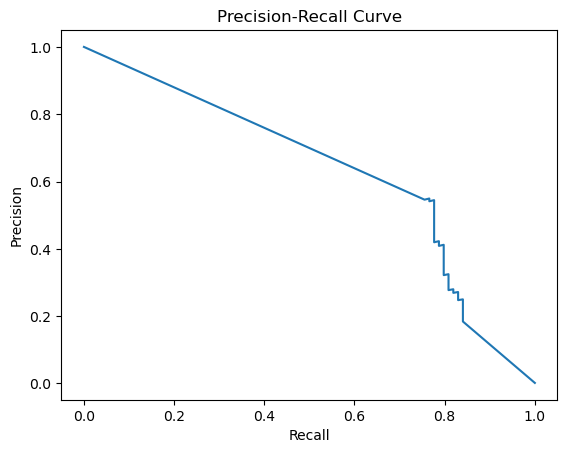

Stored 'knn_eval_bal' (tuple)


In [24]:
knn_eval_bal = grid_serach(knn_params, knn_clf, n_iter=10)
%store knn_eval_bal

In [25]:
knn_clf_eval, knn_clf_predict, knn_clf_proba, knn_clf_params, knn_clf_pr, knn_clf_re, knn_clf_th = knn_eval_bal

In [67]:
knn_clf_eval_df = pd.DataFrame(data=knn_clf_eval.values(), index=knn_clf_eval.keys(), columns=['KNN'])
knn_clf_eval_df

KNN
fbeta              0.764114
bal_acc_score      0.902843
precision          0.322034
recall             0.808511
auc_score          0.631093
false_positive   160.000000
false_negative    18.000000
train_time      6471.183148
predict_time      74.701642
proba_time        74.969163

In [31]:
knn_clf_params

{'clf__leaf_size': 38,
 'clf__metric': 'l1',
 'clf__n_neighbors': 6,
 'clf__weights': 'distance',
 'smotenc__k_neighbors': 10,
 'smotenc__sampling_strategy': 'minority'}

In [32]:
threshold_which_optimizes_precision_at_recall(knn_clf_re, knn_clf_th, recall_min=0.85)

threshold: 0.0


0.0

In [33]:
print(classification_report(y_val, knn_clf_proba>threshold_which_optimizes_precision_at_recall(knn_clf_re, knn_clf_th, recall_min=0.9)))

threshold: 0.0
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56651
           1       0.18      0.84      0.30        94

    accuracy                           0.99     56745
   macro avg       0.59      0.92      0.65     56745
weighted avg       1.00      0.99      1.00     56745



# Logistic regression

In [34]:
lr_params = {
    'clf__penalty':['l2','l1'],
    'clf__C': uniform(0.1,10),
    'clf__l1_ratio': uniform(0.1,1),
    'smotenc__k_neighbors': randint(3,12),
    'smotenc__sampling_strategy': ['minority']
}

lr_clf = LogisticRegression(random_state=42, n_jobs=-1, solver='saga', verbose=1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\imblearn\pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\lin

max_iter reached after 32 seconds


C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   31.8s finished


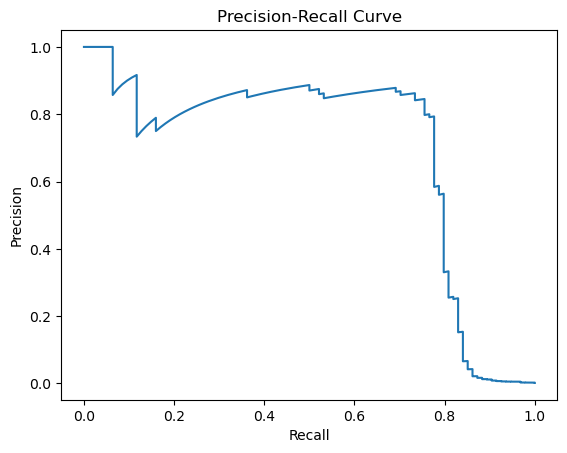

Stored 'lr_eval_bal' (tuple)


In [35]:
lr_eval_bal = grid_serach(lr_params, lr_clf, n_iter=10)
%store lr_eval_bal

In [36]:
lr_clf_eval, lr_clf_predict, lr_clf_proba, lr_clf_params, lr_clf_pr, lr_clf_re, lr_clf_th = lr_eval_bal

In [68]:
lr_clf_eval_df = pd.DataFrame(data=lr_clf_eval.values(), index=lr_clf_eval.keys(), columns=['Logistic Regression'])
lr_clf_eval_df

Logistic Regression
fbeta                      0.774424
bal_acc_score              0.898115
precision                  0.446429
recall                     0.797872
auc_score                  0.692947
false_positive            93.000000
false_negative            19.000000
train_time               797.833751
predict_time               0.013004
proba_time                 0.011002

In [38]:
lr_clf_params

{'clf__C': 6.400295578564125,
 'clf__l1_ratio': 0.5451795862194609,
 'clf__penalty': 'l2',
 'smotenc__k_neighbors': 10,
 'smotenc__sampling_strategy': 'minority'}

In [39]:
threshold_which_optimizes_precision_at_recall(lr_clf_re, lr_clf_th, recall_min=0.85)

threshold: 0.12313885632221477


0.12313885632221477

In [40]:
print(classification_report(y_val, lr_clf_proba>threshold_which_optimizes_precision_at_recall(lr_clf_re, lr_clf_th, recall_min=0.9)))

threshold: 0.03358506277472426
              precision    recall  f1-score   support

           0       1.00      0.88      0.93     56651
           1       0.01      0.89      0.02        94

    accuracy                           0.88     56745
   macro avg       0.51      0.88      0.48     56745
weighted avg       1.00      0.88      0.93     56745



# XGB

In [41]:
xgb_params = {
    'clf__booster': ['gbtree', 'gblinear', 'dart'],
    'clf__grow_policy': ['depthwise', 'lossguide'],
    'clf__learning_rate': uniform(0.01, 0.3),
    'clf__max_depth': randint(3,10),
    'clf__max_leaves': randint(0,50),
    'clf__n_estimators': randint(50,200),
    'clf__n_jobs': [4],
    'clf__random_state': [42],
    'clf__reg_alpha': uniform(0,1),
    'clf__reg_lambda': uniform(0,1),
    'clf__verbosity': [1],
    'smotenc__k_neighbors': randint(3,12),
    'smotenc__sampling_strategy': ['minority']
}

In [42]:
base_score = y_train.sum()/len(y_train)

In [43]:
xgb_clf = xgb.XGBClassifier(base_score=base_score)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[19:29:55] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "grow_policy", "max_depth", "max_leaves" } are not used.



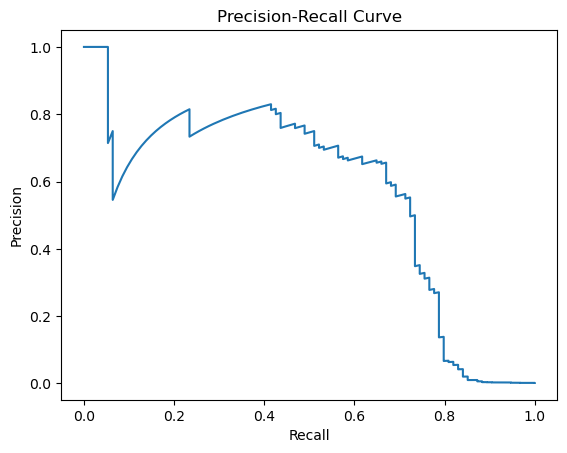

Stored 'xgb_eval_bal' (tuple)


In [44]:
xgb_eval_bal = grid_serach(xgb_params, xgb_clf, n_iter=25)
%store xgb_eval_bal

In [45]:
xgb_clf_eval, xgb_clf_predict, xgb_clf_proba, xgb_clf_params, xgb_clf_pr, xgb_clf_re, xgb_clf_th = xgb_eval_bal

In [69]:
xgb_clf_eval_df = pd.DataFrame(data=xgb_clf_eval.values(), index=xgb_clf_eval.keys(), columns=['XGB'])
xgb_clf_eval_df

XGB
fbeta               0.712329
bal_acc_score       0.871149
precision           0.341463
recall              0.744681
auc_score           0.564444
false_positive    135.000000
false_negative     24.000000
train_time      36006.675770
predict_time        0.061014
proba_time          0.059013

In [47]:
xgb_clf_params

{'clf__booster': 'gblinear',
 'clf__grow_policy': 'depthwise',
 'clf__learning_rate': 0.1566801428853994,
 'clf__max_depth': 9,
 'clf__max_leaves': 6,
 'clf__n_estimators': 152,
 'clf__n_jobs': 4,
 'clf__random_state': 42,
 'clf__reg_alpha': 0.436351177705377,
 'clf__reg_lambda': 0.7274244837945087,
 'clf__verbosity': 1,
 'smotenc__k_neighbors': 7,
 'smotenc__sampling_strategy': 'minority'}

In [48]:
threshold_which_optimizes_precision_at_recall(xgb_clf_re, xgb_clf_th, recall_min=0.1)

threshold: 0.9127393


0.9127393

In [49]:
print(classification_report(y_val, xgb_clf_proba>threshold_which_optimizes_precision_at_recall(xgb_clf_re, xgb_clf_th, recall_min=0.9)))

threshold: 0.2788435
              precision    recall  f1-score   support

           0       1.00      0.59      0.74     56651
           1       0.00      0.89      0.01        94

    accuracy                           0.59     56745
   macro avg       0.50      0.74      0.38     56745
weighted avg       1.00      0.59      0.74     56745



# XGBRF

In [50]:
xgbrf_params = {
    'clf__learning_rate': uniform(0.01, 0.3),
    'clf__reg_lambda': uniform(0,1),
    'clf__booster': ['gbtree', 'gblinear', 'dart'],
    'clf__eval_metric': [ftwo_scorer],
    'clf__grow_policy': ['depthwise', 'lossguide'],
    'clf__max_depth': randint(3,5,10),
    'clf__max_leaves': randint(0,50),
    'clf__n_estimators': randint(50,200),
    'clf__n_jobs': [4],
    'clf__random_state': [42],
    'clf__reg_alpha': uniform(0,1),
    'clf__verbosity': [1],
    'smotenc__k_neighbors': randint(3,12),
    'smotenc__sampling_strategy': ['minority']
}

In [51]:
base_score = y_train.sum()/len(y_train)

In [52]:
xgbrf_clf = xgb.XGBRFClassifier(base_score=base_score)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


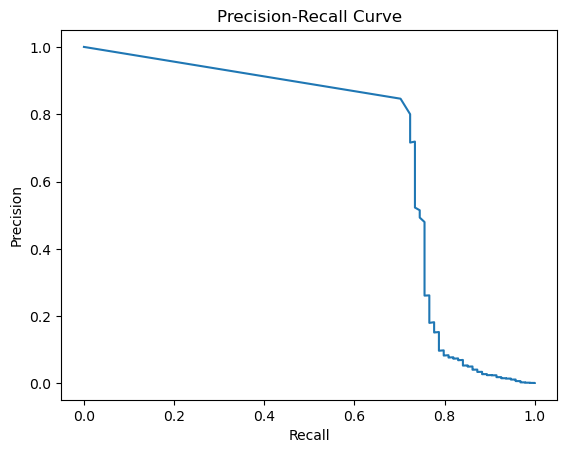

Stored 'xgbrf_eval' (tuple)


In [53]:
xgbrf_eval = grid_serach(xgbrf_params, xgbrf_clf, n_iter=25)
%store xgbrf_eval

In [54]:
xgbrf_clf_eval, xgbrf_clf_pred, xgbrf_clf_proba, xgbrf_clf_params, xgbrf_clf_pr, xgbrf_clf_re, xgbrf_clf_th = xgbrf_eval

In [70]:
xgbrf_clf_eval_df = pd.DataFrame(data=xgbrf_clf_eval.values(), index=xgbrf_clf_eval.keys(), columns=['XGBRF'])
xgbrf_clf_eval_df

XGBRF
fbeta              0.534292
bal_acc_score      0.912620
precision          0.051847
recall             0.851064
auc_score          0.698080
false_positive  1463.000000
false_negative    14.000000
train_time      2829.560365
predict_time       0.152035
proba_time         0.149035

In [56]:
xgbrf_clf_params

{'clf__booster': 'gbtree',
 'clf__eval_metric': make_scorer(fbeta_score, beta=5),
 'clf__grow_policy': 'lossguide',
 'clf__learning_rate': 0.0331490191902074,
 'clf__max_depth': 13,
 'clf__max_leaves': 3,
 'clf__n_estimators': 147,
 'clf__n_jobs': 4,
 'clf__random_state': 42,
 'clf__reg_alpha': 0.9700720455986775,
 'clf__reg_lambda': 0.5945228435042452,
 'clf__verbosity': 1,
 'smotenc__k_neighbors': 3,
 'smotenc__sampling_strategy': 'minority'}

In [57]:
threshold_which_optimizes_precision_at_recall(xgbrf_clf_re, xgbrf_clf_th, recall_min=0.1)

threshold: 0.9999982


0.9999982

In [58]:
print(classification_report(y_val, xgbrf_clf_proba>threshold_which_optimizes_precision_at_recall(xgbrf_clf_re, xgbrf_clf_th, recall_min=0.9)))

threshold: 0.030198956
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56651
           1       0.02      0.89      0.05        94

    accuracy                           0.94     56745
   macro avg       0.51      0.92      0.51     56745
weighted avg       1.00      0.94      0.97     56745



# ADA

In [59]:
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier

estimators = [
    xgb.XGBClassifier(random_state=42, n_jobs=4, verbosity=1),
    GradientBoostingClassifier(random_state=42, verbose=True),
    RandomForestClassifier(random_state=42, n_jobs=4, verbose=True),
    ExtraTreesClassifier(random_state=42, n_jobs=4, verbose=True)
]

ada_params = {
    'clf__algorithm': ['SAMME', 'SAMME.R'],
#     'clf__estimator': estimators,    
    'clf__learning_rate': uniform(0,5),
    'clf__n_estimators': randint(50,200),
    'smotenc__k_neighbors': randint(3,12),
    'smotenc__sampling_strategy': ['minority']
}

In [60]:
ada_clf = AdaBoostClassifier(random_state=42)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


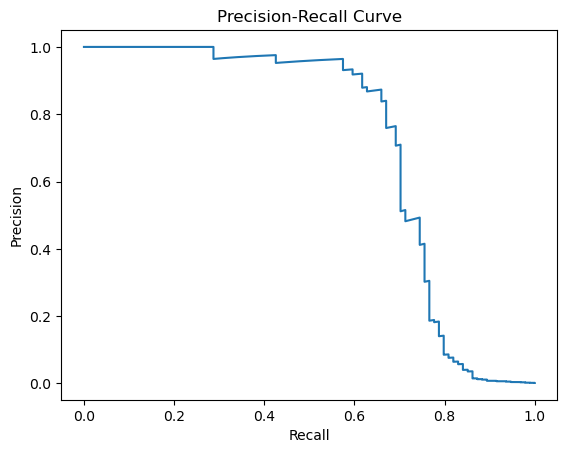

Stored 'ada_eval' (tuple)


In [61]:
ada_eval = grid_serach(ada_params, ada_clf, n_iter=10)
%store ada_eval

In [62]:
ada_clf_eval, ada_clf_pred, ada_clf_proba, ada_clf_params, ada_clf_pr, ada_clf_re, ada_clf_th = ada_eval

In [71]:
ada_clf_eval_df = pd.DataFrame(data=ada_clf_eval.values(), index=ada_clf_eval.keys(), columns=['ADA'])
ada_clf_eval_df

ADA
fbeta              0.729068
bal_acc_score      0.876680
precision          0.390110
recall             0.755319
auc_score          0.712393
false_positive   111.000000
false_negative    23.000000
train_time      3029.172641
predict_time       1.028234
proba_time         1.032235

In [64]:
ada_clf_params

{'clf__algorithm': 'SAMME.R',
 'clf__learning_rate': 1.3892947932481943,
 'clf__n_estimators': 110,
 'smotenc__k_neighbors': 5,
 'smotenc__sampling_strategy': 'minority'}

In [65]:
print(classification_report(y_val, ada_clf_proba>threshold_which_optimizes_precision_at_recall(ada_clf_re, ada_clf_th, recall_min=0.9)))

threshold: 0.48098231550196374
              precision    recall  f1-score   support

           0       1.00      0.81      0.90     56651
           1       0.01      0.89      0.02        94

    accuracy                           0.82     56745
   macro avg       0.50      0.85      0.46     56745
weighted avg       1.00      0.82      0.90     56745



# MLP

In [16]:
mlp_params = {
    'clf__activation': ['relu', 'logistic'],
    'clf__alpha': uniform(0.0001,0.99),
    'clf__epsilon': uniform(0.00000001,0.001),
    'clf__learning_rate': ['constant', 'adaptive'],
    'clf__max_iter': randint(100,250),
    'clf__momentum': uniform(0,1),
    'clf__solver': ['adam', 'sgd'],
    'clf__warm_start': [True, False],
    'smotenc__k_neighbors': randint(3,12),
    'smotenc__sampling_strategy': ['minority']
}

In [17]:
mlp_clf = MLPClassifier(random_state=42, verbose=True)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Iteration 1, loss = 0.13963555
Iteration 2, loss = 0.08452013
Iteration 3, loss = 0.06495699
Iteration 4, loss = 0.05567802
Iteration 5, loss = 0.05137899
Iteration 6, loss = 0.04960111
Iteration 7, loss = 0.04878931
Iteration 8, loss = 0.04831575
Iteration 9, loss = 0.04804861
Iteration 10, loss = 0.04782919
Iteration 11, loss = 0.04761120
Iteration 12, loss = 0.04745625
Iteration 13, loss = 0.04739059
Iteration 14, loss = 0.04725244
Iteration 15, loss = 0.04718183
Iteration 16, loss = 0.04704794
Iteration 17, loss = 0.04699201
Iteration 18, loss = 0.04696282
Iteration 19, loss = 0.04686052
Iteration 20, loss = 0.04681551
Iteration 21, loss = 0.04679983
Iteration 22, loss = 0.04673789
Iteration 23, loss = 0.04667706
Iteration 24, loss = 0.04662041
Iteration 25, loss = 0.04659686
Iteration 26, loss = 0.04656930
Iteration 27, loss = 0.04653099
Iteration 28, loss = 0.04652790
Iteration 29, loss = 0.04644561
Iteration 30, loss 

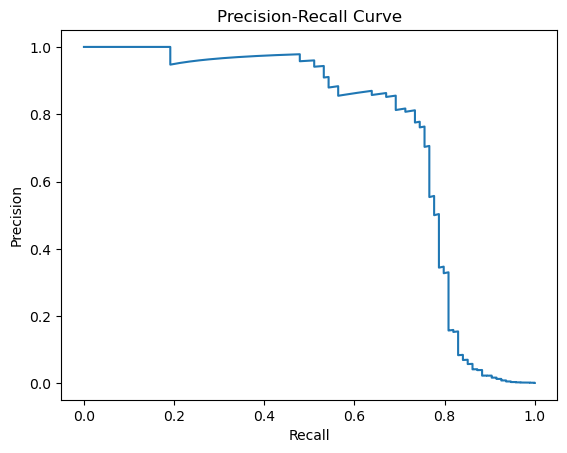

Stored 'mlp_eval' (tuple)


In [18]:
mlp_eval = grid_serach(mlp_params, mlp_clf, n_iter=25)
%store mlp_eval

In [19]:
mlp_clf_eval, mlp_clf_pred, mlp_clf_proba, mlp_clf_params, mlp_clf_pr, mlp_clf_re, mlp_clf_th = mlp_eval

In [72]:
mlp_clf_eval_df = pd.DataFrame(data=mlp_clf_eval.values(), index=mlp_clf_eval.keys(), columns=['MLP'])
mlp_clf_eval_df

MLP
fbeta              0.763795
bal_acc_score      0.892779
precision          0.437870
recall             0.787234
auc_score          0.742676
false_positive    95.000000
false_negative    20.000000
train_time      4459.932710
predict_time       0.078017
proba_time         0.063015

In [167]:
mlp_clf_params

{'clf__activation': 'logistic',
 'clf__alpha': 0.05980785763365053,
 'clf__epsilon': 0.0006730293463164493,
 'clf__learning_rate': 'adaptive',
 'clf__max_iter': 192,
 'clf__momentum': 0.9146412269428925,
 'clf__solver': 'adam',
 'clf__warm_start': False,
 'smotenc__k_neighbors': 6,
 'smotenc__sampling_strategy': 'minority'}

In [22]:
print(classification_report(y_val, mlp_clf_proba>threshold_which_optimizes_precision_at_recall(mlp_clf_re, mlp_clf_th, recall_min=0.9)))

threshold: 0.0432208180362378
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     56651
           1       0.02      0.89      0.05        94

    accuracy                           0.94     56745
   macro avg       0.51      0.92      0.51     56745
weighted avg       1.00      0.94      0.97     56745



# Results for baseline, class_weight, smotenc, ros and gridsearch

In [73]:
balanced_dataset_results = pd.concat([knn_clf_eval_df, lr_clf_eval_df, xgb_clf_eval_df, xgbrf_clf_eval_df, \
                                      ada_clf_eval_df, mlp_clf_eval_df], axis=1)

In [79]:
balanced_dataset_results.sort_values('fbeta', axis=1, ascending=False)

Logistic Regression          KNN          MLP          ADA  \
fbeta                      0.774424     0.764114     0.763795     0.729068   
bal_acc_score              0.898115     0.902843     0.892779     0.876680   
precision                  0.446429     0.322034     0.437870     0.390110   
recall                     0.797872     0.808511     0.787234     0.755319   
auc_score                  0.692947     0.631093     0.742676     0.712393   
false_positive            93.000000   160.000000    95.000000   111.000000   
false_negative            19.000000    18.000000    20.000000    23.000000   
train_time               797.833751  6471.183148  4459.932710  3029.172641   
predict_time               0.013004    74.701642     0.078017     1.028234   
proba_time                 0.011002    74.969163     0.063015     1.032235   

                         XGB        XGBRF  
fbeta               0.712329     0.534292  
bal_acc_score       0.871149     0.912620  
precision           0.341463     0.051847  
recall              0.744681     0.851064  
auc_score           0.564444     0.698080  
false_positive    135.000000  1463.000000  
false_negative     24.000000    14.000000  
train_time      36006.675770  2829.560365  
predict_time        0.061014     0.152035  
proba_time          0.059013     0.149035

In [157]:
balanced_dataset_results.sort_values('fbeta', axis=1, ascending=False).to_excel('balanced_dataset_results.xlsx', index=True, sheet_name='SMOTECNC_dataset')

In [158]:
with pd.ExcelWriter('balanced_dataset_results.xlsx') as writer:
    # write each dataframe to a different sheet in the file
    results_df.to_excel(writer, index=True, sheet_name='Baseline' )
    concatenated_df.to_excel(writer, index=True, sheet_name='Class_weight')
    balanced_dataset_results.sort_values('fbeta', axis=1, ascending=False).to_excel(writer, index=True, sheet_name='SMOTECNC_dataset')

# ↑↑↑ RUN THIS ↑↑↑

# ↓↓↓ TRY THIS ↓↓↓

- Doublecheck code for train/val errors
- GridSearch on a logistic regression on X_train_amt_rob_log → use this trained model and fit is (again) but now on balanced X_train (smotenc) → use this model for prediction
- With all the trained models (we need the precision/recall/threshold) plot the Prec/rec plot. Mark the 0.9 recall, and visually plot the intersections
- With all the models (we need the precision/recall/threshold) check what precision we get at 0.9 recall
- Try voting soft

In [143]:
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X2_train, y2_train)

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\marke\anaconda3\envs\DataScienceProject\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [144]:
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)

LogisticRegression(C=100)

In [145]:
y_pred_log_reg = log_reg_sm.predict(X2_test)

In [146]:
log_reg_cf = confusion_matrix(y2_test, y_pred_log_reg)

<AxesSubplot: >

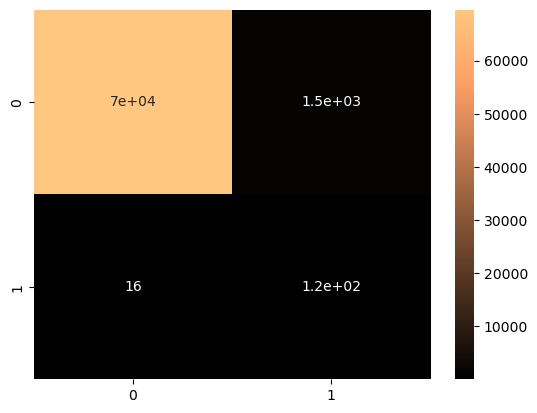

In [147]:
sns.heatmap(log_reg_cf, annot=True, cmap=plt.cm.copper)

In [158]:
dup_cols = raw_data.columns
dup_cols =dup_cols.drop('Time')

In [170]:
dups = raw_data[raw_data.duplicated(keep='first')]

In [171]:
dups

Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        V9  ...       V21       V22       V23  \
33      0.711206  0.176066 -0.286717  ...  0.046949  0.208105 -0.185548   
35      0.693039  0.179742 -0.285642  ...  0.049526  0.206537 -0.187108   
113    -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
114    -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
115    -0.036715  0.350995  0.118950  ...  0.102520  0.605089  0.023092   
...          ...       ...       ...  ...       ...       ...       ...   
282987 -0.881302  1.081750  1.022928  ... -0.524067 -1.337510  0.473943   
283483 -0.303778  0.884953  0.054065  ...  0.287217  0.947825 -0.218773   
283485 -0.282535  0.880654  0.052808  ...  0.284205  0.949659 -0.216949   
284191 -0.667233  2.309700 -1.639306  ...  0.391483  0.266536 -0.079853   
284193 -0.745886  2.325616 -1.634651  ...  0.402639  0.259746 -0.086606   

             V24       V25       V26       V27       V28  Amount  Class  
33      0.001031  0.098816 -0.552904 -0.073288  0.023307    6.14      0  
35      0.000753  0.098117 -0.553471 -0.078306  0.025427    1.77      0  
113    -0.626463  0.479120 -0.166937  0.081247  0.001192    1.18      0  
114    -0.626463  0.479120 -0.166937  0.081247  0.001192    1.18      0  
115    -0.626463  0.479120 -0.166937  0.081247  0.001192    1.18      0  
...          ...       ...       ...       ...       ...     ...    ...  
282987  0.616683 -0.283548 -1.084843  0.073133 -0.036020   11.99      0  
283483  0.082926  0.044127  0.639270  0.213565  0.119251    6.82      0  
283485  0.083250  0.044944  0.639933  0.219432  0.116772   11.93      0  
284191 -0.096395  0.086719 -0.451128 -1.183743 -0.222200   55.66      0  
284193 -0.097597  0.083693 -0.453584 -1.205466 -0.213020   36.74      0  

[1081 rows x 31 columns]

### Class weighting 0:10 - 1:1

In [ ]:
y_pr_cw = rf_clf2.predict(X_val_hour_amt_robust_log)

In [ ]:
print(metrics.classification_report(y_val, y_pr_cw, digits=4))

In [ ]:
print(confusion_matrix(y_val, y_pr_cw))

In [ ]:
fbeta_score(y_val, y_pr_cw, average='binary', beta=10, pos_label=1)

### No Class weight

In [ ]:
y_pr = rf_clf2.predict(X_val_hour_amt_robust_log)

In [ ]:
print(metrics.classification_report(y_val, y_pr, digits=4))

In [ ]:
print(confusion_matrix(y_val, y_pr))

In [ ]:
fbeta_score(y_val, y_pr, average='binary', beta=10, pos_label=1)

#  makro  avg f1 score
Checking how the models behave with the $macro avg f1 score$

In [ ]:
def model_tester_macrof1(clf, clf_name):
    print(f'============ {clf_name} ============')
    
       
    start_time = time.time()
    clf.fit(X_train, y_train)
    train_time = time.time() - start_time
    
    try:
        feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': clf.feature_importances_})
        print(feature_importances.sort_values('importance', ascending=False, inplace=True))
    except Exception as e: 
        print(e)
        print(f'The {clf_name} model does not have a feature importance parameter')
        
    try:
        coefs = pd.DataFrame({'feature': X_train.columns, 'coef': clf.coef_})
        print(coefs.sort_values('coef', ascending=False, inplace=True))
    except Exception as e: 
        print(e)
        print(f'The {clf_name} model does not have a coef parameter')
    
    start_time = time.time()
    y_pred = clf.predict(X_val)
    test_time = time.time() - start_time
    
    print(metrics.classification_report(y_val, y_pred, digits=4), end='\n\n===============================================\n')
    bal_acc_score = balanced_accuracy_score(y_val, y_pred)
#     print(bal_acc_score, end='\n\n===============================================\n')
    precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    macro_f1 = f1_score(y_val, y_pred, average='macro')
    y_prob = clf.predict_proba(X_val)[:,1]
    fpr, tpr, thresholds = roc_curve(y_val, y_prob)
    plot_roc_curve(fpr,tpr)
    plt.show()
    rocauc_score = roc_auc_score(y_val, y_prob)
    print(f'ROC AUC score: {rocauc_score}', end='\n\n===============================================\n')
    conf_mtr = confusion_matrix(y_val, y_pred)
    print(conf_mtr, end='\n\n===============================================\n')
    return [bal_acc_score,precisions, recalls, f1, macro_f1, conf_mtr[0,1], conf_mtr[1,0], train_time, test_time]

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
scaler = MinMaxScaler()

raw_train_log['Amount_log'] = np.log1p(raw_train['Amount'])
clean_train = DataCleaner(hour=True,feature_to_drop=['Amount'], labels=True, imputer=imputer, scaler=scaler)

In [ ]:
X_train, y_train = clean_train.fit_transform(raw_train)
raw_val['Amount_log'] = np.log1p(raw_val['Amount'])
X_val, y_val = clean_train.transform(raw_val)

In [ ]:
model_names = ['rf_clf', 'brf_clf', 'lr_clf', 'svc_rbf_clf', 'svc_ploy_clf', 'knn_clf', 'gnb_clf', 'ada_clf',\
               'qda_clf', 'mlp_clf', 'xgb_clf', 'xgbrf_clf']
models = [rf_clf, brf_clf, lr_clf, svc_rbf_clf, svc_ploy_clf, knn_clf, gnb_clf, ada_clf, qda_clf, mlp_clf, xgb_clf, xgbrf_clf]

In [ ]:
eval_macro_dict = dict()

for i, m in enumerate(models):
    eval_macro_dict[model_names[i]] = model_tester_macrof1(m, model_names[i])

In [ ]:
eval_macro_df = pd.DataFrame(data=eval_macro_dict.values(), index=eval_macro_dict.keys(),\
                       columns=['bal_acc_score','precisions', 'recalls', 'f1', 'macro_f1' 'false_positives', 'false_negatives', 'train_time', 'test_time'])

In [ ]:
eval_macro_df

### For $Grid_search$:

from sklearn.metrics import make_scorer, f1_score
macro_f1_scorer = make_scorer(f1_score, average='macro')

param_grid = {'max_depth': [1, 5, 10]}
clf = DecisionTreeClassifier()

grid_search = GridSearchCV(clf, param_grid, scoring=macro_f1_scorer)
grid_search.fit(X_train, y_train)


https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html

In [ ]:
eval_macro_dict.values()

# Feature selection
- Random Forest feature importance
- Logistic Regression with Lasso loss function
- Mutual information
- Forward selection
- Backward selection
- Best subset selection

### Mutual information

Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.

In [ ]:
from sklearn.feature_selection import mutual_info_regression

In [ ]:
# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.columns:
        mi_scores = mutual_info_regression(X, y, discrete_features='auto', random_state=0)
        mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
        mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [ ]:
mi_scores = make_mi_scores(X=X_train, y=y_train)

In [ ]:
plot_mi_scores(mi_scores)

### Forward / Backward selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb 

##### Forward

In [ ]:
feat_select_model = RandomForestClassifier()
sfs_fwd = SequentialFeatureSelector(feat_select_model, n_features_to_select='auto', direction='forward',\
                                     scoring='f1', cv=3, n_jobs=-1) # ‘recall’, ‘roc_auc’
sfs_fwd.fit(X_train, y_train)

In [ ]:
sfs_fwd.n_features_to_select_

In [ ]:
feature_mask_fwd = sfs_fwd.support_

result_list_fwd = [X_train.columns[i] for i in range(len(X_train.columns)) if feature_mask_fwd[i]]
print(result_list_fwd)

tol=0.02 → ['V10', 'V12', 'V14', 'Amount']

##### Backward

In [ ]:
sfs_bwd = SequentialFeatureSelector(feat_select_model, n_features_to_select='auto', direction='backward',\
                                     scoring='f1', cv=3, n_jobs=-1) # ‘recall’, ‘roc_auc’
sfs_bwd.fit(X_train, y_train)

In [ ]:
sfs_bwd.n_features_to_select_

In [ ]:
feature_mask_bwd = sfs_bwd.support_

result_list_bwd = [X_train.columns[i] for i in range(len(X_train.columns)) if feature_mask_bwd[i]]
print(result_list_bwd)

### Best subset selection

In [ ]:
from itertools import combinations
from sklearn.model_selection import cross_val_score

def best_subset(estimator, X, y, max_size=8, cv=5):
    '''Calculates the best model of up to max_size features of X.
   estimator must have a fit and score functions.
   X must be a DataFrame.'''

    n_features = X.shape[1]
    subsets = (combinations(range(n_features), k + 1) 
               for k in range(min(n_features, max_size)))

    best_size_subset = []
    for subsets_k in subsets:  # for each list of subsets of the same size
        best_score = -np.inf
        best_subset = None
        for subset in subsets_k: # for each subset
            estimator.fit(X.iloc[:, list(subset)], y)
            # get the subset with the best score among subsets of the same size
            score = estimator.score(X.iloc[:, list(subset)], y)
            if score > best_score:
                best_score, best_subset = score, subset
        # to compare subsets of different sizes we must use CV
        # first store the best subset of each size
        best_size_subset.append(best_subset)

    # compare best subsets of each size
    best_score = -np.inf
    best_subset = None
    list_scores = []
    for subset in best_size_subset:
        score = cross_val_score(estimator, X.iloc[:, list(subset)], y, cv=cv).mean()
        list_scores.append(score)
        if score > best_score:
            best_score, best_subset = score, subset

    return best_subset, best_score, best_size_subset, list_scores

In [ ]:
b_subset, b_score, b_size, b_list_scores = best_subset(feat_select_model, raw_train[:10], y_train[:10], max_size=20, cv=3)

In [ ]:
print(f'Best subset: {b_subset}', end='\n\n')
print(f'Best subset: {b_score}', end='\n\n')
print(f'Best subset: {b_size}', end='\n\n')
print(f'Best subset: {b_list_scores}', end='\n\n')

# Models

In [ ]:
from IPython.display import display
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import balanced_accuracy_score

from sklearn.ensemble import RandomForestClassifier #proba #featimp
from imblearn.ensemble import BalancedRandomForestClassifier #proba #featimp
from sklearn.linear_model import LogisticRegression #proba #coef
from sklearn.svm import SVC #kernel #proba #coef 
from sklearn.neighbors import KNeighborsClassifier #proba
from sklearn.naive_bayes import GaussianNB #proba
from sklearn.ensemble import AdaBoostClassifier #proba #featimp
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #proba
from sklearn.neural_network import MLPClassifier #coef #proba
import xgboost as xgb #featimp #coef #proba

In [ ]:
rf_clf = RandomForestClassifier() #proba #featimp
brf_clf = BalancedRandomForestClassifier() #proba #featimp
lr_clf = LogisticRegression() #proba #coef
svc_rbf_clf = SVC(kernel='rbf', probability=True) #kernel #proba #coef 
svc_ploy_clf = SVC(kernel='poly', probability=True)
knn_clf = KNeighborsClassifier() #proba
gnb_clf = GaussianNB() #proba
ada_clf = AdaBoostClassifier() #proba #featimp
qda_clf = QuadraticDiscriminantAnalysis() #proba
mlp_clf = MLPClassifier() #coef #proba
xgb_clf = xgb.XGBClassifier() #featimp #coef #proba
xgbrf_clf = xgb.XGBRFClassifier() #featimp #coef #proba

In [ ]:
def model_tester(clf, clf_name):
    print(f'============ {clf_name} ============')
    clf.fit(X_train, y_train)
    try:
        feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': clf.feature_importances_})
        print(feature_importances.sort_values('importance', ascending=False, inplace=True))
    except Exception as e: 
        print(e)
        print(f'The {clf_name} model does not have a feature importance parameter')
        
    try:
        coefs = pd.DataFrame({'feature': X_train.columns, 'coef': clf.coef_})
        print(coefs.sort_values('coef', ascending=False, inplace=True))
    except Exception as e: 
        print(e)
        print(f'The {clf_name} model does not have a coef parameter')
        
    y_pred = clf.predict(X_val)
    
    print(metrics.classification_report(y_val, y_pred, digits=4), end='\n\n===============================================\n')
    bal_acc_score = balanced_accuracy_score(y_val, y_pred)
#     print(bal_acc_score, end='\n\n===============================================\n')
    precisions, recalls, thresholds = precision_recall_curve(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    y_prob = clf.predict_proba(X_val)[:,1]
    fpr, tpr, thresholds = roc_curve(y_val, y_prob)
    plot_roc_curve(fpr,tpr)
    plt.show()
    rocauc_score = roc_auc_score(y_val, y_prob)
    print(f'ROC AUC score: {rocauc_score}', end='\n\n===============================================\n')
    conf_mtr = confusion_matrix(y_val, y_pred)
    print(conf_mtr, end='\n\n===============================================\n')
    return [bal_acc_score,precisions, recalls, f1, conf_mtr[0,1], conf_mtr[1,0]]

In [ ]:
model_names = ['rf_clf', 'brf_clf', 'lr_clf', 'svc_rbf_clf', 'svc_ploy_clf', 'knn_clf', 'gnb_clf', 'ada_clf',\
               'qda_clf', 'mlp_clf', 'xgb_clf', 'xgbrf_clf']
models = [rf_clf, brf_clf, lr_clf, svc_rbf_clf, svc_ploy_clf, knn_clf, gnb_clf, ada_clf, qda_clf, mlp_clf, xgb_clf, xgbrf_clf]

In [ ]:
eval_dict = dict()

for i, m in enumerate(models):
    eval_dict[model_names[i]] = model_tester(m, model_names[i])

In [ ]:
eval_df = pd.DataFrame(data=eval_dict.values(), index=eval_dict.keys(),\
                       columns=['bal_acc_score','precisions', 'recalls', 'f1', 'false_positives', 'false_negatives'])

In [ ]:
eval_df

# ------------------POC----------------------------------------- 


In [ ]:
# Splitint training data for POC purposes (only about 2 mln instances)

raw_train.shape

In [ ]:
raw_train.head()

In [ ]:
drop_list = ['Class', 'hour']

X_train_poc = raw_train.drop(drop_list, axis=1)
X_train_poc

In [ ]:
print("X_train_poc set dimensions: ", X_train_poc.shape)
print("y_train set dimensions: ", y_train.shape)

# ------------------------ Training ---------------------

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train_poc, y_train)

In [ ]:
# to show floats with 3 decimal places
pd.options.display.float_format = '{:.3f}'.format

feature_importances = pd.DataFrame({'feature': X_train_poc.columns, 'importance': clf.feature_importances_})
feature_importances.sort_values('importance', ascending=False, inplace=True)
print(feature_importances)

# ---------Testing and performance analysis---------

### Data preparation

In [ ]:
raw_test.head()

In [ ]:
raw_test.shape

In [ ]:
X_test_poc = raw_test.drop(columns = ['Class'], axis=1) #droppig the same columns as in case of training set
y_test_poc = raw_test['Class'] #getting labels

print(X_test_poc.columns)

### Predictions

In [ ]:
y_pred =clf.predict(X_test_poc)


### Performance analysis

In [ ]:
print(metrics.classification_report(y_test_poc, y_pred, digits=4))

In [ ]:
balanced_accuracy_score(y_test_poc, y_pred)

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test_poc, y_pred)

### ROC curve

**<code style="background:yellow;color:blue"> FROM THE BOOK </code>**

The roc_curve() function expects labels and scores, but instead of scores you can
give it class probabilities. Let’s use the positive class’s probability as the score:

y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class 

In [ ]:
y_prob = clf.predict_proba(X_test_poc)[:,1]

In [ ]:
from sklearn.metrics import roc_curve

# fpr, tpr, thresholds = roc_curve(y_test_poc, y_prob)

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)

In [ ]:
plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_poc, y_prob)

In [ ]:
#metrics.ConfusionMatrixDisplay.from_predictions(y_test_poc, y_pred)
#plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test_poc, y_pred)

### **<code style="background:lightgreen;color:black"> Observations:</code>** 
  Not bad but still can be better. Especially if it goes to recall on Frauds. 

# -------------------- With hour instead of Time -------------------

In [ ]:
drop_list1 = ['Class', 'Time']
X_train_poc1 = train_t.drop(drop_list1, axis=1)
X_train_poc1.head()

In [ ]:
# one-hot-encoded dataset
X_train_poc1 = pd.get_dummies(X_train_poc1, columns = ['hour'], prefix='hour')
X_train_poc1.head(10)

In [ ]:
clf_s1 = RandomForestClassifier()
clf_s1.fit(X_train_poc1, y_train)

In [ ]:
# to show floats with 3 decimal places
pd.options.display.float_format = '{:.3f}'.format

feature_importances = pd.DataFrame({'feature': X_train_poc1.columns, 'importance': clf_s1.feature_importances_})
feature_importances.sort_values('importance', ascending=False, inplace=True)
print(feature_importances)

In [ ]:
## Test dataset prepareation
raw_test['hour'] = ((((raw_test['Time']) // (60 * 60)) % 24) + 1) # I calculate floor to get hours. As a result I get values from 0 to 47. Next I calulate modulo 24 -> I got values from 0 to 23. Last step adding 1 to get values from 1 to 24.
raw_test['hour'] = raw_test['hour'].astype(int)
print(raw_test['hour'].min(), raw_test['hour'].max())

X_test_poc1 = raw_test.drop(drop_list1, axis=1)
y_test = raw_test['Class']

In [ ]:
# one-hot-encoded dataset
X_test_poc1 = pd.get_dummies(X_test_poc1, columns = ['hour'], prefix='hour')
X_test_poc1.head(10)

In [ ]:
y_pred1 =clf_s1.predict(X_test_poc1)

In [ ]:
print(metrics.classification_report(y_test, y_pred1, digits=4))

In [ ]:
balanced_accuracy_score(y_test, y_pred1)

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred1)

# ---------------- ROC curve--------------------------

In [ ]:
y_prob1 = clf_s1.predict_proba(X_test_poc1)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob1)

plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
roc_auc_score(y_test, y_prob1)

In [ ]:
confusion_matrix(y_test, y_pred1)

### Observation:

- it is not better.

NEXT STEPS:
- check the result after removing the 'time' column
- deside which feature shouls stay. Maybe it would be good to run lasso and compare the feature importance from RF and lasso. Based on that maybe it will be possible to deside which features are more important. 


# --------------- Balanced Random Forest --------------

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_train_poc, y_train)

In [ ]:
y_pred = brf.predict(X_test_poc)
balanced_accuracy_score(y_test_poc, y_pred)

In [ ]:
print(metrics.classification_report(y_test_poc, y_pred, digits=4))

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test_poc, y_pred)

In [ ]:
y_prob = brf.predict_proba(X_test_poc)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_poc, y_prob)

plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
roc_auc_score(y_test_poc, y_prob)

In [ ]:
confusion_matrix(y_test_poc, y_pred)

# This model could be chosen in an ensemble because it is better at recall but very bad in precision

### -> just to check how the feature importance looks for this model

In [ ]:
# to show floats with 3 decimal places
pd.options.display.float_format = '{:.3f}'.format

feature_importances = pd.DataFrame({'feature': X_train_poc.columns, 'importance': brf.feature_importances_})
feature_importances.sort_values('importance', ascending=False, inplace=True)
print(feature_importances)

## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_clf = LogisticRegression(penalty='l1', solver='liblinear')
lr_clf.fit(X_train_poc1, y_train)

In [ ]:
y_pred_lr = lr_clf.predict(X_test_poc1)

In [ ]:
log_importance = dict(zip(list(X_test_poc1.columns), lr_clf.coef_.tolist()[0]))

In [ ]:
pd.DataFrame(index=log_importance.keys(), data=log_importance.values()).sort_values(0, ascending=False)

In [ ]:
print(metrics.classification_report(y_test_poc, y_pred_lr, digits=4))

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test_poc, y_pred_lr)

In [ ]:
y_prob_lr = lr_clf.predict_proba(X_test_poc)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_poc, y_prob_lr)

plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
roc_auc_score(y_test_poc, y_prob_lr)

In [ ]:
confusion_matrix(y_test_poc, y_pred_lr)

## XGBoost

In [ ]:
# pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xgb_clf = xgb.XGBClassifier()

In [ ]:
xgb_clf.fit(raw_train, y_train)

In [ ]:
xgb_feat_imp = dict(zip(raw_train.columns, xgb_clf.feature_importances_))
pd.DataFrame(data=xgb_feat_imp.values(), index=xgb_feat_imp.keys()).sort_values(0, ascending=False)

In [ ]:
y_pred_xgb = xgb_clf.predict(X_test_poc)

In [ ]:
print(metrics.classification_report(y_test_poc, y_pred_xgb, digits=4))

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test_poc, y_pred_xgb)

In [ ]:
y_prob_xgb = xgb_clf.predict_proba(X_test_poc)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_poc, y_prob_xgb)

plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
roc_auc_score(y_test_poc, y_prob_xgb)

In [ ]:
confusion_matrix(y_test_poc, y_pred_xgb)

In [ ]:
# Model function

def model_tester(model, X_train, X_val, y, scaled=False, hour=False):
    """The datasets Amount values are not scaled, and the Time column is based on seconds.
    With scaled=True, we will scale the Amount column.
    With hour=True, we will use the hours instead of seconds.
    """
    if scaled==False:
        if hour==True:
            train_t = X_train
            train_t['hour'] = ((((train_t['Time']) // (60 * 60)) % 24) + 1) # I calculate floor to get hours. As a result I get values from 0 to 47. Next I calulate modulo 24 -> I got values from 0 to 23. Last step adding 1 to get values from 1 to 24.
            train_t['hour'] = train_t['hour'].astype(int)
            
            
            
            
model.fit()

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn.fit(X_train_poc, y_train)

In [ ]:
y_pred_knn = knn.predict(X_test_poc)

In [ ]:
print(metrics.classification_report(y_test_poc, y_pred_knn, digits=4))

In [ ]:
precisions, recalls, thresholds = precision_recall_curve(y_test_poc, y_pred_knn)

In [ ]:
y_prob_knn = knn.predict_proba(X_test_poc)[:,1]
fpr, tpr, thresholds = roc_curve(y_test_poc, y_prob_knn)

plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
roc_auc_score(y_test_poc, y_prob_knn)

In [ ]:
confusion_matrix(y_test_poc, y_pred_knn)

## ------ PIPELINE with SAMPLER 

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
scaler = StandardScaler()

clean_train = DataCleaner(hour=True, feature_to_drop=[], labels=True, imputer=imputer, scaler=scaler)

In [ ]:
X_train, y = clean_train.fit_transform(raw_train)

In [ ]:
X_train.columns

In [ ]:
X_val, y_val = clean_train.transform(raw_val)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
#import xgboost as xgb 

#xgb_clf = xgb.XGBClassifier()
clf = LogisticRegression(max_iter = 5000, solver='saga')
sampler = RandomOverSampler(random_state=0)
model = make_pipeline(sampler, clf).fit(X_train, y)

In [ ]:
y_pred = model.predict(X_val)

In [ ]:
print(metrics.classification_report(y_val, y_pred, digits=4))

In [ ]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_val, y_pred)